In [1]:
from patchify import patchify

In [19]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import random

Text(0.5, 1.0, 'Band-1')

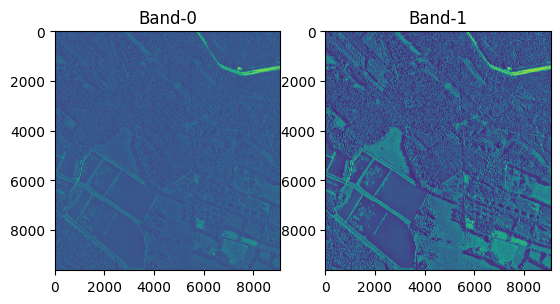

In [3]:
#reading and plotting different bands of the images
temp_img = cv2.imread('./images/M-33-20-D-c-4-2.tif')
f, arr = plt.subplots(1,2)
arr[0].imshow(temp_img[:,:,0])
arr[0].set_title('Band-0')
arr[1].imshow(temp_img[:,:,1])
arr[1].set_title('Band-1')

.....................................................................................

Reading the mask file and finding the number of labels and pixels per labels

Text(0.5, 1.0, 'Mask')

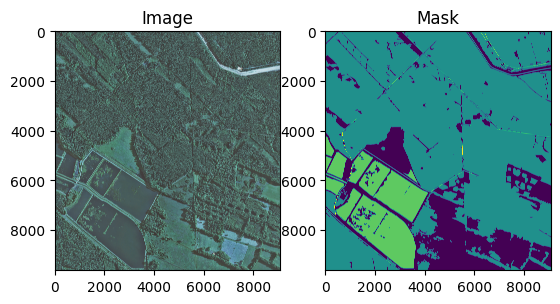

In [4]:
temp_mask = cv2.imread('./masks/M-33-20-D-c-4-2.tif')
#plotting the mask and image
f, arra = plt.subplots(1,2)
arra[0].imshow(temp_img)
arra[0].set_title('Image')
arra[1].imshow(temp_mask[:,:,0])
arra[1].set_title('Mask')

In [5]:
#counting the pixels having the respective labels
label, count = np.unique(temp_mask[:,:,0], return_counts=True)
print("The labels are ",label, "and the pixel are ",count)

The labels are  [0 1 2 3 4] and the pixel are  [18008335    46512 59476087  9553859   554627]


In [6]:
root_dir = '../LandUseLandCover/'
patch_size = 256

In [7]:
img_dir = root_dir + "./images/"

### Patchifying the images

In [9]:
for path, subdirs, files in os.walk(img_dir):
    dirname = path.split(os.path.sep)[-1]
    #print(dirname)
    images = os.listdir(path) #list all the image in the directory
    #print(images)
    for i, image_name in enumerate(images):
        if image_name.endswith('.tif'):
            #print(image_name)
            image = cv2.imread(path+'/'+ image_name,1) #read each image as BGR
            SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
            SIZE_Y = (image.shape[0]//patch_size)*patch_size
            image = Image.fromarray(image)
            image = image.crop((0,0,SIZE_X,SIZE_Y)) #CROP FROM the top left corner so using 0,0
            image = np.array(image)
            #print(image)
            
            #Extract the patch from each image
            print("Now patchifying the images: ", path+image_name)
            patches_image = patchify(image, (256,256,3), step=256) #step as same size of patch means no overlap in the patches.
            
            for i in range (patches_image.shape[0]):
                for j in range(patches_image.shape[1]):
                    single_patch_img = patches_image[i,j,:,:]
                    single_patch_img = single_patch_img[0] #remove the extra unnecessary dimension that patchify adds
                    
                    cv2.imwrite(root_dir+"256_patches/images/"+image_name+'patch_'+str(i)+str(j)+".tif",single_patch_img)
            

Now patchifying the images:  ../LandUseLandCover/./images/M-33-20-D-c-4-2.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-33-20-D-d-3-3.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-33-32-B-b-4-4.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-33-48-A-c-4-4.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-33-7-A-d-2-3.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-33-7-A-d-3-2.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-32-B-a-4-3.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-32-B-b-1-3.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-5-D-d-4-2.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-51-C-b-2-1.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-51-C-d-4-1.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-55-B-b-4-1.tif
Now patchifying the images:  ../LandUseLandCover/./images/M-34-56-A

In [10]:
mask_dir = root_dir + "./masks/"

### Patchifying the masks

In [12]:
for path, subdirs, files in os.walk(mask_dir):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]

    masks = os.listdir(path)  #List of all image names in this subdirectory
    for i, mask_name in enumerate(masks):  
        if mask_name.endswith(".tif"):           
            mask = cv2.imread(path+"/"+mask_name, 0)  #Read each image as Grey (or color but remember to map each color to an integer)
            SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
            SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
            mask = Image.fromarray(mask)
            mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
            #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
            mask = np.array(mask)             
   
            #Extract patches from each image
            print("Now patchifying mask:", path+"/"+mask_name)
            patches_mask = patchify(mask, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    
            for i in range(patches_mask.shape[0]):
                for j in range(patches_mask.shape[1]):
                    
                    single_patch_mask = patches_mask[i,j,:,:]
                    #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                    #single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                    cv2.imwrite(root_dir+"256_patches/masks/"+
                               mask_name+"patch_"+str(i)+str(j)+".tif", single_patch_mask)

Now patchifying mask: ../LandUseLandCover/./masks//M-33-20-D-c-4-2.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-33-20-D-d-3-3.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-33-32-B-b-4-4.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-33-48-A-c-4-4.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-33-7-A-d-2-3.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-33-7-A-d-3-2.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-32-B-a-4-3.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-32-B-b-1-3.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-5-D-d-4-2.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-51-C-b-2-1.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-51-C-d-4-1.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-55-B-b-4-1.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-56-A-b-1-4.tif
Now patchifying mask: ../LandUseLandCover/./masks//M-34-6-A-d-2-2.tif
Now patchi

In [14]:
train_img_dir = "./256_patches/images/"
train_mask_dir = "./256_patches/masks/"

In [15]:
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

In [16]:
num_images = len(os.listdir(train_img_dir))

In [20]:
img_num = random.randint(0, num_images-1)

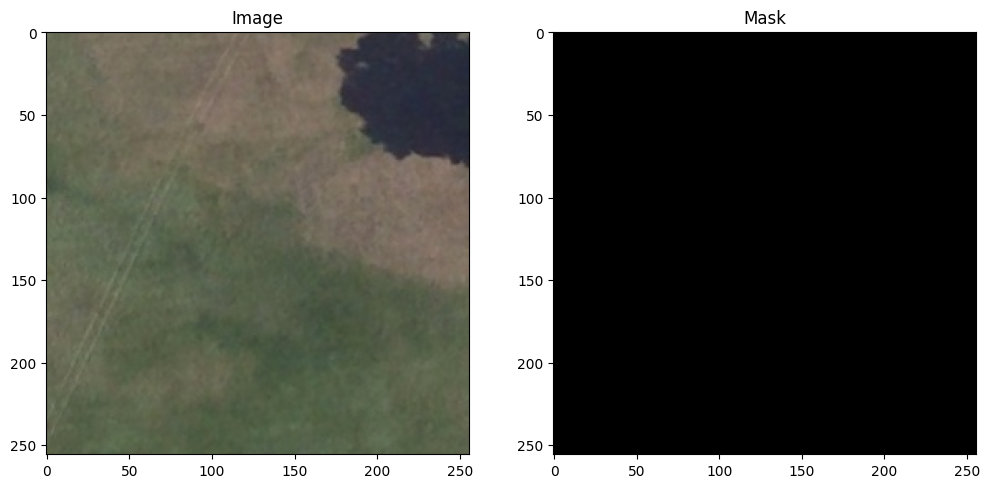

In [21]:
img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

....................................................................

In [25]:
#Now, let us copy images and masks with real information to a new folder.
#real information = if mask has decent amount of labels other than 0. 


useless=0  #Useless image counter
for img in range(len(img_list)):   #Using t1_list as all lists are of same size
    img_name=img_list[img]
    mask_name = msk_list[img]
    print("Now preparing image and masks number: ", img)
    temp_image=cv2.imread(train_img_dir+img_list[img], 1)
   
    temp_mask=cv2.imread(train_mask_dir+msk_list[img], 0)
    #temp_mask=temp_mask.astype(np.uint8)
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.05:  #At least 5% useful area with labels that are not 0
        print("Save Me")
        cv2.imwrite('./256_patches/images_with_useful_info/images/'+img_name, temp_image)
        cv2.imwrite('./256_patches/images_with_useful_info/masks/'+mask_name, temp_mask)
        
    else:
        print("I am useless")   
        useless +=1
        
print("Total useful images are: ", len(img_list)-useless)  #20,075
print("Total useless images are: ", useless) #21,571

Now preparing image and masks number:  0
I am useless
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
I am useless
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
Save Me
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
I am useless
Now preparing image and masks number:  7
I am useless
Now preparing image and masks number:  8
I am useless
Now preparing image and masks number:  9
I am useless
Now preparing image and masks number:  10
I am useless
Now preparing image and masks number:  11
I am useless
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
I am useless
Now preparing image and masks number:  14
I am useless
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now prepar

I am useless
Now preparing image and masks number:  165
I am useless
Now preparing image and masks number:  166
Save Me
Now preparing image and masks number:  167
I am useless
Now preparing image and masks number:  168
Save Me
Now preparing image and masks number:  169
I am useless
Now preparing image and masks number:  170
I am useless
Now preparing image and masks number:  171
I am useless
Now preparing image and masks number:  172
I am useless
Now preparing image and masks number:  173
Save Me
Now preparing image and masks number:  174
Save Me
Now preparing image and masks number:  175
I am useless
Now preparing image and masks number:  176
I am useless
Now preparing image and masks number:  177
I am useless
Now preparing image and masks number:  178
I am useless
Now preparing image and masks number:  179
Save Me
Now preparing image and masks number:  180
I am useless
Now preparing image and masks number:  181
Save Me
Now preparing image and masks number:  182
I am useless
Now prepa

Save Me
Now preparing image and masks number:  323
Save Me
Now preparing image and masks number:  324
Save Me
Now preparing image and masks number:  325
Save Me
Now preparing image and masks number:  326
I am useless
Now preparing image and masks number:  327
I am useless
Now preparing image and masks number:  328
Save Me
Now preparing image and masks number:  329
I am useless
Now preparing image and masks number:  330
I am useless
Now preparing image and masks number:  331
Save Me
Now preparing image and masks number:  332
Save Me
Now preparing image and masks number:  333
Save Me
Now preparing image and masks number:  334
I am useless
Now preparing image and masks number:  335
I am useless
Now preparing image and masks number:  336
Save Me
Now preparing image and masks number:  337
I am useless
Now preparing image and masks number:  338
Save Me
Now preparing image and masks number:  339
I am useless
Now preparing image and masks number:  340
I am useless
Now preparing image and masks

Now preparing image and masks number:  482
Save Me
Now preparing image and masks number:  483
Save Me
Now preparing image and masks number:  484
Save Me
Now preparing image and masks number:  485
Save Me
Now preparing image and masks number:  486
I am useless
Now preparing image and masks number:  487
I am useless
Now preparing image and masks number:  488
I am useless
Now preparing image and masks number:  489
Save Me
Now preparing image and masks number:  490
Save Me
Now preparing image and masks number:  491
I am useless
Now preparing image and masks number:  492
Save Me
Now preparing image and masks number:  493
Save Me
Now preparing image and masks number:  494
Save Me
Now preparing image and masks number:  495
Save Me
Now preparing image and masks number:  496
I am useless
Now preparing image and masks number:  497
Save Me
Now preparing image and masks number:  498
Save Me
Now preparing image and masks number:  499
Save Me
Now preparing image and masks number:  500
Save Me
Now pr

Now preparing image and masks number:  649
Save Me
Now preparing image and masks number:  650
Save Me
Now preparing image and masks number:  651
I am useless
Now preparing image and masks number:  652
I am useless
Now preparing image and masks number:  653
I am useless
Now preparing image and masks number:  654
Save Me
Now preparing image and masks number:  655
Save Me
Now preparing image and masks number:  656
Save Me
Now preparing image and masks number:  657
I am useless
Now preparing image and masks number:  658
I am useless
Now preparing image and masks number:  659
I am useless
Now preparing image and masks number:  660
Save Me
Now preparing image and masks number:  661
Save Me
Now preparing image and masks number:  662
Save Me
Now preparing image and masks number:  663
I am useless
Now preparing image and masks number:  664
I am useless
Now preparing image and masks number:  665
I am useless
Now preparing image and masks number:  666
I am useless
Now preparing image and masks nu

Now preparing image and masks number:  813
Save Me
Now preparing image and masks number:  814
Save Me
Now preparing image and masks number:  815
Save Me
Now preparing image and masks number:  816
I am useless
Now preparing image and masks number:  817
I am useless
Now preparing image and masks number:  818
I am useless
Now preparing image and masks number:  819
Save Me
Now preparing image and masks number:  820
Save Me
Now preparing image and masks number:  821
Save Me
Now preparing image and masks number:  822
Save Me
Now preparing image and masks number:  823
I am useless
Now preparing image and masks number:  824
Save Me
Now preparing image and masks number:  825
Save Me
Now preparing image and masks number:  826
I am useless
Now preparing image and masks number:  827
I am useless
Now preparing image and masks number:  828
I am useless
Now preparing image and masks number:  829
I am useless
Now preparing image and masks number:  830
I am useless
Now preparing image and masks number:

Now preparing image and masks number:  969
Save Me
Now preparing image and masks number:  970
Save Me
Now preparing image and masks number:  971
Save Me
Now preparing image and masks number:  972
I am useless
Now preparing image and masks number:  973
I am useless
Now preparing image and masks number:  974
Save Me
Now preparing image and masks number:  975
Save Me
Now preparing image and masks number:  976
I am useless
Now preparing image and masks number:  977
I am useless
Now preparing image and masks number:  978
Save Me
Now preparing image and masks number:  979
Save Me
Now preparing image and masks number:  980
Save Me
Now preparing image and masks number:  981
I am useless
Now preparing image and masks number:  982
I am useless
Now preparing image and masks number:  983
I am useless
Now preparing image and masks number:  984
I am useless
Now preparing image and masks number:  985
I am useless
Now preparing image and masks number:  986
I am useless
Now preparing image and masks nu

Now preparing image and masks number:  1127
Save Me
Now preparing image and masks number:  1128
Save Me
Now preparing image and masks number:  1129
I am useless
Now preparing image and masks number:  1130
I am useless
Now preparing image and masks number:  1131
I am useless
Now preparing image and masks number:  1132
I am useless
Now preparing image and masks number:  1133
Save Me
Now preparing image and masks number:  1134
I am useless
Now preparing image and masks number:  1135
I am useless
Now preparing image and masks number:  1136
I am useless
Now preparing image and masks number:  1137
Save Me
Now preparing image and masks number:  1138
Save Me
Now preparing image and masks number:  1139
Save Me
Now preparing image and masks number:  1140
Save Me
Now preparing image and masks number:  1141
I am useless
Now preparing image and masks number:  1142
I am useless
Now preparing image and masks number:  1143
Save Me
Now preparing image and masks number:  1144
Save Me
Now preparing image

Now preparing image and masks number:  1302
Save Me
Now preparing image and masks number:  1303
Save Me
Now preparing image and masks number:  1304
Save Me
Now preparing image and masks number:  1305
Save Me
Now preparing image and masks number:  1306
Save Me
Now preparing image and masks number:  1307
Save Me
Now preparing image and masks number:  1308
Save Me
Now preparing image and masks number:  1309
Save Me
Now preparing image and masks number:  1310
Save Me
Now preparing image and masks number:  1311
Save Me
Now preparing image and masks number:  1312
I am useless
Now preparing image and masks number:  1313
I am useless
Now preparing image and masks number:  1314
I am useless
Now preparing image and masks number:  1315
I am useless
Now preparing image and masks number:  1316
I am useless
Now preparing image and masks number:  1317
Save Me
Now preparing image and masks number:  1318
Save Me
Now preparing image and masks number:  1319
Save Me
Now preparing image and masks number:  

I am useless
Now preparing image and masks number:  1470
I am useless
Now preparing image and masks number:  1471
Save Me
Now preparing image and masks number:  1472
Save Me
Now preparing image and masks number:  1473
I am useless
Now preparing image and masks number:  1474
I am useless
Now preparing image and masks number:  1475
I am useless
Now preparing image and masks number:  1476
I am useless
Now preparing image and masks number:  1477
Save Me
Now preparing image and masks number:  1478
Save Me
Now preparing image and masks number:  1479
Save Me
Now preparing image and masks number:  1480
Save Me
Now preparing image and masks number:  1481
Save Me
Now preparing image and masks number:  1482
Save Me
Now preparing image and masks number:  1483
Save Me
Now preparing image and masks number:  1484
Save Me
Now preparing image and masks number:  1485
Save Me
Now preparing image and masks number:  1486
Save Me
Now preparing image and masks number:  1487
Save Me
Now preparing image and ma

Now preparing image and masks number:  1627
I am useless
Now preparing image and masks number:  1628
I am useless
Now preparing image and masks number:  1629
Save Me
Now preparing image and masks number:  1630
Save Me
Now preparing image and masks number:  1631
Save Me
Now preparing image and masks number:  1632
I am useless
Now preparing image and masks number:  1633
Save Me
Now preparing image and masks number:  1634
Save Me
Now preparing image and masks number:  1635
I am useless
Now preparing image and masks number:  1636
Save Me
Now preparing image and masks number:  1637
Save Me
Now preparing image and masks number:  1638
Save Me
Now preparing image and masks number:  1639
Save Me
Now preparing image and masks number:  1640
I am useless
Now preparing image and masks number:  1641
I am useless
Now preparing image and masks number:  1642
I am useless
Now preparing image and masks number:  1643
I am useless
Now preparing image and masks number:  1644
I am useless
Now preparing image

Now preparing image and masks number:  1786
Save Me
Now preparing image and masks number:  1787
Save Me
Now preparing image and masks number:  1788
Save Me
Now preparing image and masks number:  1789
Save Me
Now preparing image and masks number:  1790
Save Me
Now preparing image and masks number:  1791
Save Me
Now preparing image and masks number:  1792
Save Me
Now preparing image and masks number:  1793
Save Me
Now preparing image and masks number:  1794
Save Me
Now preparing image and masks number:  1795
I am useless
Now preparing image and masks number:  1796
Save Me
Now preparing image and masks number:  1797
Save Me
Now preparing image and masks number:  1798
Save Me
Now preparing image and masks number:  1799
Save Me
Now preparing image and masks number:  1800
Save Me
Now preparing image and masks number:  1801
Save Me
Now preparing image and masks number:  1802
Save Me
Now preparing image and masks number:  1803
I am useless
Now preparing image and masks number:  1804
I am usele

Now preparing image and masks number:  1953
Save Me
Now preparing image and masks number:  1954
Save Me
Now preparing image and masks number:  1955
Save Me
Now preparing image and masks number:  1956
Save Me
Now preparing image and masks number:  1957
Save Me
Now preparing image and masks number:  1958
Save Me
Now preparing image and masks number:  1959
Save Me
Now preparing image and masks number:  1960
Save Me
Now preparing image and masks number:  1961
I am useless
Now preparing image and masks number:  1962
I am useless
Now preparing image and masks number:  1963
Save Me
Now preparing image and masks number:  1964
I am useless
Now preparing image and masks number:  1965
I am useless
Now preparing image and masks number:  1966
I am useless
Now preparing image and masks number:  1967
Save Me
Now preparing image and masks number:  1968
Save Me
Now preparing image and masks number:  1969
I am useless
Now preparing image and masks number:  1970
I am useless
Now preparing image and masks

Now preparing image and masks number:  2113
Save Me
Now preparing image and masks number:  2114
Save Me
Now preparing image and masks number:  2115
Save Me
Now preparing image and masks number:  2116
Save Me
Now preparing image and masks number:  2117
Save Me
Now preparing image and masks number:  2118
Save Me
Now preparing image and masks number:  2119
Save Me
Now preparing image and masks number:  2120
Save Me
Now preparing image and masks number:  2121
Save Me
Now preparing image and masks number:  2122
I am useless
Now preparing image and masks number:  2123
Save Me
Now preparing image and masks number:  2124
Save Me
Now preparing image and masks number:  2125
Save Me
Now preparing image and masks number:  2126
Save Me
Now preparing image and masks number:  2127
I am useless
Now preparing image and masks number:  2128
I am useless
Now preparing image and masks number:  2129
I am useless
Now preparing image and masks number:  2130
Save Me
Now preparing image and masks number:  2131


Now preparing image and masks number:  2283
Save Me
Now preparing image and masks number:  2284
Save Me
Now preparing image and masks number:  2285
I am useless
Now preparing image and masks number:  2286
I am useless
Now preparing image and masks number:  2287
I am useless
Now preparing image and masks number:  2288
Save Me
Now preparing image and masks number:  2289
Save Me
Now preparing image and masks number:  2290
Save Me
Now preparing image and masks number:  2291
Save Me
Now preparing image and masks number:  2292
Save Me
Now preparing image and masks number:  2293
Save Me
Now preparing image and masks number:  2294
I am useless
Now preparing image and masks number:  2295
I am useless
Now preparing image and masks number:  2296
Save Me
Now preparing image and masks number:  2297
Save Me
Now preparing image and masks number:  2298
Save Me
Now preparing image and masks number:  2299
Save Me
Now preparing image and masks number:  2300
I am useless
Now preparing image and masks numb

Now preparing image and masks number:  2451
Save Me
Now preparing image and masks number:  2452
I am useless
Now preparing image and masks number:  2453
Save Me
Now preparing image and masks number:  2454
Save Me
Now preparing image and masks number:  2455
Save Me
Now preparing image and masks number:  2456
Save Me
Now preparing image and masks number:  2457
Save Me
Now preparing image and masks number:  2458
I am useless
Now preparing image and masks number:  2459
I am useless
Now preparing image and masks number:  2460
I am useless
Now preparing image and masks number:  2461
I am useless
Now preparing image and masks number:  2462
I am useless
Now preparing image and masks number:  2463
I am useless
Now preparing image and masks number:  2464
I am useless
Now preparing image and masks number:  2465
I am useless
Now preparing image and masks number:  2466
I am useless
Now preparing image and masks number:  2467
Save Me
Now preparing image and masks number:  2468
Save Me
Now preparing 

I am useless
Now preparing image and masks number:  2621
Save Me
Now preparing image and masks number:  2622
I am useless
Now preparing image and masks number:  2623
I am useless
Now preparing image and masks number:  2624
I am useless
Now preparing image and masks number:  2625
Save Me
Now preparing image and masks number:  2626
Save Me
Now preparing image and masks number:  2627
I am useless
Now preparing image and masks number:  2628
I am useless
Now preparing image and masks number:  2629
I am useless
Now preparing image and masks number:  2630
Save Me
Now preparing image and masks number:  2631
I am useless
Now preparing image and masks number:  2632
Save Me
Now preparing image and masks number:  2633
I am useless
Now preparing image and masks number:  2634
Save Me
Now preparing image and masks number:  2635
Save Me
Now preparing image and masks number:  2636
Save Me
Now preparing image and masks number:  2637
Save Me
Now preparing image and masks number:  2638
I am useless
Now pr

I am useless
Now preparing image and masks number:  2787
I am useless
Now preparing image and masks number:  2788
I am useless
Now preparing image and masks number:  2789
I am useless
Now preparing image and masks number:  2790
I am useless
Now preparing image and masks number:  2791
I am useless
Now preparing image and masks number:  2792
I am useless
Now preparing image and masks number:  2793
I am useless
Now preparing image and masks number:  2794
I am useless
Now preparing image and masks number:  2795
I am useless
Now preparing image and masks number:  2796
I am useless
Now preparing image and masks number:  2797
Save Me
Now preparing image and masks number:  2798
Save Me
Now preparing image and masks number:  2799
I am useless
Now preparing image and masks number:  2800
I am useless
Now preparing image and masks number:  2801
I am useless
Now preparing image and masks number:  2802
Save Me
Now preparing image and masks number:  2803
Save Me
Now preparing image and masks number: 

I am useless
Now preparing image and masks number:  2935
I am useless
Now preparing image and masks number:  2936
Save Me
Now preparing image and masks number:  2937
I am useless
Now preparing image and masks number:  2938
I am useless
Now preparing image and masks number:  2939
I am useless
Now preparing image and masks number:  2940
I am useless
Now preparing image and masks number:  2941
I am useless
Now preparing image and masks number:  2942
I am useless
Now preparing image and masks number:  2943
I am useless
Now preparing image and masks number:  2944
I am useless
Now preparing image and masks number:  2945
I am useless
Now preparing image and masks number:  2946
I am useless
Now preparing image and masks number:  2947
I am useless
Now preparing image and masks number:  2948
Save Me
Now preparing image and masks number:  2949
I am useless
Now preparing image and masks number:  2950
Save Me
Now preparing image and masks number:  2951
Save Me
Now preparing image and masks number: 

Now preparing image and masks number:  3108
I am useless
Now preparing image and masks number:  3109
I am useless
Now preparing image and masks number:  3110
I am useless
Now preparing image and masks number:  3111
Save Me
Now preparing image and masks number:  3112
I am useless
Now preparing image and masks number:  3113
I am useless
Now preparing image and masks number:  3114
I am useless
Now preparing image and masks number:  3115
Save Me
Now preparing image and masks number:  3116
I am useless
Now preparing image and masks number:  3117
I am useless
Now preparing image and masks number:  3118
Save Me
Now preparing image and masks number:  3119
Save Me
Now preparing image and masks number:  3120
Save Me
Now preparing image and masks number:  3121
Save Me
Now preparing image and masks number:  3122
Save Me
Now preparing image and masks number:  3123
I am useless
Now preparing image and masks number:  3124
Save Me
Now preparing image and masks number:  3125
I am useless
Now preparing 

I am useless
Now preparing image and masks number:  3266
Save Me
Now preparing image and masks number:  3267
I am useless
Now preparing image and masks number:  3268
Save Me
Now preparing image and masks number:  3269
I am useless
Now preparing image and masks number:  3270
Save Me
Now preparing image and masks number:  3271
Save Me
Now preparing image and masks number:  3272
I am useless
Now preparing image and masks number:  3273
I am useless
Now preparing image and masks number:  3274
I am useless
Now preparing image and masks number:  3275
I am useless
Now preparing image and masks number:  3276
Save Me
Now preparing image and masks number:  3277
Save Me
Now preparing image and masks number:  3278
Save Me
Now preparing image and masks number:  3279
Save Me
Now preparing image and masks number:  3280
I am useless
Now preparing image and masks number:  3281
Save Me
Now preparing image and masks number:  3282
Save Me
Now preparing image and masks number:  3283
Save Me
Now preparing im

Now preparing image and masks number:  3451
Save Me
Now preparing image and masks number:  3452
I am useless
Now preparing image and masks number:  3453
I am useless
Now preparing image and masks number:  3454
I am useless
Now preparing image and masks number:  3455
I am useless
Now preparing image and masks number:  3456
Save Me
Now preparing image and masks number:  3457
I am useless
Now preparing image and masks number:  3458
Save Me
Now preparing image and masks number:  3459
Save Me
Now preparing image and masks number:  3460
Save Me
Now preparing image and masks number:  3461
Save Me
Now preparing image and masks number:  3462
I am useless
Now preparing image and masks number:  3463
Save Me
Now preparing image and masks number:  3464
Save Me
Now preparing image and masks number:  3465
Save Me
Now preparing image and masks number:  3466
Save Me
Now preparing image and masks number:  3467
Save Me
Now preparing image and masks number:  3468
Save Me
Now preparing image and masks numb

Now preparing image and masks number:  3602
I am useless
Now preparing image and masks number:  3603
I am useless
Now preparing image and masks number:  3604
Save Me
Now preparing image and masks number:  3605
Save Me
Now preparing image and masks number:  3606
Save Me
Now preparing image and masks number:  3607
Save Me
Now preparing image and masks number:  3608
I am useless
Now preparing image and masks number:  3609
I am useless
Now preparing image and masks number:  3610
I am useless
Now preparing image and masks number:  3611
I am useless
Now preparing image and masks number:  3612
I am useless
Now preparing image and masks number:  3613
I am useless
Now preparing image and masks number:  3614
I am useless
Now preparing image and masks number:  3615
Save Me
Now preparing image and masks number:  3616
Save Me
Now preparing image and masks number:  3617
Save Me
Now preparing image and masks number:  3618
Save Me
Now preparing image and masks number:  3619
I am useless
Now preparing 

Now preparing image and masks number:  3768
I am useless
Now preparing image and masks number:  3769
Save Me
Now preparing image and masks number:  3770
Save Me
Now preparing image and masks number:  3771
I am useless
Now preparing image and masks number:  3772
Save Me
Now preparing image and masks number:  3773
Save Me
Now preparing image and masks number:  3774
Save Me
Now preparing image and masks number:  3775
Save Me
Now preparing image and masks number:  3776
I am useless
Now preparing image and masks number:  3777
I am useless
Now preparing image and masks number:  3778
I am useless
Now preparing image and masks number:  3779
Save Me
Now preparing image and masks number:  3780
I am useless
Now preparing image and masks number:  3781
Save Me
Now preparing image and masks number:  3782
Save Me
Now preparing image and masks number:  3783
Save Me
Now preparing image and masks number:  3784
Save Me
Now preparing image and masks number:  3785
Save Me
Now preparing image and masks numb

Now preparing image and masks number:  3930
Save Me
Now preparing image and masks number:  3931
I am useless
Now preparing image and masks number:  3932
I am useless
Now preparing image and masks number:  3933
I am useless
Now preparing image and masks number:  3934
I am useless
Now preparing image and masks number:  3935
Save Me
Now preparing image and masks number:  3936
Save Me
Now preparing image and masks number:  3937
Save Me
Now preparing image and masks number:  3938
I am useless
Now preparing image and masks number:  3939
Save Me
Now preparing image and masks number:  3940
I am useless
Now preparing image and masks number:  3941
Save Me
Now preparing image and masks number:  3942
Save Me
Now preparing image and masks number:  3943
Save Me
Now preparing image and masks number:  3944
Save Me
Now preparing image and masks number:  3945
I am useless
Now preparing image and masks number:  3946
Save Me
Now preparing image and masks number:  3947
I am useless
Now preparing image and 

Now preparing image and masks number:  4089
Save Me
Now preparing image and masks number:  4090
Save Me
Now preparing image and masks number:  4091
Save Me
Now preparing image and masks number:  4092
Save Me
Now preparing image and masks number:  4093
I am useless
Now preparing image and masks number:  4094
Save Me
Now preparing image and masks number:  4095
Save Me
Now preparing image and masks number:  4096
Save Me
Now preparing image and masks number:  4097
Save Me
Now preparing image and masks number:  4098
Save Me
Now preparing image and masks number:  4099
Save Me
Now preparing image and masks number:  4100
I am useless
Now preparing image and masks number:  4101
I am useless
Now preparing image and masks number:  4102
I am useless
Now preparing image and masks number:  4103
Save Me
Now preparing image and masks number:  4104
I am useless
Now preparing image and masks number:  4105
Save Me
Now preparing image and masks number:  4106
I am useless
Now preparing image and masks numb

Save Me
Now preparing image and masks number:  4263
Save Me
Now preparing image and masks number:  4264
Save Me
Now preparing image and masks number:  4265
Save Me
Now preparing image and masks number:  4266
I am useless
Now preparing image and masks number:  4267
I am useless
Now preparing image and masks number:  4268
I am useless
Now preparing image and masks number:  4269
Save Me
Now preparing image and masks number:  4270
Save Me
Now preparing image and masks number:  4271
Save Me
Now preparing image and masks number:  4272
Save Me
Now preparing image and masks number:  4273
Save Me
Now preparing image and masks number:  4274
Save Me
Now preparing image and masks number:  4275
Save Me
Now preparing image and masks number:  4276
I am useless
Now preparing image and masks number:  4277
Save Me
Now preparing image and masks number:  4278
Save Me
Now preparing image and masks number:  4279
I am useless
Now preparing image and masks number:  4280
Save Me
Now preparing image and masks n

Now preparing image and masks number:  4449
Save Me
Now preparing image and masks number:  4450
Save Me
Now preparing image and masks number:  4451
I am useless
Now preparing image and masks number:  4452
Save Me
Now preparing image and masks number:  4453
Save Me
Now preparing image and masks number:  4454
Save Me
Now preparing image and masks number:  4455
I am useless
Now preparing image and masks number:  4456
I am useless
Now preparing image and masks number:  4457
I am useless
Now preparing image and masks number:  4458
I am useless
Now preparing image and masks number:  4459
I am useless
Now preparing image and masks number:  4460
I am useless
Now preparing image and masks number:  4461
Save Me
Now preparing image and masks number:  4462
Save Me
Now preparing image and masks number:  4463
I am useless
Now preparing image and masks number:  4464
Save Me
Now preparing image and masks number:  4465
I am useless
Now preparing image and masks number:  4466
I am useless
Now preparing 

Now preparing image and masks number:  4630
Save Me
Now preparing image and masks number:  4631
Save Me
Now preparing image and masks number:  4632
Save Me
Now preparing image and masks number:  4633
Save Me
Now preparing image and masks number:  4634
Save Me
Now preparing image and masks number:  4635
I am useless
Now preparing image and masks number:  4636
I am useless
Now preparing image and masks number:  4637
Save Me
Now preparing image and masks number:  4638
Save Me
Now preparing image and masks number:  4639
Save Me
Now preparing image and masks number:  4640
I am useless
Now preparing image and masks number:  4641
Save Me
Now preparing image and masks number:  4642
Save Me
Now preparing image and masks number:  4643
Save Me
Now preparing image and masks number:  4644
I am useless
Now preparing image and masks number:  4645
Save Me
Now preparing image and masks number:  4646
I am useless
Now preparing image and masks number:  4647
Save Me
Now preparing image and masks number:  

Now preparing image and masks number:  4788
I am useless
Now preparing image and masks number:  4789
I am useless
Now preparing image and masks number:  4790
I am useless
Now preparing image and masks number:  4791
I am useless
Now preparing image and masks number:  4792
I am useless
Now preparing image and masks number:  4793
Save Me
Now preparing image and masks number:  4794
Save Me
Now preparing image and masks number:  4795
I am useless
Now preparing image and masks number:  4796
I am useless
Now preparing image and masks number:  4797
I am useless
Now preparing image and masks number:  4798
Save Me
Now preparing image and masks number:  4799
I am useless
Now preparing image and masks number:  4800
I am useless
Now preparing image and masks number:  4801
I am useless
Now preparing image and masks number:  4802
I am useless
Now preparing image and masks number:  4803
I am useless
Now preparing image and masks number:  4804
Save Me
Now preparing image and masks number:  4805
I am us

Save Me
Now preparing image and masks number:  4948
I am useless
Now preparing image and masks number:  4949
I am useless
Now preparing image and masks number:  4950
Save Me
Now preparing image and masks number:  4951
Save Me
Now preparing image and masks number:  4952
Save Me
Now preparing image and masks number:  4953
Save Me
Now preparing image and masks number:  4954
Save Me
Now preparing image and masks number:  4955
Save Me
Now preparing image and masks number:  4956
I am useless
Now preparing image and masks number:  4957
I am useless
Now preparing image and masks number:  4958
I am useless
Now preparing image and masks number:  4959
I am useless
Now preparing image and masks number:  4960
I am useless
Now preparing image and masks number:  4961
I am useless
Now preparing image and masks number:  4962
I am useless
Now preparing image and masks number:  4963
Save Me
Now preparing image and masks number:  4964
Save Me
Now preparing image and masks number:  4965
Save Me
Now prepari

I am useless
Now preparing image and masks number:  5103
I am useless
Now preparing image and masks number:  5104
I am useless
Now preparing image and masks number:  5105
I am useless
Now preparing image and masks number:  5106
I am useless
Now preparing image and masks number:  5107
Save Me
Now preparing image and masks number:  5108
Save Me
Now preparing image and masks number:  5109
I am useless
Now preparing image and masks number:  5110
I am useless
Now preparing image and masks number:  5111
I am useless
Now preparing image and masks number:  5112
I am useless
Now preparing image and masks number:  5113
I am useless
Now preparing image and masks number:  5114
Save Me
Now preparing image and masks number:  5115
I am useless
Now preparing image and masks number:  5116
I am useless
Now preparing image and masks number:  5117
I am useless
Now preparing image and masks number:  5118
I am useless
Now preparing image and masks number:  5119
Save Me
Now preparing image and masks number: 

Save Me
Now preparing image and masks number:  5280
Save Me
Now preparing image and masks number:  5281
I am useless
Now preparing image and masks number:  5282
I am useless
Now preparing image and masks number:  5283
I am useless
Now preparing image and masks number:  5284
I am useless
Now preparing image and masks number:  5285
I am useless
Now preparing image and masks number:  5286
I am useless
Now preparing image and masks number:  5287
Save Me
Now preparing image and masks number:  5288
I am useless
Now preparing image and masks number:  5289
I am useless
Now preparing image and masks number:  5290
Save Me
Now preparing image and masks number:  5291
Save Me
Now preparing image and masks number:  5292
Save Me
Now preparing image and masks number:  5293
Save Me
Now preparing image and masks number:  5294
Save Me
Now preparing image and masks number:  5295
Save Me
Now preparing image and masks number:  5296
Save Me
Now preparing image and masks number:  5297
Save Me
Now preparing im

I am useless
Now preparing image and masks number:  5468
I am useless
Now preparing image and masks number:  5469
Save Me
Now preparing image and masks number:  5470
I am useless
Now preparing image and masks number:  5471
I am useless
Now preparing image and masks number:  5472
Save Me
Now preparing image and masks number:  5473
Save Me
Now preparing image and masks number:  5474
I am useless
Now preparing image and masks number:  5475
Save Me
Now preparing image and masks number:  5476
Save Me
Now preparing image and masks number:  5477
Save Me
Now preparing image and masks number:  5478
Save Me
Now preparing image and masks number:  5479
Save Me
Now preparing image and masks number:  5480
Save Me
Now preparing image and masks number:  5481
Save Me
Now preparing image and masks number:  5482
I am useless
Now preparing image and masks number:  5483
I am useless
Now preparing image and masks number:  5484
I am useless
Now preparing image and masks number:  5485
I am useless
Now prepari

Now preparing image and masks number:  5636
Save Me
Now preparing image and masks number:  5637
I am useless
Now preparing image and masks number:  5638
I am useless
Now preparing image and masks number:  5639
I am useless
Now preparing image and masks number:  5640
Save Me
Now preparing image and masks number:  5641
I am useless
Now preparing image and masks number:  5642
Save Me
Now preparing image and masks number:  5643
Save Me
Now preparing image and masks number:  5644
I am useless
Now preparing image and masks number:  5645
I am useless
Now preparing image and masks number:  5646
I am useless
Now preparing image and masks number:  5647
I am useless
Now preparing image and masks number:  5648
I am useless
Now preparing image and masks number:  5649
I am useless
Now preparing image and masks number:  5650
I am useless
Now preparing image and masks number:  5651
Save Me
Now preparing image and masks number:  5652
Save Me
Now preparing image and masks number:  5653
I am useless
Now 

Now preparing image and masks number:  5808
I am useless
Now preparing image and masks number:  5809
I am useless
Now preparing image and masks number:  5810
Save Me
Now preparing image and masks number:  5811
Save Me
Now preparing image and masks number:  5812
Save Me
Now preparing image and masks number:  5813
Save Me
Now preparing image and masks number:  5814
Save Me
Now preparing image and masks number:  5815
Save Me
Now preparing image and masks number:  5816
Save Me
Now preparing image and masks number:  5817
I am useless
Now preparing image and masks number:  5818
Save Me
Now preparing image and masks number:  5819
I am useless
Now preparing image and masks number:  5820
Save Me
Now preparing image and masks number:  5821
Save Me
Now preparing image and masks number:  5822
I am useless
Now preparing image and masks number:  5823
I am useless
Now preparing image and masks number:  5824
Save Me
Now preparing image and masks number:  5825
I am useless
Now preparing image and masks

Save Me
Now preparing image and masks number:  5974
Save Me
Now preparing image and masks number:  5975
Save Me
Now preparing image and masks number:  5976
I am useless
Now preparing image and masks number:  5977
Save Me
Now preparing image and masks number:  5978
Save Me
Now preparing image and masks number:  5979
I am useless
Now preparing image and masks number:  5980
Save Me
Now preparing image and masks number:  5981
I am useless
Now preparing image and masks number:  5982
I am useless
Now preparing image and masks number:  5983
Save Me
Now preparing image and masks number:  5984
I am useless
Now preparing image and masks number:  5985
I am useless
Now preparing image and masks number:  5986
I am useless
Now preparing image and masks number:  5987
I am useless
Now preparing image and masks number:  5988
I am useless
Now preparing image and masks number:  5989
Save Me
Now preparing image and masks number:  5990
Save Me
Now preparing image and masks number:  5991
Save Me
Now prepari

Save Me
Now preparing image and masks number:  6127
Save Me
Now preparing image and masks number:  6128
Save Me
Now preparing image and masks number:  6129
Save Me
Now preparing image and masks number:  6130
Save Me
Now preparing image and masks number:  6131
Save Me
Now preparing image and masks number:  6132
Save Me
Now preparing image and masks number:  6133
Save Me
Now preparing image and masks number:  6134
Save Me
Now preparing image and masks number:  6135
I am useless
Now preparing image and masks number:  6136
Save Me
Now preparing image and masks number:  6137
Save Me
Now preparing image and masks number:  6138
Save Me
Now preparing image and masks number:  6139
Save Me
Now preparing image and masks number:  6140
I am useless
Now preparing image and masks number:  6141
I am useless
Now preparing image and masks number:  6142
Save Me
Now preparing image and masks number:  6143
I am useless
Now preparing image and masks number:  6144
I am useless
Now preparing image and masks n

Now preparing image and masks number:  6295
Save Me
Now preparing image and masks number:  6296
Save Me
Now preparing image and masks number:  6297
Save Me
Now preparing image and masks number:  6298
Save Me
Now preparing image and masks number:  6299
Save Me
Now preparing image and masks number:  6300
Save Me
Now preparing image and masks number:  6301
Save Me
Now preparing image and masks number:  6302
Save Me
Now preparing image and masks number:  6303
Save Me
Now preparing image and masks number:  6304
Save Me
Now preparing image and masks number:  6305
Save Me
Now preparing image and masks number:  6306
Save Me
Now preparing image and masks number:  6307
Save Me
Now preparing image and masks number:  6308
Save Me
Now preparing image and masks number:  6309
Save Me
Now preparing image and masks number:  6310
Save Me
Now preparing image and masks number:  6311
Save Me
Now preparing image and masks number:  6312
Save Me
Now preparing image and masks number:  6313
Save Me
Now preparin

Now preparing image and masks number:  6475
Save Me
Now preparing image and masks number:  6476
Save Me
Now preparing image and masks number:  6477
Save Me
Now preparing image and masks number:  6478
I am useless
Now preparing image and masks number:  6479
Save Me
Now preparing image and masks number:  6480
Save Me
Now preparing image and masks number:  6481
I am useless
Now preparing image and masks number:  6482
Save Me
Now preparing image and masks number:  6483
Save Me
Now preparing image and masks number:  6484
I am useless
Now preparing image and masks number:  6485
Save Me
Now preparing image and masks number:  6486
Save Me
Now preparing image and masks number:  6487
I am useless
Now preparing image and masks number:  6488
Save Me
Now preparing image and masks number:  6489
Save Me
Now preparing image and masks number:  6490
I am useless
Now preparing image and masks number:  6491
Save Me
Now preparing image and masks number:  6492
Save Me
Now preparing image and masks number:  

Now preparing image and masks number:  6649
I am useless
Now preparing image and masks number:  6650
Save Me
Now preparing image and masks number:  6651
Save Me
Now preparing image and masks number:  6652
Save Me
Now preparing image and masks number:  6653
Save Me
Now preparing image and masks number:  6654
Save Me
Now preparing image and masks number:  6655
Save Me
Now preparing image and masks number:  6656
I am useless
Now preparing image and masks number:  6657
I am useless
Now preparing image and masks number:  6658
I am useless
Now preparing image and masks number:  6659
I am useless
Now preparing image and masks number:  6660
I am useless
Now preparing image and masks number:  6661
I am useless
Now preparing image and masks number:  6662
I am useless
Now preparing image and masks number:  6663
I am useless
Now preparing image and masks number:  6664
Save Me
Now preparing image and masks number:  6665
Save Me
Now preparing image and masks number:  6666
Save Me
Now preparing image

Now preparing image and masks number:  6826
Save Me
Now preparing image and masks number:  6827
Save Me
Now preparing image and masks number:  6828
Save Me
Now preparing image and masks number:  6829
I am useless
Now preparing image and masks number:  6830
Save Me
Now preparing image and masks number:  6831
Save Me
Now preparing image and masks number:  6832
I am useless
Now preparing image and masks number:  6833
I am useless
Now preparing image and masks number:  6834
Save Me
Now preparing image and masks number:  6835
Save Me
Now preparing image and masks number:  6836
I am useless
Now preparing image and masks number:  6837
I am useless
Now preparing image and masks number:  6838
I am useless
Now preparing image and masks number:  6839
I am useless
Now preparing image and masks number:  6840
I am useless
Now preparing image and masks number:  6841
I am useless
Now preparing image and masks number:  6842
I am useless
Now preparing image and masks number:  6843
I am useless
Now prepa

Now preparing image and masks number:  6983
Save Me
Now preparing image and masks number:  6984
Save Me
Now preparing image and masks number:  6985
Save Me
Now preparing image and masks number:  6986
Save Me
Now preparing image and masks number:  6987
Save Me
Now preparing image and masks number:  6988
I am useless
Now preparing image and masks number:  6989
Save Me
Now preparing image and masks number:  6990
Save Me
Now preparing image and masks number:  6991
Save Me
Now preparing image and masks number:  6992
Save Me
Now preparing image and masks number:  6993
Save Me
Now preparing image and masks number:  6994
I am useless
Now preparing image and masks number:  6995
I am useless
Now preparing image and masks number:  6996
I am useless
Now preparing image and masks number:  6997
I am useless
Now preparing image and masks number:  6998
I am useless
Now preparing image and masks number:  6999
I am useless
Now preparing image and masks number:  7000
Save Me
Now preparing image and masks

Now preparing image and masks number:  7148
Save Me
Now preparing image and masks number:  7149
Save Me
Now preparing image and masks number:  7150
Save Me
Now preparing image and masks number:  7151
Save Me
Now preparing image and masks number:  7152
Save Me
Now preparing image and masks number:  7153
Save Me
Now preparing image and masks number:  7154
Save Me
Now preparing image and masks number:  7155
Save Me
Now preparing image and masks number:  7156
Save Me
Now preparing image and masks number:  7157
Save Me
Now preparing image and masks number:  7158
Save Me
Now preparing image and masks number:  7159
Save Me
Now preparing image and masks number:  7160
Save Me
Now preparing image and masks number:  7161
Save Me
Now preparing image and masks number:  7162
Save Me
Now preparing image and masks number:  7163
Save Me
Now preparing image and masks number:  7164
Save Me
Now preparing image and masks number:  7165
Save Me
Now preparing image and masks number:  7166
Save Me
Now preparin

Now preparing image and masks number:  7306
Save Me
Now preparing image and masks number:  7307
I am useless
Now preparing image and masks number:  7308
I am useless
Now preparing image and masks number:  7309
Save Me
Now preparing image and masks number:  7310
Save Me
Now preparing image and masks number:  7311
I am useless
Now preparing image and masks number:  7312
I am useless
Now preparing image and masks number:  7313
I am useless
Now preparing image and masks number:  7314
Save Me
Now preparing image and masks number:  7315
Save Me
Now preparing image and masks number:  7316
Save Me
Now preparing image and masks number:  7317
Save Me
Now preparing image and masks number:  7318
Save Me
Now preparing image and masks number:  7319
Save Me
Now preparing image and masks number:  7320
I am useless
Now preparing image and masks number:  7321
Save Me
Now preparing image and masks number:  7322
Save Me
Now preparing image and masks number:  7323
Save Me
Now preparing image and masks numb

I am useless
Now preparing image and masks number:  7471
I am useless
Now preparing image and masks number:  7472
Save Me
Now preparing image and masks number:  7473
I am useless
Now preparing image and masks number:  7474
Save Me
Now preparing image and masks number:  7475
I am useless
Now preparing image and masks number:  7476
I am useless
Now preparing image and masks number:  7477
Save Me
Now preparing image and masks number:  7478
Save Me
Now preparing image and masks number:  7479
Save Me
Now preparing image and masks number:  7480
Save Me
Now preparing image and masks number:  7481
Save Me
Now preparing image and masks number:  7482
Save Me
Now preparing image and masks number:  7483
Save Me
Now preparing image and masks number:  7484
Save Me
Now preparing image and masks number:  7485
I am useless
Now preparing image and masks number:  7486
I am useless
Now preparing image and masks number:  7487
I am useless
Now preparing image and masks number:  7488
I am useless
Now prepari

I am useless
Now preparing image and masks number:  7636
I am useless
Now preparing image and masks number:  7637
I am useless
Now preparing image and masks number:  7638
I am useless
Now preparing image and masks number:  7639
I am useless
Now preparing image and masks number:  7640
I am useless
Now preparing image and masks number:  7641
Save Me
Now preparing image and masks number:  7642
Save Me
Now preparing image and masks number:  7643
Save Me
Now preparing image and masks number:  7644
Save Me
Now preparing image and masks number:  7645
I am useless
Now preparing image and masks number:  7646
I am useless
Now preparing image and masks number:  7647
Save Me
Now preparing image and masks number:  7648
Save Me
Now preparing image and masks number:  7649
Save Me
Now preparing image and masks number:  7650
Save Me
Now preparing image and masks number:  7651
Save Me
Now preparing image and masks number:  7652
I am useless
Now preparing image and masks number:  7653
I am useless
Now pr

Now preparing image and masks number:  7790
Save Me
Now preparing image and masks number:  7791
Save Me
Now preparing image and masks number:  7792
Save Me
Now preparing image and masks number:  7793
Save Me
Now preparing image and masks number:  7794
Save Me
Now preparing image and masks number:  7795
Save Me
Now preparing image and masks number:  7796
Save Me
Now preparing image and masks number:  7797
Save Me
Now preparing image and masks number:  7798
Save Me
Now preparing image and masks number:  7799
Save Me
Now preparing image and masks number:  7800
Save Me
Now preparing image and masks number:  7801
Save Me
Now preparing image and masks number:  7802
Save Me
Now preparing image and masks number:  7803
Save Me
Now preparing image and masks number:  7804
Save Me
Now preparing image and masks number:  7805
Save Me
Now preparing image and masks number:  7806
Save Me
Now preparing image and masks number:  7807
Save Me
Now preparing image and masks number:  7808
I am useless
Now pre

Now preparing image and masks number:  7965
Save Me
Now preparing image and masks number:  7966
Save Me
Now preparing image and masks number:  7967
Save Me
Now preparing image and masks number:  7968
I am useless
Now preparing image and masks number:  7969
Save Me
Now preparing image and masks number:  7970
Save Me
Now preparing image and masks number:  7971
Save Me
Now preparing image and masks number:  7972
Save Me
Now preparing image and masks number:  7973
Save Me
Now preparing image and masks number:  7974
Save Me
Now preparing image and masks number:  7975
Save Me
Now preparing image and masks number:  7976
Save Me
Now preparing image and masks number:  7977
Save Me
Now preparing image and masks number:  7978
I am useless
Now preparing image and masks number:  7979
I am useless
Now preparing image and masks number:  7980
I am useless
Now preparing image and masks number:  7981
Save Me
Now preparing image and masks number:  7982
I am useless
Now preparing image and masks number:  

Save Me
Now preparing image and masks number:  8126
I am useless
Now preparing image and masks number:  8127
I am useless
Now preparing image and masks number:  8128
I am useless
Now preparing image and masks number:  8129
I am useless
Now preparing image and masks number:  8130
I am useless
Now preparing image and masks number:  8131
I am useless
Now preparing image and masks number:  8132
I am useless
Now preparing image and masks number:  8133
I am useless
Now preparing image and masks number:  8134
Save Me
Now preparing image and masks number:  8135
Save Me
Now preparing image and masks number:  8136
Save Me
Now preparing image and masks number:  8137
Save Me
Now preparing image and masks number:  8138
Save Me
Now preparing image and masks number:  8139
Save Me
Now preparing image and masks number:  8140
Save Me
Now preparing image and masks number:  8141
Save Me
Now preparing image and masks number:  8142
Save Me
Now preparing image and masks number:  8143
Save Me
Now preparing im

Now preparing image and masks number:  8279
Save Me
Now preparing image and masks number:  8280
Save Me
Now preparing image and masks number:  8281
I am useless
Now preparing image and masks number:  8282
I am useless
Now preparing image and masks number:  8283
I am useless
Now preparing image and masks number:  8284
I am useless
Now preparing image and masks number:  8285
I am useless
Now preparing image and masks number:  8286
Save Me
Now preparing image and masks number:  8287
Save Me
Now preparing image and masks number:  8288
Save Me
Now preparing image and masks number:  8289
Save Me
Now preparing image and masks number:  8290
Save Me
Now preparing image and masks number:  8291
Save Me
Now preparing image and masks number:  8292
I am useless
Now preparing image and masks number:  8293
I am useless
Now preparing image and masks number:  8294
Save Me
Now preparing image and masks number:  8295
I am useless
Now preparing image and masks number:  8296
I am useless
Now preparing image

Now preparing image and masks number:  8438
Save Me
Now preparing image and masks number:  8439
Save Me
Now preparing image and masks number:  8440
Save Me
Now preparing image and masks number:  8441
Save Me
Now preparing image and masks number:  8442
Save Me
Now preparing image and masks number:  8443
Save Me
Now preparing image and masks number:  8444
Save Me
Now preparing image and masks number:  8445
Save Me
Now preparing image and masks number:  8446
I am useless
Now preparing image and masks number:  8447
Save Me
Now preparing image and masks number:  8448
I am useless
Now preparing image and masks number:  8449
Save Me
Now preparing image and masks number:  8450
Save Me
Now preparing image and masks number:  8451
Save Me
Now preparing image and masks number:  8452
I am useless
Now preparing image and masks number:  8453
Save Me
Now preparing image and masks number:  8454
I am useless
Now preparing image and masks number:  8455
I am useless
Now preparing image and masks number:  

Now preparing image and masks number:  8611
Save Me
Now preparing image and masks number:  8612
I am useless
Now preparing image and masks number:  8613
Save Me
Now preparing image and masks number:  8614
Save Me
Now preparing image and masks number:  8615
I am useless
Now preparing image and masks number:  8616
I am useless
Now preparing image and masks number:  8617
I am useless
Now preparing image and masks number:  8618
Save Me
Now preparing image and masks number:  8619
I am useless
Now preparing image and masks number:  8620
I am useless
Now preparing image and masks number:  8621
Save Me
Now preparing image and masks number:  8622
I am useless
Now preparing image and masks number:  8623
I am useless
Now preparing image and masks number:  8624
I am useless
Now preparing image and masks number:  8625
I am useless
Now preparing image and masks number:  8626
I am useless
Now preparing image and masks number:  8627
I am useless
Now preparing image and masks number:  8628
Save Me
Now 

I am useless
Now preparing image and masks number:  8782
I am useless
Now preparing image and masks number:  8783
I am useless
Now preparing image and masks number:  8784
I am useless
Now preparing image and masks number:  8785
I am useless
Now preparing image and masks number:  8786
Save Me
Now preparing image and masks number:  8787
Save Me
Now preparing image and masks number:  8788
I am useless
Now preparing image and masks number:  8789
I am useless
Now preparing image and masks number:  8790
Save Me
Now preparing image and masks number:  8791
Save Me
Now preparing image and masks number:  8792
I am useless
Now preparing image and masks number:  8793
Save Me
Now preparing image and masks number:  8794
I am useless
Now preparing image and masks number:  8795
Save Me
Now preparing image and masks number:  8796
I am useless
Now preparing image and masks number:  8797
I am useless
Now preparing image and masks number:  8798
I am useless
Now preparing image and masks number:  8799
I am

Now preparing image and masks number:  8961
I am useless
Now preparing image and masks number:  8962
Save Me
Now preparing image and masks number:  8963
Save Me
Now preparing image and masks number:  8964
Save Me
Now preparing image and masks number:  8965
Save Me
Now preparing image and masks number:  8966
I am useless
Now preparing image and masks number:  8967
I am useless
Now preparing image and masks number:  8968
Save Me
Now preparing image and masks number:  8969
I am useless
Now preparing image and masks number:  8970
I am useless
Now preparing image and masks number:  8971
I am useless
Now preparing image and masks number:  8972
I am useless
Now preparing image and masks number:  8973
Save Me
Now preparing image and masks number:  8974
Save Me
Now preparing image and masks number:  8975
Save Me
Now preparing image and masks number:  8976
I am useless
Now preparing image and masks number:  8977
I am useless
Now preparing image and masks number:  8978
Save Me
Now preparing image

Now preparing image and masks number:  9114
I am useless
Now preparing image and masks number:  9115
Save Me
Now preparing image and masks number:  9116
I am useless
Now preparing image and masks number:  9117
I am useless
Now preparing image and masks number:  9118
I am useless
Now preparing image and masks number:  9119
Save Me
Now preparing image and masks number:  9120
Save Me
Now preparing image and masks number:  9121
Save Me
Now preparing image and masks number:  9122
Save Me
Now preparing image and masks number:  9123
Save Me
Now preparing image and masks number:  9124
Save Me
Now preparing image and masks number:  9125
Save Me
Now preparing image and masks number:  9126
I am useless
Now preparing image and masks number:  9127
I am useless
Now preparing image and masks number:  9128
I am useless
Now preparing image and masks number:  9129
Save Me
Now preparing image and masks number:  9130
I am useless
Now preparing image and masks number:  9131
I am useless
Now preparing image

Now preparing image and masks number:  9291
Save Me
Now preparing image and masks number:  9292
Save Me
Now preparing image and masks number:  9293
Save Me
Now preparing image and masks number:  9294
Save Me
Now preparing image and masks number:  9295
I am useless
Now preparing image and masks number:  9296
I am useless
Now preparing image and masks number:  9297
I am useless
Now preparing image and masks number:  9298
Save Me
Now preparing image and masks number:  9299
Save Me
Now preparing image and masks number:  9300
Save Me
Now preparing image and masks number:  9301
Save Me
Now preparing image and masks number:  9302
Save Me
Now preparing image and masks number:  9303
Save Me
Now preparing image and masks number:  9304
Save Me
Now preparing image and masks number:  9305
Save Me
Now preparing image and masks number:  9306
I am useless
Now preparing image and masks number:  9307
I am useless
Now preparing image and masks number:  9308
I am useless
Now preparing image and masks numb

Now preparing image and masks number:  9444
Save Me
Now preparing image and masks number:  9445
Save Me
Now preparing image and masks number:  9446
Save Me
Now preparing image and masks number:  9447
Save Me
Now preparing image and masks number:  9448
Save Me
Now preparing image and masks number:  9449
Save Me
Now preparing image and masks number:  9450
Save Me
Now preparing image and masks number:  9451
I am useless
Now preparing image and masks number:  9452
I am useless
Now preparing image and masks number:  9453
Save Me
Now preparing image and masks number:  9454
I am useless
Now preparing image and masks number:  9455
Save Me
Now preparing image and masks number:  9456
Save Me
Now preparing image and masks number:  9457
Save Me
Now preparing image and masks number:  9458
I am useless
Now preparing image and masks number:  9459
I am useless
Now preparing image and masks number:  9460
I am useless
Now preparing image and masks number:  9461
I am useless
Now preparing image and masks

Save Me
Now preparing image and masks number:  9638
Save Me
Now preparing image and masks number:  9639
Save Me
Now preparing image and masks number:  9640
Save Me
Now preparing image and masks number:  9641
I am useless
Now preparing image and masks number:  9642
I am useless
Now preparing image and masks number:  9643
Save Me
Now preparing image and masks number:  9644
Save Me
Now preparing image and masks number:  9645
Save Me
Now preparing image and masks number:  9646
Save Me
Now preparing image and masks number:  9647
Save Me
Now preparing image and masks number:  9648
Save Me
Now preparing image and masks number:  9649
Save Me
Now preparing image and masks number:  9650
Save Me
Now preparing image and masks number:  9651
Save Me
Now preparing image and masks number:  9652
Save Me
Now preparing image and masks number:  9653
Save Me
Now preparing image and masks number:  9654
Save Me
Now preparing image and masks number:  9655
I am useless
Now preparing image and masks number:  96

I am useless
Now preparing image and masks number:  9793
Save Me
Now preparing image and masks number:  9794
I am useless
Now preparing image and masks number:  9795
Save Me
Now preparing image and masks number:  9796
I am useless
Now preparing image and masks number:  9797
I am useless
Now preparing image and masks number:  9798
I am useless
Now preparing image and masks number:  9799
Save Me
Now preparing image and masks number:  9800
Save Me
Now preparing image and masks number:  9801
I am useless
Now preparing image and masks number:  9802
Save Me
Now preparing image and masks number:  9803
Save Me
Now preparing image and masks number:  9804
Save Me
Now preparing image and masks number:  9805
Save Me
Now preparing image and masks number:  9806
Save Me
Now preparing image and masks number:  9807
I am useless
Now preparing image and masks number:  9808
Save Me
Now preparing image and masks number:  9809
Save Me
Now preparing image and masks number:  9810
I am useless
Now preparing im

I am useless
Now preparing image and masks number:  9969
I am useless
Now preparing image and masks number:  9970
I am useless
Now preparing image and masks number:  9971
I am useless
Now preparing image and masks number:  9972
I am useless
Now preparing image and masks number:  9973
I am useless
Now preparing image and masks number:  9974
Save Me
Now preparing image and masks number:  9975
Save Me
Now preparing image and masks number:  9976
I am useless
Now preparing image and masks number:  9977
I am useless
Now preparing image and masks number:  9978
I am useless
Now preparing image and masks number:  9979
I am useless
Now preparing image and masks number:  9980
I am useless
Now preparing image and masks number:  9981
I am useless
Now preparing image and masks number:  9982
I am useless
Now preparing image and masks number:  9983
I am useless
Now preparing image and masks number:  9984
I am useless
Now preparing image and masks number:  9985
I am useless
Now preparing image and mask

Now preparing image and masks number:  10146
Save Me
Now preparing image and masks number:  10147
Save Me
Now preparing image and masks number:  10148
Save Me
Now preparing image and masks number:  10149
Save Me
Now preparing image and masks number:  10150
I am useless
Now preparing image and masks number:  10151
I am useless
Now preparing image and masks number:  10152
I am useless
Now preparing image and masks number:  10153
Save Me
Now preparing image and masks number:  10154
I am useless
Now preparing image and masks number:  10155
I am useless
Now preparing image and masks number:  10156
I am useless
Now preparing image and masks number:  10157
I am useless
Now preparing image and masks number:  10158
I am useless
Now preparing image and masks number:  10159
I am useless
Now preparing image and masks number:  10160
I am useless
Now preparing image and masks number:  10161
Save Me
Now preparing image and masks number:  10162
Save Me
Now preparing image and masks number:  10163
Save

I am useless
Now preparing image and masks number:  10316
I am useless
Now preparing image and masks number:  10317
Save Me
Now preparing image and masks number:  10318
Save Me
Now preparing image and masks number:  10319
I am useless
Now preparing image and masks number:  10320
I am useless
Now preparing image and masks number:  10321
I am useless
Now preparing image and masks number:  10322
Save Me
Now preparing image and masks number:  10323
Save Me
Now preparing image and masks number:  10324
Save Me
Now preparing image and masks number:  10325
Save Me
Now preparing image and masks number:  10326
Save Me
Now preparing image and masks number:  10327
I am useless
Now preparing image and masks number:  10328
I am useless
Now preparing image and masks number:  10329
I am useless
Now preparing image and masks number:  10330
I am useless
Now preparing image and masks number:  10331
I am useless
Now preparing image and masks number:  10332
Save Me
Now preparing image and masks number:  10

Now preparing image and masks number:  10475
Save Me
Now preparing image and masks number:  10476
Save Me
Now preparing image and masks number:  10477
Save Me
Now preparing image and masks number:  10478
Save Me
Now preparing image and masks number:  10479
Save Me
Now preparing image and masks number:  10480
I am useless
Now preparing image and masks number:  10481
I am useless
Now preparing image and masks number:  10482
I am useless
Now preparing image and masks number:  10483
I am useless
Now preparing image and masks number:  10484
I am useless
Now preparing image and masks number:  10485
I am useless
Now preparing image and masks number:  10486
I am useless
Now preparing image and masks number:  10487
I am useless
Now preparing image and masks number:  10488
I am useless
Now preparing image and masks number:  10489
I am useless
Now preparing image and masks number:  10490
I am useless
Now preparing image and masks number:  10491
Save Me
Now preparing image and masks number:  10492

Now preparing image and masks number:  10633
I am useless
Now preparing image and masks number:  10634
I am useless
Now preparing image and masks number:  10635
I am useless
Now preparing image and masks number:  10636
I am useless
Now preparing image and masks number:  10637
Save Me
Now preparing image and masks number:  10638
Save Me
Now preparing image and masks number:  10639
I am useless
Now preparing image and masks number:  10640
I am useless
Now preparing image and masks number:  10641
I am useless
Now preparing image and masks number:  10642
I am useless
Now preparing image and masks number:  10643
I am useless
Now preparing image and masks number:  10644
Save Me
Now preparing image and masks number:  10645
Save Me
Now preparing image and masks number:  10646
I am useless
Now preparing image and masks number:  10647
I am useless
Now preparing image and masks number:  10648
I am useless
Now preparing image and masks number:  10649
Save Me
Now preparing image and masks number:  

I am useless
Now preparing image and masks number:  10820
I am useless
Now preparing image and masks number:  10821
I am useless
Now preparing image and masks number:  10822
Save Me
Now preparing image and masks number:  10823
I am useless
Now preparing image and masks number:  10824
I am useless
Now preparing image and masks number:  10825
I am useless
Now preparing image and masks number:  10826
I am useless
Now preparing image and masks number:  10827
I am useless
Now preparing image and masks number:  10828
I am useless
Now preparing image and masks number:  10829
I am useless
Now preparing image and masks number:  10830
I am useless
Now preparing image and masks number:  10831
I am useless
Now preparing image and masks number:  10832
I am useless
Now preparing image and masks number:  10833
I am useless
Now preparing image and masks number:  10834
I am useless
Now preparing image and masks number:  10835
Save Me
Now preparing image and masks number:  10836
Save Me
Now preparing im

I am useless
Now preparing image and masks number:  10971
I am useless
Now preparing image and masks number:  10972
I am useless
Now preparing image and masks number:  10973
I am useless
Now preparing image and masks number:  10974
I am useless
Now preparing image and masks number:  10975
I am useless
Now preparing image and masks number:  10976
I am useless
Now preparing image and masks number:  10977
Save Me
Now preparing image and masks number:  10978
I am useless
Now preparing image and masks number:  10979
Save Me
Now preparing image and masks number:  10980
I am useless
Now preparing image and masks number:  10981
Save Me
Now preparing image and masks number:  10982
I am useless
Now preparing image and masks number:  10983
I am useless
Now preparing image and masks number:  10984
I am useless
Now preparing image and masks number:  10985
I am useless
Now preparing image and masks number:  10986
I am useless
Now preparing image and masks number:  10987
I am useless
Now preparing im

I am useless
Now preparing image and masks number:  11169
I am useless
Now preparing image and masks number:  11170
I am useless
Now preparing image and masks number:  11171
I am useless
Now preparing image and masks number:  11172
I am useless
Now preparing image and masks number:  11173
I am useless
Now preparing image and masks number:  11174
I am useless
Now preparing image and masks number:  11175
Save Me
Now preparing image and masks number:  11176
Save Me
Now preparing image and masks number:  11177
Save Me
Now preparing image and masks number:  11178
Save Me
Now preparing image and masks number:  11179
Save Me
Now preparing image and masks number:  11180
I am useless
Now preparing image and masks number:  11181
I am useless
Now preparing image and masks number:  11182
I am useless
Now preparing image and masks number:  11183
I am useless
Now preparing image and masks number:  11184
Save Me
Now preparing image and masks number:  11185
I am useless
Now preparing image and masks n

Save Me
Now preparing image and masks number:  11316
Save Me
Now preparing image and masks number:  11317
I am useless
Now preparing image and masks number:  11318
Save Me
Now preparing image and masks number:  11319
I am useless
Now preparing image and masks number:  11320
I am useless
Now preparing image and masks number:  11321
Save Me
Now preparing image and masks number:  11322
Save Me
Now preparing image and masks number:  11323
I am useless
Now preparing image and masks number:  11324
I am useless
Now preparing image and masks number:  11325
I am useless
Now preparing image and masks number:  11326
I am useless
Now preparing image and masks number:  11327
I am useless
Now preparing image and masks number:  11328
I am useless
Now preparing image and masks number:  11329
I am useless
Now preparing image and masks number:  11330
I am useless
Now preparing image and masks number:  11331
Save Me
Now preparing image and masks number:  11332
I am useless
Now preparing image and masks n

Now preparing image and masks number:  11465
Save Me
Now preparing image and masks number:  11466
Save Me
Now preparing image and masks number:  11467
Save Me
Now preparing image and masks number:  11468
Save Me
Now preparing image and masks number:  11469
Save Me
Now preparing image and masks number:  11470
I am useless
Now preparing image and masks number:  11471
Save Me
Now preparing image and masks number:  11472
I am useless
Now preparing image and masks number:  11473
Save Me
Now preparing image and masks number:  11474
Save Me
Now preparing image and masks number:  11475
Save Me
Now preparing image and masks number:  11476
Save Me
Now preparing image and masks number:  11477
I am useless
Now preparing image and masks number:  11478
I am useless
Now preparing image and masks number:  11479
Save Me
Now preparing image and masks number:  11480
Save Me
Now preparing image and masks number:  11481
I am useless
Now preparing image and masks number:  11482
Save Me
Now preparing image a

I am useless
Now preparing image and masks number:  11647
I am useless
Now preparing image and masks number:  11648
I am useless
Now preparing image and masks number:  11649
I am useless
Now preparing image and masks number:  11650
I am useless
Now preparing image and masks number:  11651
Save Me
Now preparing image and masks number:  11652
Save Me
Now preparing image and masks number:  11653
Save Me
Now preparing image and masks number:  11654
Save Me
Now preparing image and masks number:  11655
Save Me
Now preparing image and masks number:  11656
Save Me
Now preparing image and masks number:  11657
Save Me
Now preparing image and masks number:  11658
Save Me
Now preparing image and masks number:  11659
I am useless
Now preparing image and masks number:  11660
I am useless
Now preparing image and masks number:  11661
I am useless
Now preparing image and masks number:  11662
Save Me
Now preparing image and masks number:  11663
I am useless
Now preparing image and masks number:  11664
S

Now preparing image and masks number:  11814
Save Me
Now preparing image and masks number:  11815
Save Me
Now preparing image and masks number:  11816
Save Me
Now preparing image and masks number:  11817
Save Me
Now preparing image and masks number:  11818
Save Me
Now preparing image and masks number:  11819
Save Me
Now preparing image and masks number:  11820
Save Me
Now preparing image and masks number:  11821
Save Me
Now preparing image and masks number:  11822
Save Me
Now preparing image and masks number:  11823
Save Me
Now preparing image and masks number:  11824
Save Me
Now preparing image and masks number:  11825
I am useless
Now preparing image and masks number:  11826
I am useless
Now preparing image and masks number:  11827
Save Me
Now preparing image and masks number:  11828
Save Me
Now preparing image and masks number:  11829
Save Me
Now preparing image and masks number:  11830
Save Me
Now preparing image and masks number:  11831
Save Me
Now preparing image and masks number

I am useless
Now preparing image and masks number:  12011
I am useless
Now preparing image and masks number:  12012
I am useless
Now preparing image and masks number:  12013
I am useless
Now preparing image and masks number:  12014
I am useless
Now preparing image and masks number:  12015
I am useless
Now preparing image and masks number:  12016
I am useless
Now preparing image and masks number:  12017
I am useless
Now preparing image and masks number:  12018
I am useless
Now preparing image and masks number:  12019
I am useless
Now preparing image and masks number:  12020
I am useless
Now preparing image and masks number:  12021
Save Me
Now preparing image and masks number:  12022
I am useless
Now preparing image and masks number:  12023
I am useless
Now preparing image and masks number:  12024
I am useless
Now preparing image and masks number:  12025
I am useless
Now preparing image and masks number:  12026
I am useless
Now preparing image and masks number:  12027
I am useless
Now pr

Now preparing image and masks number:  12164
Save Me
Now preparing image and masks number:  12165
Save Me
Now preparing image and masks number:  12166
I am useless
Now preparing image and masks number:  12167
I am useless
Now preparing image and masks number:  12168
Save Me
Now preparing image and masks number:  12169
Save Me
Now preparing image and masks number:  12170
Save Me
Now preparing image and masks number:  12171
I am useless
Now preparing image and masks number:  12172
I am useless
Now preparing image and masks number:  12173
I am useless
Now preparing image and masks number:  12174
I am useless
Now preparing image and masks number:  12175
I am useless
Now preparing image and masks number:  12176
I am useless
Now preparing image and masks number:  12177
I am useless
Now preparing image and masks number:  12178
I am useless
Now preparing image and masks number:  12179
I am useless
Now preparing image and masks number:  12180
I am useless
Now preparing image and masks number:  

Now preparing image and masks number:  12323
Save Me
Now preparing image and masks number:  12324
Save Me
Now preparing image and masks number:  12325
Save Me
Now preparing image and masks number:  12326
Save Me
Now preparing image and masks number:  12327
Save Me
Now preparing image and masks number:  12328
Save Me
Now preparing image and masks number:  12329
Save Me
Now preparing image and masks number:  12330
Save Me
Now preparing image and masks number:  12331
Save Me
Now preparing image and masks number:  12332
Save Me
Now preparing image and masks number:  12333
Save Me
Now preparing image and masks number:  12334
Save Me
Now preparing image and masks number:  12335
I am useless
Now preparing image and masks number:  12336
I am useless
Now preparing image and masks number:  12337
Save Me
Now preparing image and masks number:  12338
Save Me
Now preparing image and masks number:  12339
Save Me
Now preparing image and masks number:  12340
I am useless
Now preparing image and masks n

Save Me
Now preparing image and masks number:  12484
I am useless
Now preparing image and masks number:  12485
Save Me
Now preparing image and masks number:  12486
Save Me
Now preparing image and masks number:  12487
Save Me
Now preparing image and masks number:  12488
Save Me
Now preparing image and masks number:  12489
Save Me
Now preparing image and masks number:  12490
Save Me
Now preparing image and masks number:  12491
Save Me
Now preparing image and masks number:  12492
Save Me
Now preparing image and masks number:  12493
Save Me
Now preparing image and masks number:  12494
Save Me
Now preparing image and masks number:  12495
Save Me
Now preparing image and masks number:  12496
Save Me
Now preparing image and masks number:  12497
Save Me
Now preparing image and masks number:  12498
Save Me
Now preparing image and masks number:  12499
Save Me
Now preparing image and masks number:  12500
Save Me
Now preparing image and masks number:  12501
Save Me
Now preparing image and masks num

Now preparing image and masks number:  12648
I am useless
Now preparing image and masks number:  12649
I am useless
Now preparing image and masks number:  12650
I am useless
Now preparing image and masks number:  12651
Save Me
Now preparing image and masks number:  12652
Save Me
Now preparing image and masks number:  12653
Save Me
Now preparing image and masks number:  12654
Save Me
Now preparing image and masks number:  12655
Save Me
Now preparing image and masks number:  12656
Save Me
Now preparing image and masks number:  12657
Save Me
Now preparing image and masks number:  12658
Save Me
Now preparing image and masks number:  12659
Save Me
Now preparing image and masks number:  12660
Save Me
Now preparing image and masks number:  12661
I am useless
Now preparing image and masks number:  12662
I am useless
Now preparing image and masks number:  12663
I am useless
Now preparing image and masks number:  12664
I am useless
Now preparing image and masks number:  12665
I am useless
Now pr

I am useless
Now preparing image and masks number:  12811
Save Me
Now preparing image and masks number:  12812
I am useless
Now preparing image and masks number:  12813
I am useless
Now preparing image and masks number:  12814
I am useless
Now preparing image and masks number:  12815
I am useless
Now preparing image and masks number:  12816
I am useless
Now preparing image and masks number:  12817
I am useless
Now preparing image and masks number:  12818
I am useless
Now preparing image and masks number:  12819
Save Me
Now preparing image and masks number:  12820
Save Me
Now preparing image and masks number:  12821
I am useless
Now preparing image and masks number:  12822
Save Me
Now preparing image and masks number:  12823
I am useless
Now preparing image and masks number:  12824
Save Me
Now preparing image and masks number:  12825
Save Me
Now preparing image and masks number:  12826
Save Me
Now preparing image and masks number:  12827
Save Me
Now preparing image and masks number:  12

Now preparing image and masks number:  12990
I am useless
Now preparing image and masks number:  12991
I am useless
Now preparing image and masks number:  12992
I am useless
Now preparing image and masks number:  12993
I am useless
Now preparing image and masks number:  12994
I am useless
Now preparing image and masks number:  12995
I am useless
Now preparing image and masks number:  12996
I am useless
Now preparing image and masks number:  12997
Save Me
Now preparing image and masks number:  12998
Save Me
Now preparing image and masks number:  12999
Save Me
Now preparing image and masks number:  13000
Save Me
Now preparing image and masks number:  13001
Save Me
Now preparing image and masks number:  13002
Save Me
Now preparing image and masks number:  13003
Save Me
Now preparing image and masks number:  13004
Save Me
Now preparing image and masks number:  13005
Save Me
Now preparing image and masks number:  13006
Save Me
Now preparing image and masks number:  13007
Save Me
Now prepari

Now preparing image and masks number:  13160
I am useless
Now preparing image and masks number:  13161
I am useless
Now preparing image and masks number:  13162
I am useless
Now preparing image and masks number:  13163
I am useless
Now preparing image and masks number:  13164
I am useless
Now preparing image and masks number:  13165
I am useless
Now preparing image and masks number:  13166
I am useless
Now preparing image and masks number:  13167
Save Me
Now preparing image and masks number:  13168
Save Me
Now preparing image and masks number:  13169
Save Me
Now preparing image and masks number:  13170
Save Me
Now preparing image and masks number:  13171
Save Me
Now preparing image and masks number:  13172
Save Me
Now preparing image and masks number:  13173
Save Me
Now preparing image and masks number:  13174
Save Me
Now preparing image and masks number:  13175
I am useless
Now preparing image and masks number:  13176
Save Me
Now preparing image and masks number:  13177
Save Me
Now pr

Now preparing image and masks number:  13321
Save Me
Now preparing image and masks number:  13322
I am useless
Now preparing image and masks number:  13323
I am useless
Now preparing image and masks number:  13324
I am useless
Now preparing image and masks number:  13325
Save Me
Now preparing image and masks number:  13326
I am useless
Now preparing image and masks number:  13327
I am useless
Now preparing image and masks number:  13328
I am useless
Now preparing image and masks number:  13329
I am useless
Now preparing image and masks number:  13330
Save Me
Now preparing image and masks number:  13331
Save Me
Now preparing image and masks number:  13332
I am useless
Now preparing image and masks number:  13333
I am useless
Now preparing image and masks number:  13334
Save Me
Now preparing image and masks number:  13335
Save Me
Now preparing image and masks number:  13336
I am useless
Now preparing image and masks number:  13337
Save Me
Now preparing image and masks number:  13338
I am

I am useless
Now preparing image and masks number:  13466
I am useless
Now preparing image and masks number:  13467
I am useless
Now preparing image and masks number:  13468
I am useless
Now preparing image and masks number:  13469
I am useless
Now preparing image and masks number:  13470
Save Me
Now preparing image and masks number:  13471
I am useless
Now preparing image and masks number:  13472
I am useless
Now preparing image and masks number:  13473
I am useless
Now preparing image and masks number:  13474
I am useless
Now preparing image and masks number:  13475
I am useless
Now preparing image and masks number:  13476
I am useless
Now preparing image and masks number:  13477
I am useless
Now preparing image and masks number:  13478
I am useless
Now preparing image and masks number:  13479
I am useless
Now preparing image and masks number:  13480
I am useless
Now preparing image and masks number:  13481
Save Me
Now preparing image and masks number:  13482
Save Me
Now preparing im

Now preparing image and masks number:  13621
Save Me
Now preparing image and masks number:  13622
Save Me
Now preparing image and masks number:  13623
Save Me
Now preparing image and masks number:  13624
Save Me
Now preparing image and masks number:  13625
Save Me
Now preparing image and masks number:  13626
Save Me
Now preparing image and masks number:  13627
Save Me
Now preparing image and masks number:  13628
I am useless
Now preparing image and masks number:  13629
I am useless
Now preparing image and masks number:  13630
Save Me
Now preparing image and masks number:  13631
I am useless
Now preparing image and masks number:  13632
Save Me
Now preparing image and masks number:  13633
Save Me
Now preparing image and masks number:  13634
Save Me
Now preparing image and masks number:  13635
Save Me
Now preparing image and masks number:  13636
Save Me
Now preparing image and masks number:  13637
Save Me
Now preparing image and masks number:  13638
Save Me
Now preparing image and masks n

Now preparing image and masks number:  13790
Save Me
Now preparing image and masks number:  13791
Save Me
Now preparing image and masks number:  13792
I am useless
Now preparing image and masks number:  13793
Save Me
Now preparing image and masks number:  13794
I am useless
Now preparing image and masks number:  13795
Save Me
Now preparing image and masks number:  13796
I am useless
Now preparing image and masks number:  13797
I am useless
Now preparing image and masks number:  13798
I am useless
Now preparing image and masks number:  13799
I am useless
Now preparing image and masks number:  13800
I am useless
Now preparing image and masks number:  13801
I am useless
Now preparing image and masks number:  13802
I am useless
Now preparing image and masks number:  13803
Save Me
Now preparing image and masks number:  13804
Save Me
Now preparing image and masks number:  13805
Save Me
Now preparing image and masks number:  13806
Save Me
Now preparing image and masks number:  13807
I am usel

Now preparing image and masks number:  13964
I am useless
Now preparing image and masks number:  13965
I am useless
Now preparing image and masks number:  13966
I am useless
Now preparing image and masks number:  13967
I am useless
Now preparing image and masks number:  13968
Save Me
Now preparing image and masks number:  13969
Save Me
Now preparing image and masks number:  13970
Save Me
Now preparing image and masks number:  13971
Save Me
Now preparing image and masks number:  13972
Save Me
Now preparing image and masks number:  13973
I am useless
Now preparing image and masks number:  13974
I am useless
Now preparing image and masks number:  13975
I am useless
Now preparing image and masks number:  13976
I am useless
Now preparing image and masks number:  13977
Save Me
Now preparing image and masks number:  13978
Save Me
Now preparing image and masks number:  13979
Save Me
Now preparing image and masks number:  13980
Save Me
Now preparing image and masks number:  13981
I am useless
N

Now preparing image and masks number:  14135
I am useless
Now preparing image and masks number:  14136
I am useless
Now preparing image and masks number:  14137
I am useless
Now preparing image and masks number:  14138
I am useless
Now preparing image and masks number:  14139
Save Me
Now preparing image and masks number:  14140
Save Me
Now preparing image and masks number:  14141
Save Me
Now preparing image and masks number:  14142
Save Me
Now preparing image and masks number:  14143
I am useless
Now preparing image and masks number:  14144
I am useless
Now preparing image and masks number:  14145
I am useless
Now preparing image and masks number:  14146
Save Me
Now preparing image and masks number:  14147
I am useless
Now preparing image and masks number:  14148
I am useless
Now preparing image and masks number:  14149
Save Me
Now preparing image and masks number:  14150
Save Me
Now preparing image and masks number:  14151
Save Me
Now preparing image and masks number:  14152
I am usel

I am useless
Now preparing image and masks number:  14288
Save Me
Now preparing image and masks number:  14289
I am useless
Now preparing image and masks number:  14290
I am useless
Now preparing image and masks number:  14291
I am useless
Now preparing image and masks number:  14292
I am useless
Now preparing image and masks number:  14293
I am useless
Now preparing image and masks number:  14294
Save Me
Now preparing image and masks number:  14295
I am useless
Now preparing image and masks number:  14296
I am useless
Now preparing image and masks number:  14297
Save Me
Now preparing image and masks number:  14298
I am useless
Now preparing image and masks number:  14299
I am useless
Now preparing image and masks number:  14300
I am useless
Now preparing image and masks number:  14301
I am useless
Now preparing image and masks number:  14302
I am useless
Now preparing image and masks number:  14303
I am useless
Now preparing image and masks number:  14304
I am useless
Now preparing im

Now preparing image and masks number:  14470
I am useless
Now preparing image and masks number:  14471
I am useless
Now preparing image and masks number:  14472
I am useless
Now preparing image and masks number:  14473
I am useless
Now preparing image and masks number:  14474
I am useless
Now preparing image and masks number:  14475
I am useless
Now preparing image and masks number:  14476
I am useless
Now preparing image and masks number:  14477
I am useless
Now preparing image and masks number:  14478
I am useless
Now preparing image and masks number:  14479
Save Me
Now preparing image and masks number:  14480
Save Me
Now preparing image and masks number:  14481
Save Me
Now preparing image and masks number:  14482
Save Me
Now preparing image and masks number:  14483
Save Me
Now preparing image and masks number:  14484
I am useless
Now preparing image and masks number:  14485
I am useless
Now preparing image and masks number:  14486
I am useless
Now preparing image and masks number:  

Now preparing image and masks number:  14616
I am useless
Now preparing image and masks number:  14617
Save Me
Now preparing image and masks number:  14618
Save Me
Now preparing image and masks number:  14619
I am useless
Now preparing image and masks number:  14620
I am useless
Now preparing image and masks number:  14621
Save Me
Now preparing image and masks number:  14622
I am useless
Now preparing image and masks number:  14623
Save Me
Now preparing image and masks number:  14624
Save Me
Now preparing image and masks number:  14625
I am useless
Now preparing image and masks number:  14626
Save Me
Now preparing image and masks number:  14627
Save Me
Now preparing image and masks number:  14628
Save Me
Now preparing image and masks number:  14629
Save Me
Now preparing image and masks number:  14630
Save Me
Now preparing image and masks number:  14631
I am useless
Now preparing image and masks number:  14632
Save Me
Now preparing image and masks number:  14633
I am useless
Now prepari

Now preparing image and masks number:  14786
Save Me
Now preparing image and masks number:  14787
I am useless
Now preparing image and masks number:  14788
Save Me
Now preparing image and masks number:  14789
I am useless
Now preparing image and masks number:  14790
I am useless
Now preparing image and masks number:  14791
I am useless
Now preparing image and masks number:  14792
I am useless
Now preparing image and masks number:  14793
I am useless
Now preparing image and masks number:  14794
I am useless
Now preparing image and masks number:  14795
I am useless
Now preparing image and masks number:  14796
I am useless
Now preparing image and masks number:  14797
I am useless
Now preparing image and masks number:  14798
I am useless
Now preparing image and masks number:  14799
I am useless
Now preparing image and masks number:  14800
Save Me
Now preparing image and masks number:  14801
Save Me
Now preparing image and masks number:  14802
Save Me
Now preparing image and masks number:  

Now preparing image and masks number:  14964
I am useless
Now preparing image and masks number:  14965
I am useless
Now preparing image and masks number:  14966
Save Me
Now preparing image and masks number:  14967
Save Me
Now preparing image and masks number:  14968
I am useless
Now preparing image and masks number:  14969
I am useless
Now preparing image and masks number:  14970
I am useless
Now preparing image and masks number:  14971
I am useless
Now preparing image and masks number:  14972
I am useless
Now preparing image and masks number:  14973
I am useless
Now preparing image and masks number:  14974
I am useless
Now preparing image and masks number:  14975
Save Me
Now preparing image and masks number:  14976
Save Me
Now preparing image and masks number:  14977
I am useless
Now preparing image and masks number:  14978
I am useless
Now preparing image and masks number:  14979
Save Me
Now preparing image and masks number:  14980
Save Me
Now preparing image and masks number:  14981

Now preparing image and masks number:  15126
I am useless
Now preparing image and masks number:  15127
I am useless
Now preparing image and masks number:  15128
Save Me
Now preparing image and masks number:  15129
I am useless
Now preparing image and masks number:  15130
Save Me
Now preparing image and masks number:  15131
Save Me
Now preparing image and masks number:  15132
Save Me
Now preparing image and masks number:  15133
Save Me
Now preparing image and masks number:  15134
Save Me
Now preparing image and masks number:  15135
I am useless
Now preparing image and masks number:  15136
I am useless
Now preparing image and masks number:  15137
I am useless
Now preparing image and masks number:  15138
I am useless
Now preparing image and masks number:  15139
Save Me
Now preparing image and masks number:  15140
I am useless
Now preparing image and masks number:  15141
I am useless
Now preparing image and masks number:  15142
I am useless
Now preparing image and masks number:  15143
I am

Now preparing image and masks number:  15298
I am useless
Now preparing image and masks number:  15299
I am useless
Now preparing image and masks number:  15300
I am useless
Now preparing image and masks number:  15301
Save Me
Now preparing image and masks number:  15302
Save Me
Now preparing image and masks number:  15303
I am useless
Now preparing image and masks number:  15304
I am useless
Now preparing image and masks number:  15305
I am useless
Now preparing image and masks number:  15306
I am useless
Now preparing image and masks number:  15307
Save Me
Now preparing image and masks number:  15308
Save Me
Now preparing image and masks number:  15309
I am useless
Now preparing image and masks number:  15310
I am useless
Now preparing image and masks number:  15311
Save Me
Now preparing image and masks number:  15312
I am useless
Now preparing image and masks number:  15313
I am useless
Now preparing image and masks number:  15314
Save Me
Now preparing image and masks number:  15315

Now preparing image and masks number:  15452
Save Me
Now preparing image and masks number:  15453
I am useless
Now preparing image and masks number:  15454
I am useless
Now preparing image and masks number:  15455
Save Me
Now preparing image and masks number:  15456
Save Me
Now preparing image and masks number:  15457
Save Me
Now preparing image and masks number:  15458
Save Me
Now preparing image and masks number:  15459
Save Me
Now preparing image and masks number:  15460
Save Me
Now preparing image and masks number:  15461
Save Me
Now preparing image and masks number:  15462
Save Me
Now preparing image and masks number:  15463
Save Me
Now preparing image and masks number:  15464
I am useless
Now preparing image and masks number:  15465
I am useless
Now preparing image and masks number:  15466
I am useless
Now preparing image and masks number:  15467
Save Me
Now preparing image and masks number:  15468
Save Me
Now preparing image and masks number:  15469
I am useless
Now preparing im

Now preparing image and masks number:  15611
I am useless
Now preparing image and masks number:  15612
I am useless
Now preparing image and masks number:  15613
I am useless
Now preparing image and masks number:  15614
I am useless
Now preparing image and masks number:  15615
I am useless
Now preparing image and masks number:  15616
I am useless
Now preparing image and masks number:  15617
Save Me
Now preparing image and masks number:  15618
Save Me
Now preparing image and masks number:  15619
I am useless
Now preparing image and masks number:  15620
I am useless
Now preparing image and masks number:  15621
Save Me
Now preparing image and masks number:  15622
Save Me
Now preparing image and masks number:  15623
I am useless
Now preparing image and masks number:  15624
I am useless
Now preparing image and masks number:  15625
I am useless
Now preparing image and masks number:  15626
I am useless
Now preparing image and masks number:  15627
Save Me
Now preparing image and masks number:  

Now preparing image and masks number:  15771
Save Me
Now preparing image and masks number:  15772
Save Me
Now preparing image and masks number:  15773
I am useless
Now preparing image and masks number:  15774
Save Me
Now preparing image and masks number:  15775
Save Me
Now preparing image and masks number:  15776
Save Me
Now preparing image and masks number:  15777
Save Me
Now preparing image and masks number:  15778
Save Me
Now preparing image and masks number:  15779
Save Me
Now preparing image and masks number:  15780
Save Me
Now preparing image and masks number:  15781
Save Me
Now preparing image and masks number:  15782
Save Me
Now preparing image and masks number:  15783
Save Me
Now preparing image and masks number:  15784
I am useless
Now preparing image and masks number:  15785
Save Me
Now preparing image and masks number:  15786
Save Me
Now preparing image and masks number:  15787
Save Me
Now preparing image and masks number:  15788
I am useless
Now preparing image and masks n

Now preparing image and masks number:  15922
Save Me
Now preparing image and masks number:  15923
Save Me
Now preparing image and masks number:  15924
I am useless
Now preparing image and masks number:  15925
Save Me
Now preparing image and masks number:  15926
Save Me
Now preparing image and masks number:  15927
I am useless
Now preparing image and masks number:  15928
I am useless
Now preparing image and masks number:  15929
I am useless
Now preparing image and masks number:  15930
I am useless
Now preparing image and masks number:  15931
I am useless
Now preparing image and masks number:  15932
I am useless
Now preparing image and masks number:  15933
I am useless
Now preparing image and masks number:  15934
Save Me
Now preparing image and masks number:  15935
I am useless
Now preparing image and masks number:  15936
I am useless
Now preparing image and masks number:  15937
I am useless
Now preparing image and masks number:  15938
I am useless
Now preparing image and masks number:  

Now preparing image and masks number:  16075
I am useless
Now preparing image and masks number:  16076
Save Me
Now preparing image and masks number:  16077
Save Me
Now preparing image and masks number:  16078
Save Me
Now preparing image and masks number:  16079
I am useless
Now preparing image and masks number:  16080
I am useless
Now preparing image and masks number:  16081
Save Me
Now preparing image and masks number:  16082
Save Me
Now preparing image and masks number:  16083
I am useless
Now preparing image and masks number:  16084
I am useless
Now preparing image and masks number:  16085
I am useless
Now preparing image and masks number:  16086
I am useless
Now preparing image and masks number:  16087
I am useless
Now preparing image and masks number:  16088
I am useless
Now preparing image and masks number:  16089
I am useless
Now preparing image and masks number:  16090
I am useless
Now preparing image and masks number:  16091
Save Me
Now preparing image and masks number:  16092

I am useless
Now preparing image and masks number:  16250
I am useless
Now preparing image and masks number:  16251
I am useless
Now preparing image and masks number:  16252
I am useless
Now preparing image and masks number:  16253
I am useless
Now preparing image and masks number:  16254
I am useless
Now preparing image and masks number:  16255
Save Me
Now preparing image and masks number:  16256
Save Me
Now preparing image and masks number:  16257
Save Me
Now preparing image and masks number:  16258
I am useless
Now preparing image and masks number:  16259
Save Me
Now preparing image and masks number:  16260
I am useless
Now preparing image and masks number:  16261
Save Me
Now preparing image and masks number:  16262
Save Me
Now preparing image and masks number:  16263
I am useless
Now preparing image and masks number:  16264
Save Me
Now preparing image and masks number:  16265
I am useless
Now preparing image and masks number:  16266
I am useless
Now preparing image and masks number

Now preparing image and masks number:  16414
I am useless
Now preparing image and masks number:  16415
Save Me
Now preparing image and masks number:  16416
Save Me
Now preparing image and masks number:  16417
Save Me
Now preparing image and masks number:  16418
Save Me
Now preparing image and masks number:  16419
I am useless
Now preparing image and masks number:  16420
I am useless
Now preparing image and masks number:  16421
Save Me
Now preparing image and masks number:  16422
Save Me
Now preparing image and masks number:  16423
I am useless
Now preparing image and masks number:  16424
I am useless
Now preparing image and masks number:  16425
Save Me
Now preparing image and masks number:  16426
I am useless
Now preparing image and masks number:  16427
I am useless
Now preparing image and masks number:  16428
Save Me
Now preparing image and masks number:  16429
Save Me
Now preparing image and masks number:  16430
Save Me
Now preparing image and masks number:  16431
I am useless
Now pr

I am useless
Now preparing image and masks number:  16563
Save Me
Now preparing image and masks number:  16564
Save Me
Now preparing image and masks number:  16565
I am useless
Now preparing image and masks number:  16566
I am useless
Now preparing image and masks number:  16567
Save Me
Now preparing image and masks number:  16568
I am useless
Now preparing image and masks number:  16569
I am useless
Now preparing image and masks number:  16570
Save Me
Now preparing image and masks number:  16571
Save Me
Now preparing image and masks number:  16572
I am useless
Now preparing image and masks number:  16573
Save Me
Now preparing image and masks number:  16574
I am useless
Now preparing image and masks number:  16575
I am useless
Now preparing image and masks number:  16576
I am useless
Now preparing image and masks number:  16577
I am useless
Now preparing image and masks number:  16578
I am useless
Now preparing image and masks number:  16579
I am useless
Now preparing image and masks n

Now preparing image and masks number:  16746
I am useless
Now preparing image and masks number:  16747
Save Me
Now preparing image and masks number:  16748
I am useless
Now preparing image and masks number:  16749
Save Me
Now preparing image and masks number:  16750
I am useless
Now preparing image and masks number:  16751
Save Me
Now preparing image and masks number:  16752
Save Me
Now preparing image and masks number:  16753
I am useless
Now preparing image and masks number:  16754
I am useless
Now preparing image and masks number:  16755
I am useless
Now preparing image and masks number:  16756
Save Me
Now preparing image and masks number:  16757
I am useless
Now preparing image and masks number:  16758
I am useless
Now preparing image and masks number:  16759
I am useless
Now preparing image and masks number:  16760
Save Me
Now preparing image and masks number:  16761
Save Me
Now preparing image and masks number:  16762
I am useless
Now preparing image and masks number:  16763
I am

I am useless
Now preparing image and masks number:  16913
I am useless
Now preparing image and masks number:  16914
I am useless
Now preparing image and masks number:  16915
I am useless
Now preparing image and masks number:  16916
Save Me
Now preparing image and masks number:  16917
I am useless
Now preparing image and masks number:  16918
I am useless
Now preparing image and masks number:  16919
Save Me
Now preparing image and masks number:  16920
Save Me
Now preparing image and masks number:  16921
Save Me
Now preparing image and masks number:  16922
I am useless
Now preparing image and masks number:  16923
Save Me
Now preparing image and masks number:  16924
Save Me
Now preparing image and masks number:  16925
Save Me
Now preparing image and masks number:  16926
Save Me
Now preparing image and masks number:  16927
Save Me
Now preparing image and masks number:  16928
Save Me
Now preparing image and masks number:  16929
I am useless
Now preparing image and masks number:  16930
Save M

Now preparing image and masks number:  17075
Save Me
Now preparing image and masks number:  17076
Save Me
Now preparing image and masks number:  17077
I am useless
Now preparing image and masks number:  17078
I am useless
Now preparing image and masks number:  17079
Save Me
Now preparing image and masks number:  17080
Save Me
Now preparing image and masks number:  17081
Save Me
Now preparing image and masks number:  17082
I am useless
Now preparing image and masks number:  17083
Save Me
Now preparing image and masks number:  17084
I am useless
Now preparing image and masks number:  17085
I am useless
Now preparing image and masks number:  17086
I am useless
Now preparing image and masks number:  17087
Save Me
Now preparing image and masks number:  17088
I am useless
Now preparing image and masks number:  17089
I am useless
Now preparing image and masks number:  17090
I am useless
Now preparing image and masks number:  17091
Save Me
Now preparing image and masks number:  17092
I am usel

Now preparing image and masks number:  17240
Save Me
Now preparing image and masks number:  17241
I am useless
Now preparing image and masks number:  17242
I am useless
Now preparing image and masks number:  17243
Save Me
Now preparing image and masks number:  17244
I am useless
Now preparing image and masks number:  17245
I am useless
Now preparing image and masks number:  17246
Save Me
Now preparing image and masks number:  17247
Save Me
Now preparing image and masks number:  17248
Save Me
Now preparing image and masks number:  17249
Save Me
Now preparing image and masks number:  17250
I am useless
Now preparing image and masks number:  17251
Save Me
Now preparing image and masks number:  17252
Save Me
Now preparing image and masks number:  17253
Save Me
Now preparing image and masks number:  17254
Save Me
Now preparing image and masks number:  17255
Save Me
Now preparing image and masks number:  17256
Save Me
Now preparing image and masks number:  17257
Save Me
Now preparing image a

Save Me
Now preparing image and masks number:  17391
Save Me
Now preparing image and masks number:  17392
I am useless
Now preparing image and masks number:  17393
I am useless
Now preparing image and masks number:  17394
I am useless
Now preparing image and masks number:  17395
Save Me
Now preparing image and masks number:  17396
Save Me
Now preparing image and masks number:  17397
I am useless
Now preparing image and masks number:  17398
Save Me
Now preparing image and masks number:  17399
I am useless
Now preparing image and masks number:  17400
I am useless
Now preparing image and masks number:  17401
I am useless
Now preparing image and masks number:  17402
I am useless
Now preparing image and masks number:  17403
I am useless
Now preparing image and masks number:  17404
I am useless
Now preparing image and masks number:  17405
I am useless
Now preparing image and masks number:  17406
I am useless
Now preparing image and masks number:  17407
I am useless
Now preparing image and ma

Now preparing image and masks number:  17536
I am useless
Now preparing image and masks number:  17537
I am useless
Now preparing image and masks number:  17538
Save Me
Now preparing image and masks number:  17539
Save Me
Now preparing image and masks number:  17540
I am useless
Now preparing image and masks number:  17541
Save Me
Now preparing image and masks number:  17542
I am useless
Now preparing image and masks number:  17543
I am useless
Now preparing image and masks number:  17544
I am useless
Now preparing image and masks number:  17545
I am useless
Now preparing image and masks number:  17546
I am useless
Now preparing image and masks number:  17547
I am useless
Now preparing image and masks number:  17548
I am useless
Now preparing image and masks number:  17549
I am useless
Now preparing image and masks number:  17550
I am useless
Now preparing image and masks number:  17551
I am useless
Now preparing image and masks number:  17552
I am useless
Now preparing image and masks

Now preparing image and masks number:  17705
I am useless
Now preparing image and masks number:  17706
I am useless
Now preparing image and masks number:  17707
I am useless
Now preparing image and masks number:  17708
I am useless
Now preparing image and masks number:  17709
I am useless
Now preparing image and masks number:  17710
I am useless
Now preparing image and masks number:  17711
I am useless
Now preparing image and masks number:  17712
Save Me
Now preparing image and masks number:  17713
Save Me
Now preparing image and masks number:  17714
Save Me
Now preparing image and masks number:  17715
Save Me
Now preparing image and masks number:  17716
Save Me
Now preparing image and masks number:  17717
Save Me
Now preparing image and masks number:  17718
Save Me
Now preparing image and masks number:  17719
I am useless
Now preparing image and masks number:  17720
I am useless
Now preparing image and masks number:  17721
I am useless
Now preparing image and masks number:  17722
Save

I am useless
Now preparing image and masks number:  17870
I am useless
Now preparing image and masks number:  17871
I am useless
Now preparing image and masks number:  17872
I am useless
Now preparing image and masks number:  17873
I am useless
Now preparing image and masks number:  17874
I am useless
Now preparing image and masks number:  17875
I am useless
Now preparing image and masks number:  17876
I am useless
Now preparing image and masks number:  17877
I am useless
Now preparing image and masks number:  17878
Save Me
Now preparing image and masks number:  17879
Save Me
Now preparing image and masks number:  17880
I am useless
Now preparing image and masks number:  17881
I am useless
Now preparing image and masks number:  17882
Save Me
Now preparing image and masks number:  17883
Save Me
Now preparing image and masks number:  17884
I am useless
Now preparing image and masks number:  17885
I am useless
Now preparing image and masks number:  17886
Save Me
Now preparing image and ma

Now preparing image and masks number:  18019
Save Me
Now preparing image and masks number:  18020
Save Me
Now preparing image and masks number:  18021
Save Me
Now preparing image and masks number:  18022
Save Me
Now preparing image and masks number:  18023
I am useless
Now preparing image and masks number:  18024
I am useless
Now preparing image and masks number:  18025
I am useless
Now preparing image and masks number:  18026
I am useless
Now preparing image and masks number:  18027
I am useless
Now preparing image and masks number:  18028
I am useless
Now preparing image and masks number:  18029
Save Me
Now preparing image and masks number:  18030
I am useless
Now preparing image and masks number:  18031
I am useless
Now preparing image and masks number:  18032
I am useless
Now preparing image and masks number:  18033
Save Me
Now preparing image and masks number:  18034
Save Me
Now preparing image and masks number:  18035
Save Me
Now preparing image and masks number:  18036
I am usel

Now preparing image and masks number:  18181
Save Me
Now preparing image and masks number:  18182
I am useless
Now preparing image and masks number:  18183
I am useless
Now preparing image and masks number:  18184
Save Me
Now preparing image and masks number:  18185
I am useless
Now preparing image and masks number:  18186
I am useless
Now preparing image and masks number:  18187
I am useless
Now preparing image and masks number:  18188
I am useless
Now preparing image and masks number:  18189
Save Me
Now preparing image and masks number:  18190
Save Me
Now preparing image and masks number:  18191
Save Me
Now preparing image and masks number:  18192
Save Me
Now preparing image and masks number:  18193
Save Me
Now preparing image and masks number:  18194
Save Me
Now preparing image and masks number:  18195
I am useless
Now preparing image and masks number:  18196
Save Me
Now preparing image and masks number:  18197
I am useless
Now preparing image and masks number:  18198
Save Me
Now pr

Now preparing image and masks number:  18349
Save Me
Now preparing image and masks number:  18350
I am useless
Now preparing image and masks number:  18351
Save Me
Now preparing image and masks number:  18352
Save Me
Now preparing image and masks number:  18353
Save Me
Now preparing image and masks number:  18354
I am useless
Now preparing image and masks number:  18355
I am useless
Now preparing image and masks number:  18356
I am useless
Now preparing image and masks number:  18357
I am useless
Now preparing image and masks number:  18358
I am useless
Now preparing image and masks number:  18359
I am useless
Now preparing image and masks number:  18360
Save Me
Now preparing image and masks number:  18361
Save Me
Now preparing image and masks number:  18362
I am useless
Now preparing image and masks number:  18363
Save Me
Now preparing image and masks number:  18364
Save Me
Now preparing image and masks number:  18365
I am useless
Now preparing image and masks number:  18366
Save Me
N

Now preparing image and masks number:  18518
Save Me
Now preparing image and masks number:  18519
Save Me
Now preparing image and masks number:  18520
Save Me
Now preparing image and masks number:  18521
Save Me
Now preparing image and masks number:  18522
I am useless
Now preparing image and masks number:  18523
I am useless
Now preparing image and masks number:  18524
Save Me
Now preparing image and masks number:  18525
Save Me
Now preparing image and masks number:  18526
Save Me
Now preparing image and masks number:  18527
Save Me
Now preparing image and masks number:  18528
I am useless
Now preparing image and masks number:  18529
I am useless
Now preparing image and masks number:  18530
I am useless
Now preparing image and masks number:  18531
I am useless
Now preparing image and masks number:  18532
I am useless
Now preparing image and masks number:  18533
I am useless
Now preparing image and masks number:  18534
Save Me
Now preparing image and masks number:  18535
Save Me
Now pr

Now preparing image and masks number:  18681
Save Me
Now preparing image and masks number:  18682
Save Me
Now preparing image and masks number:  18683
Save Me
Now preparing image and masks number:  18684
Save Me
Now preparing image and masks number:  18685
Save Me
Now preparing image and masks number:  18686
Save Me
Now preparing image and masks number:  18687
Save Me
Now preparing image and masks number:  18688
Save Me
Now preparing image and masks number:  18689
I am useless
Now preparing image and masks number:  18690
Save Me
Now preparing image and masks number:  18691
I am useless
Now preparing image and masks number:  18692
I am useless
Now preparing image and masks number:  18693
I am useless
Now preparing image and masks number:  18694
I am useless
Now preparing image and masks number:  18695
Save Me
Now preparing image and masks number:  18696
Save Me
Now preparing image and masks number:  18697
I am useless
Now preparing image and masks number:  18698
I am useless
Now prepari

I am useless
Now preparing image and masks number:  18859
I am useless
Now preparing image and masks number:  18860
I am useless
Now preparing image and masks number:  18861
I am useless
Now preparing image and masks number:  18862
I am useless
Now preparing image and masks number:  18863
Save Me
Now preparing image and masks number:  18864
Save Me
Now preparing image and masks number:  18865
I am useless
Now preparing image and masks number:  18866
Save Me
Now preparing image and masks number:  18867
Save Me
Now preparing image and masks number:  18868
Save Me
Now preparing image and masks number:  18869
Save Me
Now preparing image and masks number:  18870
Save Me
Now preparing image and masks number:  18871
Save Me
Now preparing image and masks number:  18872
Save Me
Now preparing image and masks number:  18873
Save Me
Now preparing image and masks number:  18874
Save Me
Now preparing image and masks number:  18875
I am useless
Now preparing image and masks number:  18876
I am useles

Now preparing image and masks number:  19044
I am useless
Now preparing image and masks number:  19045
I am useless
Now preparing image and masks number:  19046
I am useless
Now preparing image and masks number:  19047
I am useless
Now preparing image and masks number:  19048
I am useless
Now preparing image and masks number:  19049
I am useless
Now preparing image and masks number:  19050
I am useless
Now preparing image and masks number:  19051
I am useless
Now preparing image and masks number:  19052
Save Me
Now preparing image and masks number:  19053
Save Me
Now preparing image and masks number:  19054
Save Me
Now preparing image and masks number:  19055
Save Me
Now preparing image and masks number:  19056
Save Me
Now preparing image and masks number:  19057
I am useless
Now preparing image and masks number:  19058
I am useless
Now preparing image and masks number:  19059
Save Me
Now preparing image and masks number:  19060
Save Me
Now preparing image and masks number:  19061
I am

I am useless
Now preparing image and masks number:  19196
I am useless
Now preparing image and masks number:  19197
I am useless
Now preparing image and masks number:  19198
I am useless
Now preparing image and masks number:  19199
I am useless
Now preparing image and masks number:  19200
I am useless
Now preparing image and masks number:  19201
Save Me
Now preparing image and masks number:  19202
Save Me
Now preparing image and masks number:  19203
I am useless
Now preparing image and masks number:  19204
I am useless
Now preparing image and masks number:  19205
I am useless
Now preparing image and masks number:  19206
I am useless
Now preparing image and masks number:  19207
I am useless
Now preparing image and masks number:  19208
I am useless
Now preparing image and masks number:  19209
Save Me
Now preparing image and masks number:  19210
I am useless
Now preparing image and masks number:  19211
I am useless
Now preparing image and masks number:  19212
I am useless
Now preparing im

I am useless
Now preparing image and masks number:  19361
I am useless
Now preparing image and masks number:  19362
I am useless
Now preparing image and masks number:  19363
I am useless
Now preparing image and masks number:  19364
Save Me
Now preparing image and masks number:  19365
Save Me
Now preparing image and masks number:  19366
Save Me
Now preparing image and masks number:  19367
I am useless
Now preparing image and masks number:  19368
Save Me
Now preparing image and masks number:  19369
I am useless
Now preparing image and masks number:  19370
I am useless
Now preparing image and masks number:  19371
Save Me
Now preparing image and masks number:  19372
I am useless
Now preparing image and masks number:  19373
I am useless
Now preparing image and masks number:  19374
I am useless
Now preparing image and masks number:  19375
I am useless
Now preparing image and masks number:  19376
I am useless
Now preparing image and masks number:  19377
I am useless
Now preparing image and ma

Now preparing image and masks number:  19510
Save Me
Now preparing image and masks number:  19511
Save Me
Now preparing image and masks number:  19512
Save Me
Now preparing image and masks number:  19513
I am useless
Now preparing image and masks number:  19514
I am useless
Now preparing image and masks number:  19515
Save Me
Now preparing image and masks number:  19516
I am useless
Now preparing image and masks number:  19517
I am useless
Now preparing image and masks number:  19518
Save Me
Now preparing image and masks number:  19519
Save Me
Now preparing image and masks number:  19520
I am useless
Now preparing image and masks number:  19521
Save Me
Now preparing image and masks number:  19522
I am useless
Now preparing image and masks number:  19523
I am useless
Now preparing image and masks number:  19524
Save Me
Now preparing image and masks number:  19525
Save Me
Now preparing image and masks number:  19526
Save Me
Now preparing image and masks number:  19527
Save Me
Now prepari

Now preparing image and masks number:  19670
Save Me
Now preparing image and masks number:  19671
I am useless
Now preparing image and masks number:  19672
Save Me
Now preparing image and masks number:  19673
I am useless
Now preparing image and masks number:  19674
I am useless
Now preparing image and masks number:  19675
I am useless
Now preparing image and masks number:  19676
Save Me
Now preparing image and masks number:  19677
Save Me
Now preparing image and masks number:  19678
Save Me
Now preparing image and masks number:  19679
Save Me
Now preparing image and masks number:  19680
I am useless
Now preparing image and masks number:  19681
I am useless
Now preparing image and masks number:  19682
Save Me
Now preparing image and masks number:  19683
Save Me
Now preparing image and masks number:  19684
Save Me
Now preparing image and masks number:  19685
I am useless
Now preparing image and masks number:  19686
Save Me
Now preparing image and masks number:  19687
I am useless
Now pr

Save Me
Now preparing image and masks number:  19847
Save Me
Now preparing image and masks number:  19848
Save Me
Now preparing image and masks number:  19849
Save Me
Now preparing image and masks number:  19850
Save Me
Now preparing image and masks number:  19851
Save Me
Now preparing image and masks number:  19852
Save Me
Now preparing image and masks number:  19853
Save Me
Now preparing image and masks number:  19854
Save Me
Now preparing image and masks number:  19855
Save Me
Now preparing image and masks number:  19856
Save Me
Now preparing image and masks number:  19857
I am useless
Now preparing image and masks number:  19858
I am useless
Now preparing image and masks number:  19859
I am useless
Now preparing image and masks number:  19860
I am useless
Now preparing image and masks number:  19861
I am useless
Now preparing image and masks number:  19862
Save Me
Now preparing image and masks number:  19863
I am useless
Now preparing image and masks number:  19864
I am useless
Now

Now preparing image and masks number:  20022
Save Me
Now preparing image and masks number:  20023
Save Me
Now preparing image and masks number:  20024
I am useless
Now preparing image and masks number:  20025
Save Me
Now preparing image and masks number:  20026
Save Me
Now preparing image and masks number:  20027
I am useless
Now preparing image and masks number:  20028
I am useless
Now preparing image and masks number:  20029
I am useless
Now preparing image and masks number:  20030
Save Me
Now preparing image and masks number:  20031
I am useless
Now preparing image and masks number:  20032
I am useless
Now preparing image and masks number:  20033
I am useless
Now preparing image and masks number:  20034
Save Me
Now preparing image and masks number:  20035
I am useless
Now preparing image and masks number:  20036
Save Me
Now preparing image and masks number:  20037
Save Me
Now preparing image and masks number:  20038
Save Me
Now preparing image and masks number:  20039
Save Me
Now pr

Now preparing image and masks number:  20187
I am useless
Now preparing image and masks number:  20188
Save Me
Now preparing image and masks number:  20189
Save Me
Now preparing image and masks number:  20190
I am useless
Now preparing image and masks number:  20191
I am useless
Now preparing image and masks number:  20192
I am useless
Now preparing image and masks number:  20193
I am useless
Now preparing image and masks number:  20194
I am useless
Now preparing image and masks number:  20195
I am useless
Now preparing image and masks number:  20196
Save Me
Now preparing image and masks number:  20197
I am useless
Now preparing image and masks number:  20198
I am useless
Now preparing image and masks number:  20199
I am useless
Now preparing image and masks number:  20200
Save Me
Now preparing image and masks number:  20201
Save Me
Now preparing image and masks number:  20202
Save Me
Now preparing image and masks number:  20203
Save Me
Now preparing image and masks number:  20204
Save

Now preparing image and masks number:  20349
Save Me
Now preparing image and masks number:  20350
Save Me
Now preparing image and masks number:  20351
I am useless
Now preparing image and masks number:  20352
Save Me
Now preparing image and masks number:  20353
Save Me
Now preparing image and masks number:  20354
Save Me
Now preparing image and masks number:  20355
Save Me
Now preparing image and masks number:  20356
Save Me
Now preparing image and masks number:  20357
Save Me
Now preparing image and masks number:  20358
Save Me
Now preparing image and masks number:  20359
Save Me
Now preparing image and masks number:  20360
Save Me
Now preparing image and masks number:  20361
Save Me
Now preparing image and masks number:  20362
Save Me
Now preparing image and masks number:  20363
Save Me
Now preparing image and masks number:  20364
I am useless
Now preparing image and masks number:  20365
I am useless
Now preparing image and masks number:  20366
I am useless
Now preparing image and ma

Now preparing image and masks number:  20501
Save Me
Now preparing image and masks number:  20502
Save Me
Now preparing image and masks number:  20503
Save Me
Now preparing image and masks number:  20504
Save Me
Now preparing image and masks number:  20505
Save Me
Now preparing image and masks number:  20506
Save Me
Now preparing image and masks number:  20507
Save Me
Now preparing image and masks number:  20508
Save Me
Now preparing image and masks number:  20509
I am useless
Now preparing image and masks number:  20510
I am useless
Now preparing image and masks number:  20511
I am useless
Now preparing image and masks number:  20512
Save Me
Now preparing image and masks number:  20513
I am useless
Now preparing image and masks number:  20514
I am useless
Now preparing image and masks number:  20515
I am useless
Now preparing image and masks number:  20516
Save Me
Now preparing image and masks number:  20517
Save Me
Now preparing image and masks number:  20518
Save Me
Now preparing im

Now preparing image and masks number:  20673
Save Me
Now preparing image and masks number:  20674
Save Me
Now preparing image and masks number:  20675
Save Me
Now preparing image and masks number:  20676
Save Me
Now preparing image and masks number:  20677
Save Me
Now preparing image and masks number:  20678
Save Me
Now preparing image and masks number:  20679
Save Me
Now preparing image and masks number:  20680
Save Me
Now preparing image and masks number:  20681
I am useless
Now preparing image and masks number:  20682
I am useless
Now preparing image and masks number:  20683
Save Me
Now preparing image and masks number:  20684
Save Me
Now preparing image and masks number:  20685
I am useless
Now preparing image and masks number:  20686
Save Me
Now preparing image and masks number:  20687
Save Me
Now preparing image and masks number:  20688
Save Me
Now preparing image and masks number:  20689
Save Me
Now preparing image and masks number:  20690
Save Me
Now preparing image and masks n

Save Me
Now preparing image and masks number:  20829
I am useless
Now preparing image and masks number:  20830
Save Me
Now preparing image and masks number:  20831
I am useless
Now preparing image and masks number:  20832
Save Me
Now preparing image and masks number:  20833
Save Me
Now preparing image and masks number:  20834
I am useless
Now preparing image and masks number:  20835
Save Me
Now preparing image and masks number:  20836
Save Me
Now preparing image and masks number:  20837
Save Me
Now preparing image and masks number:  20838
Save Me
Now preparing image and masks number:  20839
Save Me
Now preparing image and masks number:  20840
Save Me
Now preparing image and masks number:  20841
Save Me
Now preparing image and masks number:  20842
I am useless
Now preparing image and masks number:  20843
Save Me
Now preparing image and masks number:  20844
Save Me
Now preparing image and masks number:  20845
Save Me
Now preparing image and masks number:  20846
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  21005
Save Me
Now preparing image and masks number:  21006
Save Me
Now preparing image and masks number:  21007
Save Me
Now preparing image and masks number:  21008
Save Me
Now preparing image and masks number:  21009
Save Me
Now preparing image and masks number:  21010
Save Me
Now preparing image and masks number:  21011
I am useless
Now preparing image and masks number:  21012
Save Me
Now preparing image and masks number:  21013
I am useless
Now preparing image and masks number:  21014
Save Me
Now preparing image and masks number:  21015
I am useless
Now preparing image and masks number:  21016
Save Me
Now preparing image and masks number:  21017
Save Me
Now preparing image and masks number:  21018
Save Me
Now preparing image and masks number:  21019
Save Me
Now preparing image and masks number:  21020
Save Me
Now preparing image and masks number:  21021
I am useless
Now preparing image and masks number:  21022
Save Me
Now preparing imag

Now preparing image and masks number:  21169
I am useless
Now preparing image and masks number:  21170
Save Me
Now preparing image and masks number:  21171
Save Me
Now preparing image and masks number:  21172
I am useless
Now preparing image and masks number:  21173
Save Me
Now preparing image and masks number:  21174
Save Me
Now preparing image and masks number:  21175
Save Me
Now preparing image and masks number:  21176
Save Me
Now preparing image and masks number:  21177
Save Me
Now preparing image and masks number:  21178
I am useless
Now preparing image and masks number:  21179
Save Me
Now preparing image and masks number:  21180
Save Me
Now preparing image and masks number:  21181
Save Me
Now preparing image and masks number:  21182
Save Me
Now preparing image and masks number:  21183
Save Me
Now preparing image and masks number:  21184
I am useless
Now preparing image and masks number:  21185
I am useless
Now preparing image and masks number:  21186
Save Me
Now preparing image a

Now preparing image and masks number:  21350
Save Me
Now preparing image and masks number:  21351
I am useless
Now preparing image and masks number:  21352
Save Me
Now preparing image and masks number:  21353
Save Me
Now preparing image and masks number:  21354
I am useless
Now preparing image and masks number:  21355
Save Me
Now preparing image and masks number:  21356
Save Me
Now preparing image and masks number:  21357
Save Me
Now preparing image and masks number:  21358
Save Me
Now preparing image and masks number:  21359
Save Me
Now preparing image and masks number:  21360
Save Me
Now preparing image and masks number:  21361
Save Me
Now preparing image and masks number:  21362
Save Me
Now preparing image and masks number:  21363
Save Me
Now preparing image and masks number:  21364
I am useless
Now preparing image and masks number:  21365
I am useless
Now preparing image and masks number:  21366
Save Me
Now preparing image and masks number:  21367
Save Me
Now preparing image and ma

Now preparing image and masks number:  21527
Save Me
Now preparing image and masks number:  21528
Save Me
Now preparing image and masks number:  21529
Save Me
Now preparing image and masks number:  21530
I am useless
Now preparing image and masks number:  21531
I am useless
Now preparing image and masks number:  21532
Save Me
Now preparing image and masks number:  21533
Save Me
Now preparing image and masks number:  21534
Save Me
Now preparing image and masks number:  21535
Save Me
Now preparing image and masks number:  21536
Save Me
Now preparing image and masks number:  21537
Save Me
Now preparing image and masks number:  21538
Save Me
Now preparing image and masks number:  21539
Save Me
Now preparing image and masks number:  21540
Save Me
Now preparing image and masks number:  21541
Save Me
Now preparing image and masks number:  21542
Save Me
Now preparing image and masks number:  21543
Save Me
Now preparing image and masks number:  21544
Save Me
Now preparing image and masks number

Save Me
Now preparing image and masks number:  21676
Save Me
Now preparing image and masks number:  21677
Save Me
Now preparing image and masks number:  21678
Save Me
Now preparing image and masks number:  21679
I am useless
Now preparing image and masks number:  21680
Save Me
Now preparing image and masks number:  21681
Save Me
Now preparing image and masks number:  21682
Save Me
Now preparing image and masks number:  21683
Save Me
Now preparing image and masks number:  21684
Save Me
Now preparing image and masks number:  21685
Save Me
Now preparing image and masks number:  21686
I am useless
Now preparing image and masks number:  21687
I am useless
Now preparing image and masks number:  21688
I am useless
Now preparing image and masks number:  21689
Save Me
Now preparing image and masks number:  21690
Save Me
Now preparing image and masks number:  21691
Save Me
Now preparing image and masks number:  21692
Save Me
Now preparing image and masks number:  21693
Save Me
Now preparing imag

Now preparing image and masks number:  21838
Save Me
Now preparing image and masks number:  21839
I am useless
Now preparing image and masks number:  21840
I am useless
Now preparing image and masks number:  21841
I am useless
Now preparing image and masks number:  21842
I am useless
Now preparing image and masks number:  21843
Save Me
Now preparing image and masks number:  21844
Save Me
Now preparing image and masks number:  21845
I am useless
Now preparing image and masks number:  21846
Save Me
Now preparing image and masks number:  21847
Save Me
Now preparing image and masks number:  21848
Save Me
Now preparing image and masks number:  21849
Save Me
Now preparing image and masks number:  21850
Save Me
Now preparing image and masks number:  21851
I am useless
Now preparing image and masks number:  21852
Save Me
Now preparing image and masks number:  21853
Save Me
Now preparing image and masks number:  21854
Save Me
Now preparing image and masks number:  21855
I am useless
Now prepari

I am useless
Now preparing image and masks number:  22003
I am useless
Now preparing image and masks number:  22004
I am useless
Now preparing image and masks number:  22005
I am useless
Now preparing image and masks number:  22006
I am useless
Now preparing image and masks number:  22007
I am useless
Now preparing image and masks number:  22008
I am useless
Now preparing image and masks number:  22009
Save Me
Now preparing image and masks number:  22010
Save Me
Now preparing image and masks number:  22011
I am useless
Now preparing image and masks number:  22012
Save Me
Now preparing image and masks number:  22013
Save Me
Now preparing image and masks number:  22014
Save Me
Now preparing image and masks number:  22015
Save Me
Now preparing image and masks number:  22016
I am useless
Now preparing image and masks number:  22017
I am useless
Now preparing image and masks number:  22018
Save Me
Now preparing image and masks number:  22019
Save Me
Now preparing image and masks number:  22

Save Me
Now preparing image and masks number:  22152
Save Me
Now preparing image and masks number:  22153
Save Me
Now preparing image and masks number:  22154
Save Me
Now preparing image and masks number:  22155
Save Me
Now preparing image and masks number:  22156
I am useless
Now preparing image and masks number:  22157
I am useless
Now preparing image and masks number:  22158
Save Me
Now preparing image and masks number:  22159
Save Me
Now preparing image and masks number:  22160
Save Me
Now preparing image and masks number:  22161
Save Me
Now preparing image and masks number:  22162
I am useless
Now preparing image and masks number:  22163
I am useless
Now preparing image and masks number:  22164
Save Me
Now preparing image and masks number:  22165
Save Me
Now preparing image and masks number:  22166
I am useless
Now preparing image and masks number:  22167
Save Me
Now preparing image and masks number:  22168
I am useless
Now preparing image and masks number:  22169
I am useless
Now

Now preparing image and masks number:  22307
Save Me
Now preparing image and masks number:  22308
Save Me
Now preparing image and masks number:  22309
I am useless
Now preparing image and masks number:  22310
Save Me
Now preparing image and masks number:  22311
Save Me
Now preparing image and masks number:  22312
I am useless
Now preparing image and masks number:  22313
I am useless
Now preparing image and masks number:  22314
I am useless
Now preparing image and masks number:  22315
I am useless
Now preparing image and masks number:  22316
I am useless
Now preparing image and masks number:  22317
I am useless
Now preparing image and masks number:  22318
I am useless
Now preparing image and masks number:  22319
I am useless
Now preparing image and masks number:  22320
I am useless
Now preparing image and masks number:  22321
I am useless
Now preparing image and masks number:  22322
I am useless
Now preparing image and masks number:  22323
I am useless
Now preparing image and masks numb

Now preparing image and masks number:  22471
Save Me
Now preparing image and masks number:  22472
Save Me
Now preparing image and masks number:  22473
Save Me
Now preparing image and masks number:  22474
Save Me
Now preparing image and masks number:  22475
I am useless
Now preparing image and masks number:  22476
Save Me
Now preparing image and masks number:  22477
Save Me
Now preparing image and masks number:  22478
Save Me
Now preparing image and masks number:  22479
Save Me
Now preparing image and masks number:  22480
Save Me
Now preparing image and masks number:  22481
Save Me
Now preparing image and masks number:  22482
Save Me
Now preparing image and masks number:  22483
Save Me
Now preparing image and masks number:  22484
Save Me
Now preparing image and masks number:  22485
I am useless
Now preparing image and masks number:  22486
I am useless
Now preparing image and masks number:  22487
I am useless
Now preparing image and masks number:  22488
Save Me
Now preparing image and ma

Now preparing image and masks number:  22636
Save Me
Now preparing image and masks number:  22637
Save Me
Now preparing image and masks number:  22638
Save Me
Now preparing image and masks number:  22639
Save Me
Now preparing image and masks number:  22640
Save Me
Now preparing image and masks number:  22641
Save Me
Now preparing image and masks number:  22642
Save Me
Now preparing image and masks number:  22643
I am useless
Now preparing image and masks number:  22644
Save Me
Now preparing image and masks number:  22645
I am useless
Now preparing image and masks number:  22646
I am useless
Now preparing image and masks number:  22647
Save Me
Now preparing image and masks number:  22648
I am useless
Now preparing image and masks number:  22649
I am useless
Now preparing image and masks number:  22650
I am useless
Now preparing image and masks number:  22651
I am useless
Now preparing image and masks number:  22652
I am useless
Now preparing image and masks number:  22653
I am useless
N

Now preparing image and masks number:  22793
Save Me
Now preparing image and masks number:  22794
Save Me
Now preparing image and masks number:  22795
Save Me
Now preparing image and masks number:  22796
Save Me
Now preparing image and masks number:  22797
I am useless
Now preparing image and masks number:  22798
Save Me
Now preparing image and masks number:  22799
Save Me
Now preparing image and masks number:  22800
I am useless
Now preparing image and masks number:  22801
Save Me
Now preparing image and masks number:  22802
Save Me
Now preparing image and masks number:  22803
Save Me
Now preparing image and masks number:  22804
Save Me
Now preparing image and masks number:  22805
Save Me
Now preparing image and masks number:  22806
Save Me
Now preparing image and masks number:  22807
Save Me
Now preparing image and masks number:  22808
Save Me
Now preparing image and masks number:  22809
Save Me
Now preparing image and masks number:  22810
Save Me
Now preparing image and masks number

I am useless
Now preparing image and masks number:  22957
I am useless
Now preparing image and masks number:  22958
I am useless
Now preparing image and masks number:  22959
I am useless
Now preparing image and masks number:  22960
Save Me
Now preparing image and masks number:  22961
I am useless
Now preparing image and masks number:  22962
I am useless
Now preparing image and masks number:  22963
Save Me
Now preparing image and masks number:  22964
Save Me
Now preparing image and masks number:  22965
Save Me
Now preparing image and masks number:  22966
Save Me
Now preparing image and masks number:  22967
Save Me
Now preparing image and masks number:  22968
Save Me
Now preparing image and masks number:  22969
Save Me
Now preparing image and masks number:  22970
Save Me
Now preparing image and masks number:  22971
Save Me
Now preparing image and masks number:  22972
Save Me
Now preparing image and masks number:  22973
Save Me
Now preparing image and masks number:  22974
Save Me
Now prep

Save Me
Now preparing image and masks number:  23117
I am useless
Now preparing image and masks number:  23118
Save Me
Now preparing image and masks number:  23119
Save Me
Now preparing image and masks number:  23120
Save Me
Now preparing image and masks number:  23121
Save Me
Now preparing image and masks number:  23122
I am useless
Now preparing image and masks number:  23123
Save Me
Now preparing image and masks number:  23124
Save Me
Now preparing image and masks number:  23125
Save Me
Now preparing image and masks number:  23126
Save Me
Now preparing image and masks number:  23127
I am useless
Now preparing image and masks number:  23128
I am useless
Now preparing image and masks number:  23129
Save Me
Now preparing image and masks number:  23130
Save Me
Now preparing image and masks number:  23131
Save Me
Now preparing image and masks number:  23132
Save Me
Now preparing image and masks number:  23133
Save Me
Now preparing image and masks number:  23134
Save Me
Now preparing imag

Now preparing image and masks number:  23270
Save Me
Now preparing image and masks number:  23271
Save Me
Now preparing image and masks number:  23272
Save Me
Now preparing image and masks number:  23273
Save Me
Now preparing image and masks number:  23274
I am useless
Now preparing image and masks number:  23275
Save Me
Now preparing image and masks number:  23276
Save Me
Now preparing image and masks number:  23277
Save Me
Now preparing image and masks number:  23278
Save Me
Now preparing image and masks number:  23279
I am useless
Now preparing image and masks number:  23280
Save Me
Now preparing image and masks number:  23281
Save Me
Now preparing image and masks number:  23282
I am useless
Now preparing image and masks number:  23283
I am useless
Now preparing image and masks number:  23284
I am useless
Now preparing image and masks number:  23285
I am useless
Now preparing image and masks number:  23286
I am useless
Now preparing image and masks number:  23287
I am useless
Now pr

I am useless
Now preparing image and masks number:  23425
Save Me
Now preparing image and masks number:  23426
Save Me
Now preparing image and masks number:  23427
Save Me
Now preparing image and masks number:  23428
Save Me
Now preparing image and masks number:  23429
Save Me
Now preparing image and masks number:  23430
Save Me
Now preparing image and masks number:  23431
Save Me
Now preparing image and masks number:  23432
Save Me
Now preparing image and masks number:  23433
Save Me
Now preparing image and masks number:  23434
Save Me
Now preparing image and masks number:  23435
Save Me
Now preparing image and masks number:  23436
Save Me
Now preparing image and masks number:  23437
Save Me
Now preparing image and masks number:  23438
Save Me
Now preparing image and masks number:  23439
I am useless
Now preparing image and masks number:  23440
I am useless
Now preparing image and masks number:  23441
Save Me
Now preparing image and masks number:  23442
Save Me
Now preparing image and

Save Me
Now preparing image and masks number:  23592
Save Me
Now preparing image and masks number:  23593
Save Me
Now preparing image and masks number:  23594
Save Me
Now preparing image and masks number:  23595
Save Me
Now preparing image and masks number:  23596
Save Me
Now preparing image and masks number:  23597
Save Me
Now preparing image and masks number:  23598
Save Me
Now preparing image and masks number:  23599
I am useless
Now preparing image and masks number:  23600
Save Me
Now preparing image and masks number:  23601
Save Me
Now preparing image and masks number:  23602
Save Me
Now preparing image and masks number:  23603
Save Me
Now preparing image and masks number:  23604
Save Me
Now preparing image and masks number:  23605
Save Me
Now preparing image and masks number:  23606
Save Me
Now preparing image and masks number:  23607
Save Me
Now preparing image and masks number:  23608
Save Me
Now preparing image and masks number:  23609
Save Me
Now preparing image and masks num

Now preparing image and masks number:  23762
I am useless
Now preparing image and masks number:  23763
Save Me
Now preparing image and masks number:  23764
Save Me
Now preparing image and masks number:  23765
Save Me
Now preparing image and masks number:  23766
Save Me
Now preparing image and masks number:  23767
Save Me
Now preparing image and masks number:  23768
Save Me
Now preparing image and masks number:  23769
Save Me
Now preparing image and masks number:  23770
I am useless
Now preparing image and masks number:  23771
I am useless
Now preparing image and masks number:  23772
Save Me
Now preparing image and masks number:  23773
I am useless
Now preparing image and masks number:  23774
I am useless
Now preparing image and masks number:  23775
I am useless
Now preparing image and masks number:  23776
I am useless
Now preparing image and masks number:  23777
Save Me
Now preparing image and masks number:  23778
I am useless
Now preparing image and masks number:  23779
Save Me
Now pr

Save Me
Now preparing image and masks number:  23938
I am useless
Now preparing image and masks number:  23939
I am useless
Now preparing image and masks number:  23940
I am useless
Now preparing image and masks number:  23941
I am useless
Now preparing image and masks number:  23942
Save Me
Now preparing image and masks number:  23943
I am useless
Now preparing image and masks number:  23944
I am useless
Now preparing image and masks number:  23945
I am useless
Now preparing image and masks number:  23946
I am useless
Now preparing image and masks number:  23947
Save Me
Now preparing image and masks number:  23948
Save Me
Now preparing image and masks number:  23949
Save Me
Now preparing image and masks number:  23950
Save Me
Now preparing image and masks number:  23951
Save Me
Now preparing image and masks number:  23952
Save Me
Now preparing image and masks number:  23953
Save Me
Now preparing image and masks number:  23954
I am useless
Now preparing image and masks number:  23955
S

Now preparing image and masks number:  24090
I am useless
Now preparing image and masks number:  24091
I am useless
Now preparing image and masks number:  24092
Save Me
Now preparing image and masks number:  24093
Save Me
Now preparing image and masks number:  24094
I am useless
Now preparing image and masks number:  24095
I am useless
Now preparing image and masks number:  24096
I am useless
Now preparing image and masks number:  24097
Save Me
Now preparing image and masks number:  24098
Save Me
Now preparing image and masks number:  24099
Save Me
Now preparing image and masks number:  24100
Save Me
Now preparing image and masks number:  24101
Save Me
Now preparing image and masks number:  24102
Save Me
Now preparing image and masks number:  24103
Save Me
Now preparing image and masks number:  24104
Save Me
Now preparing image and masks number:  24105
Save Me
Now preparing image and masks number:  24106
Save Me
Now preparing image and masks number:  24107
Save Me
Now preparing image a

Save Me
Now preparing image and masks number:  24246
Save Me
Now preparing image and masks number:  24247
Save Me
Now preparing image and masks number:  24248
Save Me
Now preparing image and masks number:  24249
Save Me
Now preparing image and masks number:  24250
Save Me
Now preparing image and masks number:  24251
Save Me
Now preparing image and masks number:  24252
Save Me
Now preparing image and masks number:  24253
Save Me
Now preparing image and masks number:  24254
I am useless
Now preparing image and masks number:  24255
I am useless
Now preparing image and masks number:  24256
I am useless
Now preparing image and masks number:  24257
I am useless
Now preparing image and masks number:  24258
I am useless
Now preparing image and masks number:  24259
I am useless
Now preparing image and masks number:  24260
I am useless
Now preparing image and masks number:  24261
I am useless
Now preparing image and masks number:  24262
I am useless
Now preparing image and masks number:  24263
I

Now preparing image and masks number:  24429
Save Me
Now preparing image and masks number:  24430
I am useless
Now preparing image and masks number:  24431
I am useless
Now preparing image and masks number:  24432
I am useless
Now preparing image and masks number:  24433
I am useless
Now preparing image and masks number:  24434
I am useless
Now preparing image and masks number:  24435
I am useless
Now preparing image and masks number:  24436
I am useless
Now preparing image and masks number:  24437
I am useless
Now preparing image and masks number:  24438
I am useless
Now preparing image and masks number:  24439
I am useless
Now preparing image and masks number:  24440
I am useless
Now preparing image and masks number:  24441
I am useless
Now preparing image and masks number:  24442
I am useless
Now preparing image and masks number:  24443
I am useless
Now preparing image and masks number:  24444
I am useless
Now preparing image and masks number:  24445
Save Me
Now preparing image and 

I am useless
Now preparing image and masks number:  24614
I am useless
Now preparing image and masks number:  24615
I am useless
Now preparing image and masks number:  24616
Save Me
Now preparing image and masks number:  24617
I am useless
Now preparing image and masks number:  24618
I am useless
Now preparing image and masks number:  24619
I am useless
Now preparing image and masks number:  24620
I am useless
Now preparing image and masks number:  24621
I am useless
Now preparing image and masks number:  24622
I am useless
Now preparing image and masks number:  24623
I am useless
Now preparing image and masks number:  24624
I am useless
Now preparing image and masks number:  24625
I am useless
Now preparing image and masks number:  24626
I am useless
Now preparing image and masks number:  24627
I am useless
Now preparing image and masks number:  24628
I am useless
Now preparing image and masks number:  24629
I am useless
Now preparing image and masks number:  24630
I am useless
Now pr

I am useless
Now preparing image and masks number:  24790
I am useless
Now preparing image and masks number:  24791
I am useless
Now preparing image and masks number:  24792
I am useless
Now preparing image and masks number:  24793
I am useless
Now preparing image and masks number:  24794
I am useless
Now preparing image and masks number:  24795
I am useless
Now preparing image and masks number:  24796
I am useless
Now preparing image and masks number:  24797
I am useless
Now preparing image and masks number:  24798
I am useless
Now preparing image and masks number:  24799
I am useless
Now preparing image and masks number:  24800
I am useless
Now preparing image and masks number:  24801
I am useless
Now preparing image and masks number:  24802
I am useless
Now preparing image and masks number:  24803
I am useless
Now preparing image and masks number:  24804
I am useless
Now preparing image and masks number:  24805
I am useless
Now preparing image and masks number:  24806
I am useless
N

I am useless
Now preparing image and masks number:  24944
I am useless
Now preparing image and masks number:  24945
I am useless
Now preparing image and masks number:  24946
Save Me
Now preparing image and masks number:  24947
I am useless
Now preparing image and masks number:  24948
Save Me
Now preparing image and masks number:  24949
I am useless
Now preparing image and masks number:  24950
I am useless
Now preparing image and masks number:  24951
I am useless
Now preparing image and masks number:  24952
Save Me
Now preparing image and masks number:  24953
I am useless
Now preparing image and masks number:  24954
I am useless
Now preparing image and masks number:  24955
I am useless
Now preparing image and masks number:  24956
I am useless
Now preparing image and masks number:  24957
I am useless
Now preparing image and masks number:  24958
I am useless
Now preparing image and masks number:  24959
I am useless
Now preparing image and masks number:  24960
I am useless
Now preparing im

Now preparing image and masks number:  25108
Save Me
Now preparing image and masks number:  25109
Save Me
Now preparing image and masks number:  25110
Save Me
Now preparing image and masks number:  25111
I am useless
Now preparing image and masks number:  25112
I am useless
Now preparing image and masks number:  25113
I am useless
Now preparing image and masks number:  25114
I am useless
Now preparing image and masks number:  25115
I am useless
Now preparing image and masks number:  25116
Save Me
Now preparing image and masks number:  25117
I am useless
Now preparing image and masks number:  25118
I am useless
Now preparing image and masks number:  25119
I am useless
Now preparing image and masks number:  25120
I am useless
Now preparing image and masks number:  25121
I am useless
Now preparing image and masks number:  25122
I am useless
Now preparing image and masks number:  25123
I am useless
Now preparing image and masks number:  25124
I am useless
Now preparing image and masks numb

Save Me
Now preparing image and masks number:  25264
Save Me
Now preparing image and masks number:  25265
Save Me
Now preparing image and masks number:  25266
Save Me
Now preparing image and masks number:  25267
I am useless
Now preparing image and masks number:  25268
I am useless
Now preparing image and masks number:  25269
I am useless
Now preparing image and masks number:  25270
I am useless
Now preparing image and masks number:  25271
I am useless
Now preparing image and masks number:  25272
I am useless
Now preparing image and masks number:  25273
I am useless
Now preparing image and masks number:  25274
I am useless
Now preparing image and masks number:  25275
I am useless
Now preparing image and masks number:  25276
I am useless
Now preparing image and masks number:  25277
I am useless
Now preparing image and masks number:  25278
I am useless
Now preparing image and masks number:  25279
I am useless
Now preparing image and masks number:  25280
I am useless
Now preparing image a

Save Me
Now preparing image and masks number:  25419
Save Me
Now preparing image and masks number:  25420
Save Me
Now preparing image and masks number:  25421
I am useless
Now preparing image and masks number:  25422
I am useless
Now preparing image and masks number:  25423
I am useless
Now preparing image and masks number:  25424
Save Me
Now preparing image and masks number:  25425
I am useless
Now preparing image and masks number:  25426
I am useless
Now preparing image and masks number:  25427
I am useless
Now preparing image and masks number:  25428
Save Me
Now preparing image and masks number:  25429
Save Me
Now preparing image and masks number:  25430
I am useless
Now preparing image and masks number:  25431
I am useless
Now preparing image and masks number:  25432
I am useless
Now preparing image and masks number:  25433
I am useless
Now preparing image and masks number:  25434
I am useless
Now preparing image and masks number:  25435
Save Me
Now preparing image and masks number

Save Me
Now preparing image and masks number:  25577
I am useless
Now preparing image and masks number:  25578
Save Me
Now preparing image and masks number:  25579
Save Me
Now preparing image and masks number:  25580
Save Me
Now preparing image and masks number:  25581
Save Me
Now preparing image and masks number:  25582
Save Me
Now preparing image and masks number:  25583
Save Me
Now preparing image and masks number:  25584
Save Me
Now preparing image and masks number:  25585
Save Me
Now preparing image and masks number:  25586
Save Me
Now preparing image and masks number:  25587
I am useless
Now preparing image and masks number:  25588
I am useless
Now preparing image and masks number:  25589
Save Me
Now preparing image and masks number:  25590
Save Me
Now preparing image and masks number:  25591
Save Me
Now preparing image and masks number:  25592
Save Me
Now preparing image and masks number:  25593
Save Me
Now preparing image and masks number:  25594
Save Me
Now preparing image and

Save Me
Now preparing image and masks number:  25747
Save Me
Now preparing image and masks number:  25748
I am useless
Now preparing image and masks number:  25749
I am useless
Now preparing image and masks number:  25750
I am useless
Now preparing image and masks number:  25751
I am useless
Now preparing image and masks number:  25752
Save Me
Now preparing image and masks number:  25753
Save Me
Now preparing image and masks number:  25754
Save Me
Now preparing image and masks number:  25755
I am useless
Now preparing image and masks number:  25756
I am useless
Now preparing image and masks number:  25757
I am useless
Now preparing image and masks number:  25758
I am useless
Now preparing image and masks number:  25759
Save Me
Now preparing image and masks number:  25760
Save Me
Now preparing image and masks number:  25761
Save Me
Now preparing image and masks number:  25762
Save Me
Now preparing image and masks number:  25763
Save Me
Now preparing image and masks number:  25764
Save M

Save Me
Now preparing image and masks number:  25905
Save Me
Now preparing image and masks number:  25906
Save Me
Now preparing image and masks number:  25907
Save Me
Now preparing image and masks number:  25908
Save Me
Now preparing image and masks number:  25909
Save Me
Now preparing image and masks number:  25910
I am useless
Now preparing image and masks number:  25911
Save Me
Now preparing image and masks number:  25912
Save Me
Now preparing image and masks number:  25913
Save Me
Now preparing image and masks number:  25914
Save Me
Now preparing image and masks number:  25915
Save Me
Now preparing image and masks number:  25916
I am useless
Now preparing image and masks number:  25917
Save Me
Now preparing image and masks number:  25918
Save Me
Now preparing image and masks number:  25919
Save Me
Now preparing image and masks number:  25920
Save Me
Now preparing image and masks number:  25921
I am useless
Now preparing image and masks number:  25922
I am useless
Now preparing imag

Save Me
Now preparing image and masks number:  26073
Save Me
Now preparing image and masks number:  26074
Save Me
Now preparing image and masks number:  26075
Save Me
Now preparing image and masks number:  26076
Save Me
Now preparing image and masks number:  26077
I am useless
Now preparing image and masks number:  26078
I am useless
Now preparing image and masks number:  26079
Save Me
Now preparing image and masks number:  26080
I am useless
Now preparing image and masks number:  26081
Save Me
Now preparing image and masks number:  26082
Save Me
Now preparing image and masks number:  26083
I am useless
Now preparing image and masks number:  26084
Save Me
Now preparing image and masks number:  26085
Save Me
Now preparing image and masks number:  26086
Save Me
Now preparing image and masks number:  26087
Save Me
Now preparing image and masks number:  26088
Save Me
Now preparing image and masks number:  26089
Save Me
Now preparing image and masks number:  26090
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  26245
Save Me
Now preparing image and masks number:  26246
Save Me
Now preparing image and masks number:  26247
Save Me
Now preparing image and masks number:  26248
Save Me
Now preparing image and masks number:  26249
I am useless
Now preparing image and masks number:  26250
I am useless
Now preparing image and masks number:  26251
Save Me
Now preparing image and masks number:  26252
Save Me
Now preparing image and masks number:  26253
Save Me
Now preparing image and masks number:  26254
I am useless
Now preparing image and masks number:  26255
Save Me
Now preparing image and masks number:  26256
I am useless
Now preparing image and masks number:  26257
I am useless
Now preparing image and masks number:  26258
I am useless
Now preparing image and masks number:  26259
I am useless
Now preparing image and masks number:  26260
I am useless
Now preparing image and masks number:  26261
I am useless
Now preparing image and masks number:  26262
I

Now preparing image and masks number:  26392
Save Me
Now preparing image and masks number:  26393
Save Me
Now preparing image and masks number:  26394
I am useless
Now preparing image and masks number:  26395
I am useless
Now preparing image and masks number:  26396
I am useless
Now preparing image and masks number:  26397
I am useless
Now preparing image and masks number:  26398
I am useless
Now preparing image and masks number:  26399
I am useless
Now preparing image and masks number:  26400
I am useless
Now preparing image and masks number:  26401
I am useless
Now preparing image and masks number:  26402
I am useless
Now preparing image and masks number:  26403
I am useless
Now preparing image and masks number:  26404
I am useless
Now preparing image and masks number:  26405
I am useless
Now preparing image and masks number:  26406
I am useless
Now preparing image and masks number:  26407
Save Me
Now preparing image and masks number:  26408
Save Me
Now preparing image and masks numb

Now preparing image and masks number:  26543
Save Me
Now preparing image and masks number:  26544
Save Me
Now preparing image and masks number:  26545
Save Me
Now preparing image and masks number:  26546
Save Me
Now preparing image and masks number:  26547
Save Me
Now preparing image and masks number:  26548
Save Me
Now preparing image and masks number:  26549
Save Me
Now preparing image and masks number:  26550
I am useless
Now preparing image and masks number:  26551
I am useless
Now preparing image and masks number:  26552
I am useless
Now preparing image and masks number:  26553
I am useless
Now preparing image and masks number:  26554
I am useless
Now preparing image and masks number:  26555
Save Me
Now preparing image and masks number:  26556
I am useless
Now preparing image and masks number:  26557
Save Me
Now preparing image and masks number:  26558
Save Me
Now preparing image and masks number:  26559
Save Me
Now preparing image and masks number:  26560
Save Me
Now preparing im

Save Me
Now preparing image and masks number:  26723
I am useless
Now preparing image and masks number:  26724
Save Me
Now preparing image and masks number:  26725
Save Me
Now preparing image and masks number:  26726
Save Me
Now preparing image and masks number:  26727
Save Me
Now preparing image and masks number:  26728
I am useless
Now preparing image and masks number:  26729
Save Me
Now preparing image and masks number:  26730
Save Me
Now preparing image and masks number:  26731
Save Me
Now preparing image and masks number:  26732
Save Me
Now preparing image and masks number:  26733
Save Me
Now preparing image and masks number:  26734
Save Me
Now preparing image and masks number:  26735
I am useless
Now preparing image and masks number:  26736
I am useless
Now preparing image and masks number:  26737
I am useless
Now preparing image and masks number:  26738
I am useless
Now preparing image and masks number:  26739
I am useless
Now preparing image and masks number:  26740
I am useles

Now preparing image and masks number:  26892
Save Me
Now preparing image and masks number:  26893
Save Me
Now preparing image and masks number:  26894
Save Me
Now preparing image and masks number:  26895
Save Me
Now preparing image and masks number:  26896
Save Me
Now preparing image and masks number:  26897
Save Me
Now preparing image and masks number:  26898
Save Me
Now preparing image and masks number:  26899
Save Me
Now preparing image and masks number:  26900
Save Me
Now preparing image and masks number:  26901
Save Me
Now preparing image and masks number:  26902
Save Me
Now preparing image and masks number:  26903
Save Me
Now preparing image and masks number:  26904
Save Me
Now preparing image and masks number:  26905
Save Me
Now preparing image and masks number:  26906
I am useless
Now preparing image and masks number:  26907
Save Me
Now preparing image and masks number:  26908
Save Me
Now preparing image and masks number:  26909
Save Me
Now preparing image and masks number:  26

Now preparing image and masks number:  27076
Save Me
Now preparing image and masks number:  27077
Save Me
Now preparing image and masks number:  27078
Save Me
Now preparing image and masks number:  27079
I am useless
Now preparing image and masks number:  27080
Save Me
Now preparing image and masks number:  27081
Save Me
Now preparing image and masks number:  27082
Save Me
Now preparing image and masks number:  27083
Save Me
Now preparing image and masks number:  27084
Save Me
Now preparing image and masks number:  27085
I am useless
Now preparing image and masks number:  27086
I am useless
Now preparing image and masks number:  27087
I am useless
Now preparing image and masks number:  27088
I am useless
Now preparing image and masks number:  27089
I am useless
Now preparing image and masks number:  27090
I am useless
Now preparing image and masks number:  27091
Save Me
Now preparing image and masks number:  27092
I am useless
Now preparing image and masks number:  27093
I am useless
N

Save Me
Now preparing image and masks number:  27248
I am useless
Now preparing image and masks number:  27249
Save Me
Now preparing image and masks number:  27250
Save Me
Now preparing image and masks number:  27251
Save Me
Now preparing image and masks number:  27252
Save Me
Now preparing image and masks number:  27253
Save Me
Now preparing image and masks number:  27254
Save Me
Now preparing image and masks number:  27255
Save Me
Now preparing image and masks number:  27256
Save Me
Now preparing image and masks number:  27257
Save Me
Now preparing image and masks number:  27258
Save Me
Now preparing image and masks number:  27259
I am useless
Now preparing image and masks number:  27260
Save Me
Now preparing image and masks number:  27261
Save Me
Now preparing image and masks number:  27262
Save Me
Now preparing image and masks number:  27263
Save Me
Now preparing image and masks number:  27264
Save Me
Now preparing image and masks number:  27265
I am useless
Now preparing image and

Now preparing image and masks number:  27397
Save Me
Now preparing image and masks number:  27398
Save Me
Now preparing image and masks number:  27399
Save Me
Now preparing image and masks number:  27400
Save Me
Now preparing image and masks number:  27401
I am useless
Now preparing image and masks number:  27402
I am useless
Now preparing image and masks number:  27403
I am useless
Now preparing image and masks number:  27404
I am useless
Now preparing image and masks number:  27405
Save Me
Now preparing image and masks number:  27406
Save Me
Now preparing image and masks number:  27407
I am useless
Now preparing image and masks number:  27408
Save Me
Now preparing image and masks number:  27409
I am useless
Now preparing image and masks number:  27410
I am useless
Now preparing image and masks number:  27411
I am useless
Now preparing image and masks number:  27412
I am useless
Now preparing image and masks number:  27413
Save Me
Now preparing image and masks number:  27414
I am usel

Save Me
Now preparing image and masks number:  27560
Save Me
Now preparing image and masks number:  27561
I am useless
Now preparing image and masks number:  27562
I am useless
Now preparing image and masks number:  27563
Save Me
Now preparing image and masks number:  27564
I am useless
Now preparing image and masks number:  27565
I am useless
Now preparing image and masks number:  27566
I am useless
Now preparing image and masks number:  27567
Save Me
Now preparing image and masks number:  27568
I am useless
Now preparing image and masks number:  27569
Save Me
Now preparing image and masks number:  27570
Save Me
Now preparing image and masks number:  27571
Save Me
Now preparing image and masks number:  27572
I am useless
Now preparing image and masks number:  27573
Save Me
Now preparing image and masks number:  27574
Save Me
Now preparing image and masks number:  27575
Save Me
Now preparing image and masks number:  27576
I am useless
Now preparing image and masks number:  27577
Save M

Now preparing image and masks number:  27726
Save Me
Now preparing image and masks number:  27727
Save Me
Now preparing image and masks number:  27728
Save Me
Now preparing image and masks number:  27729
Save Me
Now preparing image and masks number:  27730
Save Me
Now preparing image and masks number:  27731
Save Me
Now preparing image and masks number:  27732
Save Me
Now preparing image and masks number:  27733
Save Me
Now preparing image and masks number:  27734
Save Me
Now preparing image and masks number:  27735
Save Me
Now preparing image and masks number:  27736
I am useless
Now preparing image and masks number:  27737
I am useless
Now preparing image and masks number:  27738
I am useless
Now preparing image and masks number:  27739
I am useless
Now preparing image and masks number:  27740
I am useless
Now preparing image and masks number:  27741
I am useless
Now preparing image and masks number:  27742
Save Me
Now preparing image and masks number:  27743
Save Me
Now preparing im

Now preparing image and masks number:  27894
I am useless
Now preparing image and masks number:  27895
I am useless
Now preparing image and masks number:  27896
I am useless
Now preparing image and masks number:  27897
Save Me
Now preparing image and masks number:  27898
Save Me
Now preparing image and masks number:  27899
I am useless
Now preparing image and masks number:  27900
Save Me
Now preparing image and masks number:  27901
Save Me
Now preparing image and masks number:  27902
I am useless
Now preparing image and masks number:  27903
I am useless
Now preparing image and masks number:  27904
I am useless
Now preparing image and masks number:  27905
Save Me
Now preparing image and masks number:  27906
Save Me
Now preparing image and masks number:  27907
Save Me
Now preparing image and masks number:  27908
Save Me
Now preparing image and masks number:  27909
I am useless
Now preparing image and masks number:  27910
I am useless
Now preparing image and masks number:  27911
I am usel

I am useless
Now preparing image and masks number:  28079
I am useless
Now preparing image and masks number:  28080
I am useless
Now preparing image and masks number:  28081
I am useless
Now preparing image and masks number:  28082
I am useless
Now preparing image and masks number:  28083
I am useless
Now preparing image and masks number:  28084
I am useless
Now preparing image and masks number:  28085
Save Me
Now preparing image and masks number:  28086
Save Me
Now preparing image and masks number:  28087
I am useless
Now preparing image and masks number:  28088
I am useless
Now preparing image and masks number:  28089
I am useless
Now preparing image and masks number:  28090
I am useless
Now preparing image and masks number:  28091
I am useless
Now preparing image and masks number:  28092
I am useless
Now preparing image and masks number:  28093
I am useless
Now preparing image and masks number:  28094
I am useless
Now preparing image and masks number:  28095
I am useless
Now prepari

Save Me
Now preparing image and masks number:  28265
I am useless
Now preparing image and masks number:  28266
I am useless
Now preparing image and masks number:  28267
I am useless
Now preparing image and masks number:  28268
I am useless
Now preparing image and masks number:  28269
I am useless
Now preparing image and masks number:  28270
I am useless
Now preparing image and masks number:  28271
I am useless
Now preparing image and masks number:  28272
Save Me
Now preparing image and masks number:  28273
Save Me
Now preparing image and masks number:  28274
I am useless
Now preparing image and masks number:  28275
I am useless
Now preparing image and masks number:  28276
I am useless
Now preparing image and masks number:  28277
I am useless
Now preparing image and masks number:  28278
Save Me
Now preparing image and masks number:  28279
Save Me
Now preparing image and masks number:  28280
Save Me
Now preparing image and masks number:  28281
I am useless
Now preparing image and masks n

Now preparing image and masks number:  28439
Save Me
Now preparing image and masks number:  28440
I am useless
Now preparing image and masks number:  28441
I am useless
Now preparing image and masks number:  28442
I am useless
Now preparing image and masks number:  28443
I am useless
Now preparing image and masks number:  28444
Save Me
Now preparing image and masks number:  28445
I am useless
Now preparing image and masks number:  28446
I am useless
Now preparing image and masks number:  28447
Save Me
Now preparing image and masks number:  28448
Save Me
Now preparing image and masks number:  28449
I am useless
Now preparing image and masks number:  28450
I am useless
Now preparing image and masks number:  28451
I am useless
Now preparing image and masks number:  28452
I am useless
Now preparing image and masks number:  28453
I am useless
Now preparing image and masks number:  28454
I am useless
Now preparing image and masks number:  28455
I am useless
Now preparing image and masks numb

Now preparing image and masks number:  28604
Save Me
Now preparing image and masks number:  28605
Save Me
Now preparing image and masks number:  28606
Save Me
Now preparing image and masks number:  28607
I am useless
Now preparing image and masks number:  28608
I am useless
Now preparing image and masks number:  28609
I am useless
Now preparing image and masks number:  28610
Save Me
Now preparing image and masks number:  28611
Save Me
Now preparing image and masks number:  28612
Save Me
Now preparing image and masks number:  28613
I am useless
Now preparing image and masks number:  28614
Save Me
Now preparing image and masks number:  28615
Save Me
Now preparing image and masks number:  28616
I am useless
Now preparing image and masks number:  28617
I am useless
Now preparing image and masks number:  28618
I am useless
Now preparing image and masks number:  28619
I am useless
Now preparing image and masks number:  28620
I am useless
Now preparing image and masks number:  28621
I am usel

Save Me
Now preparing image and masks number:  28779
I am useless
Now preparing image and masks number:  28780
Save Me
Now preparing image and masks number:  28781
Save Me
Now preparing image and masks number:  28782
Save Me
Now preparing image and masks number:  28783
I am useless
Now preparing image and masks number:  28784
I am useless
Now preparing image and masks number:  28785
I am useless
Now preparing image and masks number:  28786
I am useless
Now preparing image and masks number:  28787
I am useless
Now preparing image and masks number:  28788
Save Me
Now preparing image and masks number:  28789
Save Me
Now preparing image and masks number:  28790
I am useless
Now preparing image and masks number:  28791
I am useless
Now preparing image and masks number:  28792
I am useless
Now preparing image and masks number:  28793
I am useless
Now preparing image and masks number:  28794
I am useless
Now preparing image and masks number:  28795
I am useless
Now preparing image and masks n

I am useless
Now preparing image and masks number:  28942
Save Me
Now preparing image and masks number:  28943
Save Me
Now preparing image and masks number:  28944
Save Me
Now preparing image and masks number:  28945
Save Me
Now preparing image and masks number:  28946
Save Me
Now preparing image and masks number:  28947
I am useless
Now preparing image and masks number:  28948
Save Me
Now preparing image and masks number:  28949
Save Me
Now preparing image and masks number:  28950
Save Me
Now preparing image and masks number:  28951
Save Me
Now preparing image and masks number:  28952
Save Me
Now preparing image and masks number:  28953
I am useless
Now preparing image and masks number:  28954
Save Me
Now preparing image and masks number:  28955
Save Me
Now preparing image and masks number:  28956
Save Me
Now preparing image and masks number:  28957
Save Me
Now preparing image and masks number:  28958
I am useless
Now preparing image and masks number:  28959
I am useless
Now preparing

Now preparing image and masks number:  29090
Save Me
Now preparing image and masks number:  29091
Save Me
Now preparing image and masks number:  29092
Save Me
Now preparing image and masks number:  29093
I am useless
Now preparing image and masks number:  29094
I am useless
Now preparing image and masks number:  29095
I am useless
Now preparing image and masks number:  29096
Save Me
Now preparing image and masks number:  29097
I am useless
Now preparing image and masks number:  29098
Save Me
Now preparing image and masks number:  29099
I am useless
Now preparing image and masks number:  29100
Save Me
Now preparing image and masks number:  29101
I am useless
Now preparing image and masks number:  29102
I am useless
Now preparing image and masks number:  29103
Save Me
Now preparing image and masks number:  29104
Save Me
Now preparing image and masks number:  29105
I am useless
Now preparing image and masks number:  29106
I am useless
Now preparing image and masks number:  29107
I am usel

I am useless
Now preparing image and masks number:  29268
Save Me
Now preparing image and masks number:  29269
Save Me
Now preparing image and masks number:  29270
I am useless
Now preparing image and masks number:  29271
I am useless
Now preparing image and masks number:  29272
I am useless
Now preparing image and masks number:  29273
I am useless
Now preparing image and masks number:  29274
I am useless
Now preparing image and masks number:  29275
I am useless
Now preparing image and masks number:  29276
I am useless
Now preparing image and masks number:  29277
I am useless
Now preparing image and masks number:  29278
I am useless
Now preparing image and masks number:  29279
I am useless
Now preparing image and masks number:  29280
Save Me
Now preparing image and masks number:  29281
Save Me
Now preparing image and masks number:  29282
I am useless
Now preparing image and masks number:  29283
I am useless
Now preparing image and masks number:  29284
I am useless
Now preparing image a

Now preparing image and masks number:  29421
I am useless
Now preparing image and masks number:  29422
I am useless
Now preparing image and masks number:  29423
Save Me
Now preparing image and masks number:  29424
I am useless
Now preparing image and masks number:  29425
I am useless
Now preparing image and masks number:  29426
I am useless
Now preparing image and masks number:  29427
I am useless
Now preparing image and masks number:  29428
I am useless
Now preparing image and masks number:  29429
I am useless
Now preparing image and masks number:  29430
I am useless
Now preparing image and masks number:  29431
I am useless
Now preparing image and masks number:  29432
I am useless
Now preparing image and masks number:  29433
I am useless
Now preparing image and masks number:  29434
I am useless
Now preparing image and masks number:  29435
I am useless
Now preparing image and masks number:  29436
I am useless
Now preparing image and masks number:  29437
I am useless
Now preparing image

I am useless
Now preparing image and masks number:  29598
I am useless
Now preparing image and masks number:  29599
I am useless
Now preparing image and masks number:  29600
Save Me
Now preparing image and masks number:  29601
Save Me
Now preparing image and masks number:  29602
I am useless
Now preparing image and masks number:  29603
Save Me
Now preparing image and masks number:  29604
Save Me
Now preparing image and masks number:  29605
Save Me
Now preparing image and masks number:  29606
I am useless
Now preparing image and masks number:  29607
I am useless
Now preparing image and masks number:  29608
I am useless
Now preparing image and masks number:  29609
I am useless
Now preparing image and masks number:  29610
I am useless
Now preparing image and masks number:  29611
I am useless
Now preparing image and masks number:  29612
I am useless
Now preparing image and masks number:  29613
I am useless
Now preparing image and masks number:  29614
I am useless
Now preparing image and ma

I am useless
Now preparing image and masks number:  29761
I am useless
Now preparing image and masks number:  29762
I am useless
Now preparing image and masks number:  29763
Save Me
Now preparing image and masks number:  29764
Save Me
Now preparing image and masks number:  29765
I am useless
Now preparing image and masks number:  29766
I am useless
Now preparing image and masks number:  29767
I am useless
Now preparing image and masks number:  29768
I am useless
Now preparing image and masks number:  29769
I am useless
Now preparing image and masks number:  29770
I am useless
Now preparing image and masks number:  29771
I am useless
Now preparing image and masks number:  29772
I am useless
Now preparing image and masks number:  29773
I am useless
Now preparing image and masks number:  29774
I am useless
Now preparing image and masks number:  29775
I am useless
Now preparing image and masks number:  29776
I am useless
Now preparing image and masks number:  29777
I am useless
Now prepari

Now preparing image and masks number:  29909
I am useless
Now preparing image and masks number:  29910
I am useless
Now preparing image and masks number:  29911
Save Me
Now preparing image and masks number:  29912
Save Me
Now preparing image and masks number:  29913
I am useless
Now preparing image and masks number:  29914
I am useless
Now preparing image and masks number:  29915
Save Me
Now preparing image and masks number:  29916
I am useless
Now preparing image and masks number:  29917
I am useless
Now preparing image and masks number:  29918
I am useless
Now preparing image and masks number:  29919
I am useless
Now preparing image and masks number:  29920
I am useless
Now preparing image and masks number:  29921
Save Me
Now preparing image and masks number:  29922
Save Me
Now preparing image and masks number:  29923
Save Me
Now preparing image and masks number:  29924
Save Me
Now preparing image and masks number:  29925
Save Me
Now preparing image and masks number:  29926
I am usel

Now preparing image and masks number:  30080
Save Me
Now preparing image and masks number:  30081
I am useless
Now preparing image and masks number:  30082
I am useless
Now preparing image and masks number:  30083
I am useless
Now preparing image and masks number:  30084
I am useless
Now preparing image and masks number:  30085
I am useless
Now preparing image and masks number:  30086
Save Me
Now preparing image and masks number:  30087
I am useless
Now preparing image and masks number:  30088
I am useless
Now preparing image and masks number:  30089
I am useless
Now preparing image and masks number:  30090
Save Me
Now preparing image and masks number:  30091
Save Me
Now preparing image and masks number:  30092
I am useless
Now preparing image and masks number:  30093
I am useless
Now preparing image and masks number:  30094
Save Me
Now preparing image and masks number:  30095
Save Me
Now preparing image and masks number:  30096
I am useless
Now preparing image and masks number:  30097

Now preparing image and masks number:  30250
Save Me
Now preparing image and masks number:  30251
Save Me
Now preparing image and masks number:  30252
Save Me
Now preparing image and masks number:  30253
Save Me
Now preparing image and masks number:  30254
Save Me
Now preparing image and masks number:  30255
I am useless
Now preparing image and masks number:  30256
I am useless
Now preparing image and masks number:  30257
I am useless
Now preparing image and masks number:  30258
Save Me
Now preparing image and masks number:  30259
Save Me
Now preparing image and masks number:  30260
I am useless
Now preparing image and masks number:  30261
I am useless
Now preparing image and masks number:  30262
I am useless
Now preparing image and masks number:  30263
I am useless
Now preparing image and masks number:  30264
I am useless
Now preparing image and masks number:  30265
Save Me
Now preparing image and masks number:  30266
I am useless
Now preparing image and masks number:  30267
Save Me
N

Now preparing image and masks number:  30403
Save Me
Now preparing image and masks number:  30404
Save Me
Now preparing image and masks number:  30405
Save Me
Now preparing image and masks number:  30406
Save Me
Now preparing image and masks number:  30407
Save Me
Now preparing image and masks number:  30408
Save Me
Now preparing image and masks number:  30409
I am useless
Now preparing image and masks number:  30410
I am useless
Now preparing image and masks number:  30411
Save Me
Now preparing image and masks number:  30412
Save Me
Now preparing image and masks number:  30413
Save Me
Now preparing image and masks number:  30414
Save Me
Now preparing image and masks number:  30415
Save Me
Now preparing image and masks number:  30416
Save Me
Now preparing image and masks number:  30417
Save Me
Now preparing image and masks number:  30418
Save Me
Now preparing image and masks number:  30419
Save Me
Now preparing image and masks number:  30420
I am useless
Now preparing image and masks n

Now preparing image and masks number:  30565
Save Me
Now preparing image and masks number:  30566
Save Me
Now preparing image and masks number:  30567
Save Me
Now preparing image and masks number:  30568
I am useless
Now preparing image and masks number:  30569
Save Me
Now preparing image and masks number:  30570
Save Me
Now preparing image and masks number:  30571
Save Me
Now preparing image and masks number:  30572
Save Me
Now preparing image and masks number:  30573
Save Me
Now preparing image and masks number:  30574
Save Me
Now preparing image and masks number:  30575
Save Me
Now preparing image and masks number:  30576
Save Me
Now preparing image and masks number:  30577
I am useless
Now preparing image and masks number:  30578
I am useless
Now preparing image and masks number:  30579
I am useless
Now preparing image and masks number:  30580
Save Me
Now preparing image and masks number:  30581
Save Me
Now preparing image and masks number:  30582
Save Me
Now preparing image and ma

Now preparing image and masks number:  30735
Save Me
Now preparing image and masks number:  30736
Save Me
Now preparing image and masks number:  30737
Save Me
Now preparing image and masks number:  30738
Save Me
Now preparing image and masks number:  30739
Save Me
Now preparing image and masks number:  30740
Save Me
Now preparing image and masks number:  30741
Save Me
Now preparing image and masks number:  30742
Save Me
Now preparing image and masks number:  30743
Save Me
Now preparing image and masks number:  30744
Save Me
Now preparing image and masks number:  30745
Save Me
Now preparing image and masks number:  30746
Save Me
Now preparing image and masks number:  30747
Save Me
Now preparing image and masks number:  30748
Save Me
Now preparing image and masks number:  30749
Save Me
Now preparing image and masks number:  30750
Save Me
Now preparing image and masks number:  30751
Save Me
Now preparing image and masks number:  30752
Save Me
Now preparing image and masks number:  30753
S

I am useless
Now preparing image and masks number:  30890
I am useless
Now preparing image and masks number:  30891
I am useless
Now preparing image and masks number:  30892
I am useless
Now preparing image and masks number:  30893
Save Me
Now preparing image and masks number:  30894
Save Me
Now preparing image and masks number:  30895
Save Me
Now preparing image and masks number:  30896
Save Me
Now preparing image and masks number:  30897
Save Me
Now preparing image and masks number:  30898
Save Me
Now preparing image and masks number:  30899
I am useless
Now preparing image and masks number:  30900
I am useless
Now preparing image and masks number:  30901
Save Me
Now preparing image and masks number:  30902
Save Me
Now preparing image and masks number:  30903
I am useless
Now preparing image and masks number:  30904
I am useless
Now preparing image and masks number:  30905
I am useless
Now preparing image and masks number:  30906
I am useless
Now preparing image and masks number:  30

I am useless
Now preparing image and masks number:  31050
Save Me
Now preparing image and masks number:  31051
Save Me
Now preparing image and masks number:  31052
Save Me
Now preparing image and masks number:  31053
I am useless
Now preparing image and masks number:  31054
I am useless
Now preparing image and masks number:  31055
I am useless
Now preparing image and masks number:  31056
Save Me
Now preparing image and masks number:  31057
Save Me
Now preparing image and masks number:  31058
Save Me
Now preparing image and masks number:  31059
I am useless
Now preparing image and masks number:  31060
Save Me
Now preparing image and masks number:  31061
Save Me
Now preparing image and masks number:  31062
I am useless
Now preparing image and masks number:  31063
Save Me
Now preparing image and masks number:  31064
I am useless
Now preparing image and masks number:  31065
I am useless
Now preparing image and masks number:  31066
Save Me
Now preparing image and masks number:  31067
I am u

I am useless
Now preparing image and masks number:  31218
I am useless
Now preparing image and masks number:  31219
I am useless
Now preparing image and masks number:  31220
I am useless
Now preparing image and masks number:  31221
I am useless
Now preparing image and masks number:  31222
I am useless
Now preparing image and masks number:  31223
I am useless
Now preparing image and masks number:  31224
I am useless
Now preparing image and masks number:  31225
I am useless
Now preparing image and masks number:  31226
Save Me
Now preparing image and masks number:  31227
Save Me
Now preparing image and masks number:  31228
I am useless
Now preparing image and masks number:  31229
I am useless
Now preparing image and masks number:  31230
I am useless
Now preparing image and masks number:  31231
I am useless
Now preparing image and masks number:  31232
I am useless
Now preparing image and masks number:  31233
I am useless
Now preparing image and masks number:  31234
Save Me
Now preparing im

I am useless
Now preparing image and masks number:  31374
I am useless
Now preparing image and masks number:  31375
I am useless
Now preparing image and masks number:  31376
I am useless
Now preparing image and masks number:  31377
I am useless
Now preparing image and masks number:  31378
Save Me
Now preparing image and masks number:  31379
Save Me
Now preparing image and masks number:  31380
I am useless
Now preparing image and masks number:  31381
I am useless
Now preparing image and masks number:  31382
I am useless
Now preparing image and masks number:  31383
Save Me
Now preparing image and masks number:  31384
I am useless
Now preparing image and masks number:  31385
Save Me
Now preparing image and masks number:  31386
Save Me
Now preparing image and masks number:  31387
I am useless
Now preparing image and masks number:  31388
Save Me
Now preparing image and masks number:  31389
I am useless
Now preparing image and masks number:  31390
Save Me
Now preparing image and masks number

Save Me
Now preparing image and masks number:  31552
I am useless
Now preparing image and masks number:  31553
I am useless
Now preparing image and masks number:  31554
I am useless
Now preparing image and masks number:  31555
I am useless
Now preparing image and masks number:  31556
I am useless
Now preparing image and masks number:  31557
I am useless
Now preparing image and masks number:  31558
I am useless
Now preparing image and masks number:  31559
I am useless
Now preparing image and masks number:  31560
Save Me
Now preparing image and masks number:  31561
I am useless
Now preparing image and masks number:  31562
I am useless
Now preparing image and masks number:  31563
I am useless
Now preparing image and masks number:  31564
I am useless
Now preparing image and masks number:  31565
I am useless
Now preparing image and masks number:  31566
I am useless
Now preparing image and masks number:  31567
Save Me
Now preparing image and masks number:  31568
Save Me
Now preparing image a

Now preparing image and masks number:  31729
Save Me
Now preparing image and masks number:  31730
I am useless
Now preparing image and masks number:  31731
I am useless
Now preparing image and masks number:  31732
I am useless
Now preparing image and masks number:  31733
Save Me
Now preparing image and masks number:  31734
I am useless
Now preparing image and masks number:  31735
I am useless
Now preparing image and masks number:  31736
I am useless
Now preparing image and masks number:  31737
Save Me
Now preparing image and masks number:  31738
I am useless
Now preparing image and masks number:  31739
I am useless
Now preparing image and masks number:  31740
Save Me
Now preparing image and masks number:  31741
I am useless
Now preparing image and masks number:  31742
Save Me
Now preparing image and masks number:  31743
I am useless
Now preparing image and masks number:  31744
I am useless
Now preparing image and masks number:  31745
I am useless
Now preparing image and masks number:  

I am useless
Now preparing image and masks number:  31876
Save Me
Now preparing image and masks number:  31877
I am useless
Now preparing image and masks number:  31878
I am useless
Now preparing image and masks number:  31879
I am useless
Now preparing image and masks number:  31880
I am useless
Now preparing image and masks number:  31881
I am useless
Now preparing image and masks number:  31882
I am useless
Now preparing image and masks number:  31883
I am useless
Now preparing image and masks number:  31884
I am useless
Now preparing image and masks number:  31885
I am useless
Now preparing image and masks number:  31886
I am useless
Now preparing image and masks number:  31887
I am useless
Now preparing image and masks number:  31888
I am useless
Now preparing image and masks number:  31889
I am useless
Now preparing image and masks number:  31890
I am useless
Now preparing image and masks number:  31891
Save Me
Now preparing image and masks number:  31892
Save Me
Now preparing im

Save Me
Now preparing image and masks number:  32040
Save Me
Now preparing image and masks number:  32041
I am useless
Now preparing image and masks number:  32042
Save Me
Now preparing image and masks number:  32043
Save Me
Now preparing image and masks number:  32044
Save Me
Now preparing image and masks number:  32045
Save Me
Now preparing image and masks number:  32046
Save Me
Now preparing image and masks number:  32047
I am useless
Now preparing image and masks number:  32048
I am useless
Now preparing image and masks number:  32049
I am useless
Now preparing image and masks number:  32050
I am useless
Now preparing image and masks number:  32051
Save Me
Now preparing image and masks number:  32052
I am useless
Now preparing image and masks number:  32053
I am useless
Now preparing image and masks number:  32054
I am useless
Now preparing image and masks number:  32055
I am useless
Now preparing image and masks number:  32056
I am useless
Now preparing image and masks number:  32

Now preparing image and masks number:  32193
I am useless
Now preparing image and masks number:  32194
I am useless
Now preparing image and masks number:  32195
Save Me
Now preparing image and masks number:  32196
I am useless
Now preparing image and masks number:  32197
I am useless
Now preparing image and masks number:  32198
I am useless
Now preparing image and masks number:  32199
I am useless
Now preparing image and masks number:  32200
I am useless
Now preparing image and masks number:  32201
I am useless
Now preparing image and masks number:  32202
I am useless
Now preparing image and masks number:  32203
Save Me
Now preparing image and masks number:  32204
I am useless
Now preparing image and masks number:  32205
I am useless
Now preparing image and masks number:  32206
I am useless
Now preparing image and masks number:  32207
Save Me
Now preparing image and masks number:  32208
Save Me
Now preparing image and masks number:  32209
Save Me
Now preparing image and masks number:  

Now preparing image and masks number:  32344
Save Me
Now preparing image and masks number:  32345
Save Me
Now preparing image and masks number:  32346
Save Me
Now preparing image and masks number:  32347
Save Me
Now preparing image and masks number:  32348
I am useless
Now preparing image and masks number:  32349
I am useless
Now preparing image and masks number:  32350
Save Me
Now preparing image and masks number:  32351
Save Me
Now preparing image and masks number:  32352
I am useless
Now preparing image and masks number:  32353
Save Me
Now preparing image and masks number:  32354
Save Me
Now preparing image and masks number:  32355
Save Me
Now preparing image and masks number:  32356
Save Me
Now preparing image and masks number:  32357
Save Me
Now preparing image and masks number:  32358
Save Me
Now preparing image and masks number:  32359
Save Me
Now preparing image and masks number:  32360
Save Me
Now preparing image and masks number:  32361
Save Me
Now preparing image and masks n

Save Me
Now preparing image and masks number:  32509
Save Me
Now preparing image and masks number:  32510
I am useless
Now preparing image and masks number:  32511
Save Me
Now preparing image and masks number:  32512
Save Me
Now preparing image and masks number:  32513
Save Me
Now preparing image and masks number:  32514
I am useless
Now preparing image and masks number:  32515
Save Me
Now preparing image and masks number:  32516
Save Me
Now preparing image and masks number:  32517
Save Me
Now preparing image and masks number:  32518
Save Me
Now preparing image and masks number:  32519
Save Me
Now preparing image and masks number:  32520
Save Me
Now preparing image and masks number:  32521
Save Me
Now preparing image and masks number:  32522
Save Me
Now preparing image and masks number:  32523
Save Me
Now preparing image and masks number:  32524
Save Me
Now preparing image and masks number:  32525
Save Me
Now preparing image and masks number:  32526
Save Me
Now preparing image and mask

Now preparing image and masks number:  32682
Save Me
Now preparing image and masks number:  32683
Save Me
Now preparing image and masks number:  32684
Save Me
Now preparing image and masks number:  32685
Save Me
Now preparing image and masks number:  32686
Save Me
Now preparing image and masks number:  32687
Save Me
Now preparing image and masks number:  32688
Save Me
Now preparing image and masks number:  32689
Save Me
Now preparing image and masks number:  32690
Save Me
Now preparing image and masks number:  32691
Save Me
Now preparing image and masks number:  32692
Save Me
Now preparing image and masks number:  32693
Save Me
Now preparing image and masks number:  32694
Save Me
Now preparing image and masks number:  32695
Save Me
Now preparing image and masks number:  32696
Save Me
Now preparing image and masks number:  32697
Save Me
Now preparing image and masks number:  32698
Save Me
Now preparing image and masks number:  32699
Save Me
Now preparing image and masks number:  32700
S

Now preparing image and masks number:  32845
Save Me
Now preparing image and masks number:  32846
Save Me
Now preparing image and masks number:  32847
Save Me
Now preparing image and masks number:  32848
Save Me
Now preparing image and masks number:  32849
Save Me
Now preparing image and masks number:  32850
Save Me
Now preparing image and masks number:  32851
Save Me
Now preparing image and masks number:  32852
Save Me
Now preparing image and masks number:  32853
Save Me
Now preparing image and masks number:  32854
I am useless
Now preparing image and masks number:  32855
I am useless
Now preparing image and masks number:  32856
I am useless
Now preparing image and masks number:  32857
I am useless
Now preparing image and masks number:  32858
Save Me
Now preparing image and masks number:  32859
Save Me
Now preparing image and masks number:  32860
Save Me
Now preparing image and masks number:  32861
Save Me
Now preparing image and masks number:  32862
Save Me
Now preparing image and ma

Now preparing image and masks number:  33007
Save Me
Now preparing image and masks number:  33008
Save Me
Now preparing image and masks number:  33009
I am useless
Now preparing image and masks number:  33010
Save Me
Now preparing image and masks number:  33011
Save Me
Now preparing image and masks number:  33012
Save Me
Now preparing image and masks number:  33013
Save Me
Now preparing image and masks number:  33014
Save Me
Now preparing image and masks number:  33015
I am useless
Now preparing image and masks number:  33016
Save Me
Now preparing image and masks number:  33017
Save Me
Now preparing image and masks number:  33018
Save Me
Now preparing image and masks number:  33019
Save Me
Now preparing image and masks number:  33020
I am useless
Now preparing image and masks number:  33021
Save Me
Now preparing image and masks number:  33022
Save Me
Now preparing image and masks number:  33023
Save Me
Now preparing image and masks number:  33024
Save Me
Now preparing image and masks n

Now preparing image and masks number:  33169
Save Me
Now preparing image and masks number:  33170
Save Me
Now preparing image and masks number:  33171
Save Me
Now preparing image and masks number:  33172
Save Me
Now preparing image and masks number:  33173
Save Me
Now preparing image and masks number:  33174
Save Me
Now preparing image and masks number:  33175
Save Me
Now preparing image and masks number:  33176
Save Me
Now preparing image and masks number:  33177
Save Me
Now preparing image and masks number:  33178
Save Me
Now preparing image and masks number:  33179
I am useless
Now preparing image and masks number:  33180
Save Me
Now preparing image and masks number:  33181
Save Me
Now preparing image and masks number:  33182
Save Me
Now preparing image and masks number:  33183
Save Me
Now preparing image and masks number:  33184
I am useless
Now preparing image and masks number:  33185
Save Me
Now preparing image and masks number:  33186
Save Me
Now preparing image and masks number

Now preparing image and masks number:  33348
I am useless
Now preparing image and masks number:  33349
Save Me
Now preparing image and masks number:  33350
I am useless
Now preparing image and masks number:  33351
I am useless
Now preparing image and masks number:  33352
Save Me
Now preparing image and masks number:  33353
I am useless
Now preparing image and masks number:  33354
I am useless
Now preparing image and masks number:  33355
Save Me
Now preparing image and masks number:  33356
Save Me
Now preparing image and masks number:  33357
Save Me
Now preparing image and masks number:  33358
Save Me
Now preparing image and masks number:  33359
Save Me
Now preparing image and masks number:  33360
Save Me
Now preparing image and masks number:  33361
I am useless
Now preparing image and masks number:  33362
I am useless
Now preparing image and masks number:  33363
I am useless
Now preparing image and masks number:  33364
I am useless
Now preparing image and masks number:  33365
I am usel

Now preparing image and masks number:  33508
Save Me
Now preparing image and masks number:  33509
I am useless
Now preparing image and masks number:  33510
Save Me
Now preparing image and masks number:  33511
Save Me
Now preparing image and masks number:  33512
I am useless
Now preparing image and masks number:  33513
Save Me
Now preparing image and masks number:  33514
I am useless
Now preparing image and masks number:  33515
Save Me
Now preparing image and masks number:  33516
Save Me
Now preparing image and masks number:  33517
I am useless
Now preparing image and masks number:  33518
I am useless
Now preparing image and masks number:  33519
I am useless
Now preparing image and masks number:  33520
I am useless
Now preparing image and masks number:  33521
Save Me
Now preparing image and masks number:  33522
Save Me
Now preparing image and masks number:  33523
I am useless
Now preparing image and masks number:  33524
I am useless
Now preparing image and masks number:  33525
Save Me
N

Save Me
Now preparing image and masks number:  33661
Save Me
Now preparing image and masks number:  33662
Save Me
Now preparing image and masks number:  33663
Save Me
Now preparing image and masks number:  33664
Save Me
Now preparing image and masks number:  33665
Save Me
Now preparing image and masks number:  33666
Save Me
Now preparing image and masks number:  33667
Save Me
Now preparing image and masks number:  33668
Save Me
Now preparing image and masks number:  33669
Save Me
Now preparing image and masks number:  33670
I am useless
Now preparing image and masks number:  33671
Save Me
Now preparing image and masks number:  33672
Save Me
Now preparing image and masks number:  33673
Save Me
Now preparing image and masks number:  33674
Save Me
Now preparing image and masks number:  33675
I am useless
Now preparing image and masks number:  33676
Save Me
Now preparing image and masks number:  33677
Save Me
Now preparing image and masks number:  33678
Save Me
Now preparing image and mask

Now preparing image and masks number:  33821
Save Me
Now preparing image and masks number:  33822
Save Me
Now preparing image and masks number:  33823
Save Me
Now preparing image and masks number:  33824
Save Me
Now preparing image and masks number:  33825
Save Me
Now preparing image and masks number:  33826
Save Me
Now preparing image and masks number:  33827
Save Me
Now preparing image and masks number:  33828
Save Me
Now preparing image and masks number:  33829
I am useless
Now preparing image and masks number:  33830
I am useless
Now preparing image and masks number:  33831
Save Me
Now preparing image and masks number:  33832
Save Me
Now preparing image and masks number:  33833
I am useless
Now preparing image and masks number:  33834
Save Me
Now preparing image and masks number:  33835
Save Me
Now preparing image and masks number:  33836
Save Me
Now preparing image and masks number:  33837
Save Me
Now preparing image and masks number:  33838
Save Me
Now preparing image and masks n

Now preparing image and masks number:  33994
Save Me
Now preparing image and masks number:  33995
Save Me
Now preparing image and masks number:  33996
Save Me
Now preparing image and masks number:  33997
I am useless
Now preparing image and masks number:  33998
I am useless
Now preparing image and masks number:  33999
I am useless
Now preparing image and masks number:  34000
I am useless
Now preparing image and masks number:  34001
I am useless
Now preparing image and masks number:  34002
Save Me
Now preparing image and masks number:  34003
Save Me
Now preparing image and masks number:  34004
I am useless
Now preparing image and masks number:  34005
Save Me
Now preparing image and masks number:  34006
Save Me
Now preparing image and masks number:  34007
Save Me
Now preparing image and masks number:  34008
Save Me
Now preparing image and masks number:  34009
Save Me
Now preparing image and masks number:  34010
Save Me
Now preparing image and masks number:  34011
Save Me
Now preparing im

Now preparing image and masks number:  34153
Save Me
Now preparing image and masks number:  34154
I am useless
Now preparing image and masks number:  34155
Save Me
Now preparing image and masks number:  34156
Save Me
Now preparing image and masks number:  34157
Save Me
Now preparing image and masks number:  34158
Save Me
Now preparing image and masks number:  34159
Save Me
Now preparing image and masks number:  34160
Save Me
Now preparing image and masks number:  34161
Save Me
Now preparing image and masks number:  34162
Save Me
Now preparing image and masks number:  34163
Save Me
Now preparing image and masks number:  34164
Save Me
Now preparing image and masks number:  34165
Save Me
Now preparing image and masks number:  34166
I am useless
Now preparing image and masks number:  34167
Save Me
Now preparing image and masks number:  34168
Save Me
Now preparing image and masks number:  34169
Save Me
Now preparing image and masks number:  34170
Save Me
Now preparing image and masks number

Now preparing image and masks number:  34331
I am useless
Now preparing image and masks number:  34332
Save Me
Now preparing image and masks number:  34333
Save Me
Now preparing image and masks number:  34334
Save Me
Now preparing image and masks number:  34335
Save Me
Now preparing image and masks number:  34336
Save Me
Now preparing image and masks number:  34337
I am useless
Now preparing image and masks number:  34338
I am useless
Now preparing image and masks number:  34339
I am useless
Now preparing image and masks number:  34340
I am useless
Now preparing image and masks number:  34341
I am useless
Now preparing image and masks number:  34342
Save Me
Now preparing image and masks number:  34343
Save Me
Now preparing image and masks number:  34344
Save Me
Now preparing image and masks number:  34345
I am useless
Now preparing image and masks number:  34346
I am useless
Now preparing image and masks number:  34347
I am useless
Now preparing image and masks number:  34348
I am usel

Now preparing image and masks number:  34490
Save Me
Now preparing image and masks number:  34491
Save Me
Now preparing image and masks number:  34492
Save Me
Now preparing image and masks number:  34493
I am useless
Now preparing image and masks number:  34494
I am useless
Now preparing image and masks number:  34495
I am useless
Now preparing image and masks number:  34496
I am useless
Now preparing image and masks number:  34497
I am useless
Now preparing image and masks number:  34498
I am useless
Now preparing image and masks number:  34499
Save Me
Now preparing image and masks number:  34500
I am useless
Now preparing image and masks number:  34501
I am useless
Now preparing image and masks number:  34502
I am useless
Now preparing image and masks number:  34503
I am useless
Now preparing image and masks number:  34504
I am useless
Now preparing image and masks number:  34505
I am useless
Now preparing image and masks number:  34506
I am useless
Now preparing image and masks numb

I am useless
Now preparing image and masks number:  34642
Save Me
Now preparing image and masks number:  34643
Save Me
Now preparing image and masks number:  34644
I am useless
Now preparing image and masks number:  34645
I am useless
Now preparing image and masks number:  34646
I am useless
Now preparing image and masks number:  34647
I am useless
Now preparing image and masks number:  34648
Save Me
Now preparing image and masks number:  34649
Save Me
Now preparing image and masks number:  34650
Save Me
Now preparing image and masks number:  34651
I am useless
Now preparing image and masks number:  34652
I am useless
Now preparing image and masks number:  34653
Save Me
Now preparing image and masks number:  34654
Save Me
Now preparing image and masks number:  34655
Save Me
Now preparing image and masks number:  34656
Save Me
Now preparing image and masks number:  34657
Save Me
Now preparing image and masks number:  34658
Save Me
Now preparing image and masks number:  34659
Save Me
Now

Now preparing image and masks number:  34801
Save Me
Now preparing image and masks number:  34802
I am useless
Now preparing image and masks number:  34803
I am useless
Now preparing image and masks number:  34804
I am useless
Now preparing image and masks number:  34805
Save Me
Now preparing image and masks number:  34806
Save Me
Now preparing image and masks number:  34807
Save Me
Now preparing image and masks number:  34808
Save Me
Now preparing image and masks number:  34809
I am useless
Now preparing image and masks number:  34810
I am useless
Now preparing image and masks number:  34811
I am useless
Now preparing image and masks number:  34812
Save Me
Now preparing image and masks number:  34813
I am useless
Now preparing image and masks number:  34814
Save Me
Now preparing image and masks number:  34815
Save Me
Now preparing image and masks number:  34816
Save Me
Now preparing image and masks number:  34817
I am useless
Now preparing image and masks number:  34818
I am useless
N

Now preparing image and masks number:  34963
Save Me
Now preparing image and masks number:  34964
Save Me
Now preparing image and masks number:  34965
Save Me
Now preparing image and masks number:  34966
Save Me
Now preparing image and masks number:  34967
Save Me
Now preparing image and masks number:  34968
Save Me
Now preparing image and masks number:  34969
Save Me
Now preparing image and masks number:  34970
Save Me
Now preparing image and masks number:  34971
Save Me
Now preparing image and masks number:  34972
I am useless
Now preparing image and masks number:  34973
I am useless
Now preparing image and masks number:  34974
I am useless
Now preparing image and masks number:  34975
Save Me
Now preparing image and masks number:  34976
Save Me
Now preparing image and masks number:  34977
Save Me
Now preparing image and masks number:  34978
Save Me
Now preparing image and masks number:  34979
I am useless
Now preparing image and masks number:  34980
Save Me
Now preparing image and ma

Now preparing image and masks number:  35121
Save Me
Now preparing image and masks number:  35122
Save Me
Now preparing image and masks number:  35123
Save Me
Now preparing image and masks number:  35124
Save Me
Now preparing image and masks number:  35125
Save Me
Now preparing image and masks number:  35126
Save Me
Now preparing image and masks number:  35127
Save Me
Now preparing image and masks number:  35128
Save Me
Now preparing image and masks number:  35129
I am useless
Now preparing image and masks number:  35130
I am useless
Now preparing image and masks number:  35131
Save Me
Now preparing image and masks number:  35132
I am useless
Now preparing image and masks number:  35133
I am useless
Now preparing image and masks number:  35134
I am useless
Now preparing image and masks number:  35135
I am useless
Now preparing image and masks number:  35136
Save Me
Now preparing image and masks number:  35137
Save Me
Now preparing image and masks number:  35138
Save Me
Now preparing im

Now preparing image and masks number:  35283
Save Me
Now preparing image and masks number:  35284
Save Me
Now preparing image and masks number:  35285
Save Me
Now preparing image and masks number:  35286
Save Me
Now preparing image and masks number:  35287
Save Me
Now preparing image and masks number:  35288
Save Me
Now preparing image and masks number:  35289
I am useless
Now preparing image and masks number:  35290
I am useless
Now preparing image and masks number:  35291
Save Me
Now preparing image and masks number:  35292
Save Me
Now preparing image and masks number:  35293
I am useless
Now preparing image and masks number:  35294
Save Me
Now preparing image and masks number:  35295
Save Me
Now preparing image and masks number:  35296
I am useless
Now preparing image and masks number:  35297
Save Me
Now preparing image and masks number:  35298
Save Me
Now preparing image and masks number:  35299
Save Me
Now preparing image and masks number:  35300
I am useless
Now preparing image a

Now preparing image and masks number:  35452
Save Me
Now preparing image and masks number:  35453
Save Me
Now preparing image and masks number:  35454
Save Me
Now preparing image and masks number:  35455
Save Me
Now preparing image and masks number:  35456
Save Me
Now preparing image and masks number:  35457
I am useless
Now preparing image and masks number:  35458
Save Me
Now preparing image and masks number:  35459
I am useless
Now preparing image and masks number:  35460
I am useless
Now preparing image and masks number:  35461
Save Me
Now preparing image and masks number:  35462
Save Me
Now preparing image and masks number:  35463
Save Me
Now preparing image and masks number:  35464
Save Me
Now preparing image and masks number:  35465
I am useless
Now preparing image and masks number:  35466
Save Me
Now preparing image and masks number:  35467
I am useless
Now preparing image and masks number:  35468
I am useless
Now preparing image and masks number:  35469
I am useless
Now prepari

Now preparing image and masks number:  35633
Save Me
Now preparing image and masks number:  35634
I am useless
Now preparing image and masks number:  35635
Save Me
Now preparing image and masks number:  35636
Save Me
Now preparing image and masks number:  35637
Save Me
Now preparing image and masks number:  35638
I am useless
Now preparing image and masks number:  35639
I am useless
Now preparing image and masks number:  35640
Save Me
Now preparing image and masks number:  35641
Save Me
Now preparing image and masks number:  35642
I am useless
Now preparing image and masks number:  35643
I am useless
Now preparing image and masks number:  35644
I am useless
Now preparing image and masks number:  35645
I am useless
Now preparing image and masks number:  35646
I am useless
Now preparing image and masks number:  35647
I am useless
Now preparing image and masks number:  35648
Save Me
Now preparing image and masks number:  35649
I am useless
Now preparing image and masks number:  35650
I am

Save Me
Now preparing image and masks number:  35793
Save Me
Now preparing image and masks number:  35794
I am useless
Now preparing image and masks number:  35795
Save Me
Now preparing image and masks number:  35796
Save Me
Now preparing image and masks number:  35797
Save Me
Now preparing image and masks number:  35798
Save Me
Now preparing image and masks number:  35799
Save Me
Now preparing image and masks number:  35800
Save Me
Now preparing image and masks number:  35801
Save Me
Now preparing image and masks number:  35802
Save Me
Now preparing image and masks number:  35803
Save Me
Now preparing image and masks number:  35804
Save Me
Now preparing image and masks number:  35805
Save Me
Now preparing image and masks number:  35806
I am useless
Now preparing image and masks number:  35807
Save Me
Now preparing image and masks number:  35808
Save Me
Now preparing image and masks number:  35809
Save Me
Now preparing image and masks number:  35810
Save Me
Now preparing image and mask

Save Me
Now preparing image and masks number:  35960
I am useless
Now preparing image and masks number:  35961
Save Me
Now preparing image and masks number:  35962
Save Me
Now preparing image and masks number:  35963
Save Me
Now preparing image and masks number:  35964
Save Me
Now preparing image and masks number:  35965
Save Me
Now preparing image and masks number:  35966
I am useless
Now preparing image and masks number:  35967
I am useless
Now preparing image and masks number:  35968
Save Me
Now preparing image and masks number:  35969
Save Me
Now preparing image and masks number:  35970
I am useless
Now preparing image and masks number:  35971
I am useless
Now preparing image and masks number:  35972
I am useless
Now preparing image and masks number:  35973
I am useless
Now preparing image and masks number:  35974
I am useless
Now preparing image and masks number:  35975
Save Me
Now preparing image and masks number:  35976
Save Me
Now preparing image and masks number:  35977
I am u

Save Me
Now preparing image and masks number:  36115
Save Me
Now preparing image and masks number:  36116
Save Me
Now preparing image and masks number:  36117
Save Me
Now preparing image and masks number:  36118
I am useless
Now preparing image and masks number:  36119
I am useless
Now preparing image and masks number:  36120
I am useless
Now preparing image and masks number:  36121
Save Me
Now preparing image and masks number:  36122
Save Me
Now preparing image and masks number:  36123
Save Me
Now preparing image and masks number:  36124
Save Me
Now preparing image and masks number:  36125
Save Me
Now preparing image and masks number:  36126
I am useless
Now preparing image and masks number:  36127
Save Me
Now preparing image and masks number:  36128
Save Me
Now preparing image and masks number:  36129
Save Me
Now preparing image and masks number:  36130
Save Me
Now preparing image and masks number:  36131
Save Me
Now preparing image and masks number:  36132
I am useless
Now preparing

Now preparing image and masks number:  36283
Save Me
Now preparing image and masks number:  36284
Save Me
Now preparing image and masks number:  36285
Save Me
Now preparing image and masks number:  36286
Save Me
Now preparing image and masks number:  36287
Save Me
Now preparing image and masks number:  36288
Save Me
Now preparing image and masks number:  36289
Save Me
Now preparing image and masks number:  36290
Save Me
Now preparing image and masks number:  36291
I am useless
Now preparing image and masks number:  36292
Save Me
Now preparing image and masks number:  36293
Save Me
Now preparing image and masks number:  36294
Save Me
Now preparing image and masks number:  36295
Save Me
Now preparing image and masks number:  36296
Save Me
Now preparing image and masks number:  36297
I am useless
Now preparing image and masks number:  36298
Save Me
Now preparing image and masks number:  36299
I am useless
Now preparing image and masks number:  36300
I am useless
Now preparing image and ma

Now preparing image and masks number:  36447
Save Me
Now preparing image and masks number:  36448
Save Me
Now preparing image and masks number:  36449
Save Me
Now preparing image and masks number:  36450
I am useless
Now preparing image and masks number:  36451
I am useless
Now preparing image and masks number:  36452
Save Me
Now preparing image and masks number:  36453
Save Me
Now preparing image and masks number:  36454
I am useless
Now preparing image and masks number:  36455
I am useless
Now preparing image and masks number:  36456
Save Me
Now preparing image and masks number:  36457
I am useless
Now preparing image and masks number:  36458
Save Me
Now preparing image and masks number:  36459
Save Me
Now preparing image and masks number:  36460
Save Me
Now preparing image and masks number:  36461
Save Me
Now preparing image and masks number:  36462
Save Me
Now preparing image and masks number:  36463
Save Me
Now preparing image and masks number:  36464
I am useless
Now preparing im

Now preparing image and masks number:  36623
Save Me
Now preparing image and masks number:  36624
Save Me
Now preparing image and masks number:  36625
Save Me
Now preparing image and masks number:  36626
Save Me
Now preparing image and masks number:  36627
Save Me
Now preparing image and masks number:  36628
Save Me
Now preparing image and masks number:  36629
Save Me
Now preparing image and masks number:  36630
Save Me
Now preparing image and masks number:  36631
I am useless
Now preparing image and masks number:  36632
Save Me
Now preparing image and masks number:  36633
I am useless
Now preparing image and masks number:  36634
Save Me
Now preparing image and masks number:  36635
Save Me
Now preparing image and masks number:  36636
Save Me
Now preparing image and masks number:  36637
I am useless
Now preparing image and masks number:  36638
I am useless
Now preparing image and masks number:  36639
Save Me
Now preparing image and masks number:  36640
Save Me
Now preparing image and ma

Now preparing image and masks number:  36784
Save Me
Now preparing image and masks number:  36785
Save Me
Now preparing image and masks number:  36786
Save Me
Now preparing image and masks number:  36787
I am useless
Now preparing image and masks number:  36788
I am useless
Now preparing image and masks number:  36789
Save Me
Now preparing image and masks number:  36790
Save Me
Now preparing image and masks number:  36791
I am useless
Now preparing image and masks number:  36792
I am useless
Now preparing image and masks number:  36793
I am useless
Now preparing image and masks number:  36794
I am useless
Now preparing image and masks number:  36795
I am useless
Now preparing image and masks number:  36796
Save Me
Now preparing image and masks number:  36797
I am useless
Now preparing image and masks number:  36798
Save Me
Now preparing image and masks number:  36799
Save Me
Now preparing image and masks number:  36800
I am useless
Now preparing image and masks number:  36801
I am usel

I am useless
Now preparing image and masks number:  36950
Save Me
Now preparing image and masks number:  36951
I am useless
Now preparing image and masks number:  36952
Save Me
Now preparing image and masks number:  36953
Save Me
Now preparing image and masks number:  36954
Save Me
Now preparing image and masks number:  36955
Save Me
Now preparing image and masks number:  36956
Save Me
Now preparing image and masks number:  36957
Save Me
Now preparing image and masks number:  36958
Save Me
Now preparing image and masks number:  36959
Save Me
Now preparing image and masks number:  36960
Save Me
Now preparing image and masks number:  36961
I am useless
Now preparing image and masks number:  36962
I am useless
Now preparing image and masks number:  36963
I am useless
Now preparing image and masks number:  36964
Save Me
Now preparing image and masks number:  36965
Save Me
Now preparing image and masks number:  36966
Save Me
Now preparing image and masks number:  36967
Save Me
Now preparing

Now preparing image and masks number:  37111
Save Me
Now preparing image and masks number:  37112
Save Me
Now preparing image and masks number:  37113
Save Me
Now preparing image and masks number:  37114
Save Me
Now preparing image and masks number:  37115
Save Me
Now preparing image and masks number:  37116
Save Me
Now preparing image and masks number:  37117
Save Me
Now preparing image and masks number:  37118
Save Me
Now preparing image and masks number:  37119
Save Me
Now preparing image and masks number:  37120
Save Me
Now preparing image and masks number:  37121
Save Me
Now preparing image and masks number:  37122
Save Me
Now preparing image and masks number:  37123
Save Me
Now preparing image and masks number:  37124
Save Me
Now preparing image and masks number:  37125
Save Me
Now preparing image and masks number:  37126
Save Me
Now preparing image and masks number:  37127
Save Me
Now preparing image and masks number:  37128
Save Me
Now preparing image and masks number:  37129
I

Now preparing image and masks number:  37286
I am useless
Now preparing image and masks number:  37287
Save Me
Now preparing image and masks number:  37288
Save Me
Now preparing image and masks number:  37289
I am useless
Now preparing image and masks number:  37290
I am useless
Now preparing image and masks number:  37291
Save Me
Now preparing image and masks number:  37292
Save Me
Now preparing image and masks number:  37293
Save Me
Now preparing image and masks number:  37294
Save Me
Now preparing image and masks number:  37295
Save Me
Now preparing image and masks number:  37296
Save Me
Now preparing image and masks number:  37297
I am useless
Now preparing image and masks number:  37298
Save Me
Now preparing image and masks number:  37299
Save Me
Now preparing image and masks number:  37300
I am useless
Now preparing image and masks number:  37301
I am useless
Now preparing image and masks number:  37302
Save Me
Now preparing image and masks number:  37303
Save Me
Now preparing im

Now preparing image and masks number:  37462
I am useless
Now preparing image and masks number:  37463
Save Me
Now preparing image and masks number:  37464
I am useless
Now preparing image and masks number:  37465
I am useless
Now preparing image and masks number:  37466
Save Me
Now preparing image and masks number:  37467
Save Me
Now preparing image and masks number:  37468
I am useless
Now preparing image and masks number:  37469
Save Me
Now preparing image and masks number:  37470
I am useless
Now preparing image and masks number:  37471
I am useless
Now preparing image and masks number:  37472
Save Me
Now preparing image and masks number:  37473
I am useless
Now preparing image and masks number:  37474
I am useless
Now preparing image and masks number:  37475
I am useless
Now preparing image and masks number:  37476
Save Me
Now preparing image and masks number:  37477
I am useless
Now preparing image and masks number:  37478
Save Me
Now preparing image and masks number:  37479
I am

I am useless
Now preparing image and masks number:  37619
I am useless
Now preparing image and masks number:  37620
Save Me
Now preparing image and masks number:  37621
Save Me
Now preparing image and masks number:  37622
Save Me
Now preparing image and masks number:  37623
Save Me
Now preparing image and masks number:  37624
Save Me
Now preparing image and masks number:  37625
Save Me
Now preparing image and masks number:  37626
I am useless
Now preparing image and masks number:  37627
Save Me
Now preparing image and masks number:  37628
Save Me
Now preparing image and masks number:  37629
Save Me
Now preparing image and masks number:  37630
Save Me
Now preparing image and masks number:  37631
Save Me
Now preparing image and masks number:  37632
Save Me
Now preparing image and masks number:  37633
I am useless
Now preparing image and masks number:  37634
I am useless
Now preparing image and masks number:  37635
I am useless
Now preparing image and masks number:  37636
I am useless
Now

Now preparing image and masks number:  37784
Save Me
Now preparing image and masks number:  37785
Save Me
Now preparing image and masks number:  37786
Save Me
Now preparing image and masks number:  37787
I am useless
Now preparing image and masks number:  37788
Save Me
Now preparing image and masks number:  37789
Save Me
Now preparing image and masks number:  37790
Save Me
Now preparing image and masks number:  37791
Save Me
Now preparing image and masks number:  37792
I am useless
Now preparing image and masks number:  37793
I am useless
Now preparing image and masks number:  37794
I am useless
Now preparing image and masks number:  37795
Save Me
Now preparing image and masks number:  37796
Save Me
Now preparing image and masks number:  37797
I am useless
Now preparing image and masks number:  37798
I am useless
Now preparing image and masks number:  37799
I am useless
Now preparing image and masks number:  37800
I am useless
Now preparing image and masks number:  37801
Save Me
Now pr

Now preparing image and masks number:  37957
Save Me
Now preparing image and masks number:  37958
I am useless
Now preparing image and masks number:  37959
Save Me
Now preparing image and masks number:  37960
Save Me
Now preparing image and masks number:  37961
Save Me
Now preparing image and masks number:  37962
I am useless
Now preparing image and masks number:  37963
I am useless
Now preparing image and masks number:  37964
I am useless
Now preparing image and masks number:  37965
Save Me
Now preparing image and masks number:  37966
Save Me
Now preparing image and masks number:  37967
Save Me
Now preparing image and masks number:  37968
Save Me
Now preparing image and masks number:  37969
I am useless
Now preparing image and masks number:  37970
I am useless
Now preparing image and masks number:  37971
Save Me
Now preparing image and masks number:  37972
Save Me
Now preparing image and masks number:  37973
I am useless
Now preparing image and masks number:  37974
I am useless
Now pr

Now preparing image and masks number:  38126
Save Me
Now preparing image and masks number:  38127
Save Me
Now preparing image and masks number:  38128
I am useless
Now preparing image and masks number:  38129
I am useless
Now preparing image and masks number:  38130
I am useless
Now preparing image and masks number:  38131
I am useless
Now preparing image and masks number:  38132
Save Me
Now preparing image and masks number:  38133
I am useless
Now preparing image and masks number:  38134
Save Me
Now preparing image and masks number:  38135
Save Me
Now preparing image and masks number:  38136
I am useless
Now preparing image and masks number:  38137
I am useless
Now preparing image and masks number:  38138
I am useless
Now preparing image and masks number:  38139
I am useless
Now preparing image and masks number:  38140
I am useless
Now preparing image and masks number:  38141
I am useless
Now preparing image and masks number:  38142
Save Me
Now preparing image and masks number:  38143

Save Me
Now preparing image and masks number:  38288
Save Me
Now preparing image and masks number:  38289
I am useless
Now preparing image and masks number:  38290
Save Me
Now preparing image and masks number:  38291
I am useless
Now preparing image and masks number:  38292
Save Me
Now preparing image and masks number:  38293
Save Me
Now preparing image and masks number:  38294
Save Me
Now preparing image and masks number:  38295
Save Me
Now preparing image and masks number:  38296
I am useless
Now preparing image and masks number:  38297
Save Me
Now preparing image and masks number:  38298
Save Me
Now preparing image and masks number:  38299
I am useless
Now preparing image and masks number:  38300
Save Me
Now preparing image and masks number:  38301
Save Me
Now preparing image and masks number:  38302
I am useless
Now preparing image and masks number:  38303
Save Me
Now preparing image and masks number:  38304
Save Me
Now preparing image and masks number:  38305
Save Me
Now preparing

I am useless
Now preparing image and masks number:  38467
Save Me
Now preparing image and masks number:  38468
I am useless
Now preparing image and masks number:  38469
I am useless
Now preparing image and masks number:  38470
Save Me
Now preparing image and masks number:  38471
I am useless
Now preparing image and masks number:  38472
Save Me
Now preparing image and masks number:  38473
Save Me
Now preparing image and masks number:  38474
Save Me
Now preparing image and masks number:  38475
Save Me
Now preparing image and masks number:  38476
Save Me
Now preparing image and masks number:  38477
Save Me
Now preparing image and masks number:  38478
Save Me
Now preparing image and masks number:  38479
Save Me
Now preparing image and masks number:  38480
Save Me
Now preparing image and masks number:  38481
Save Me
Now preparing image and masks number:  38482
Save Me
Now preparing image and masks number:  38483
Save Me
Now preparing image and masks number:  38484
I am useless
Now preparing

Now preparing image and masks number:  38626
Save Me
Now preparing image and masks number:  38627
Save Me
Now preparing image and masks number:  38628
Save Me
Now preparing image and masks number:  38629
Save Me
Now preparing image and masks number:  38630
Save Me
Now preparing image and masks number:  38631
I am useless
Now preparing image and masks number:  38632
Save Me
Now preparing image and masks number:  38633
Save Me
Now preparing image and masks number:  38634
Save Me
Now preparing image and masks number:  38635
Save Me
Now preparing image and masks number:  38636
I am useless
Now preparing image and masks number:  38637
I am useless
Now preparing image and masks number:  38638
I am useless
Now preparing image and masks number:  38639
Save Me
Now preparing image and masks number:  38640
Save Me
Now preparing image and masks number:  38641
Save Me
Now preparing image and masks number:  38642
Save Me
Now preparing image and masks number:  38643
Save Me
Now preparing image and ma

Now preparing image and masks number:  38809
I am useless
Now preparing image and masks number:  38810
Save Me
Now preparing image and masks number:  38811
Save Me
Now preparing image and masks number:  38812
Save Me
Now preparing image and masks number:  38813
Save Me
Now preparing image and masks number:  38814
Save Me
Now preparing image and masks number:  38815
I am useless
Now preparing image and masks number:  38816
I am useless
Now preparing image and masks number:  38817
Save Me
Now preparing image and masks number:  38818
Save Me
Now preparing image and masks number:  38819
Save Me
Now preparing image and masks number:  38820
Save Me
Now preparing image and masks number:  38821
Save Me
Now preparing image and masks number:  38822
Save Me
Now preparing image and masks number:  38823
Save Me
Now preparing image and masks number:  38824
I am useless
Now preparing image and masks number:  38825
Save Me
Now preparing image and masks number:  38826
Save Me
Now preparing image and ma

Now preparing image and masks number:  38971
Save Me
Now preparing image and masks number:  38972
Save Me
Now preparing image and masks number:  38973
I am useless
Now preparing image and masks number:  38974
Save Me
Now preparing image and masks number:  38975
Save Me
Now preparing image and masks number:  38976
Save Me
Now preparing image and masks number:  38977
I am useless
Now preparing image and masks number:  38978
Save Me
Now preparing image and masks number:  38979
I am useless
Now preparing image and masks number:  38980
Save Me
Now preparing image and masks number:  38981
I am useless
Now preparing image and masks number:  38982
Save Me
Now preparing image and masks number:  38983
Save Me
Now preparing image and masks number:  38984
I am useless
Now preparing image and masks number:  38985
I am useless
Now preparing image and masks number:  38986
I am useless
Now preparing image and masks number:  38987
Save Me
Now preparing image and masks number:  38988
Save Me
Now prepari

Now preparing image and masks number:  39143
Save Me
Now preparing image and masks number:  39144
I am useless
Now preparing image and masks number:  39145
I am useless
Now preparing image and masks number:  39146
I am useless
Now preparing image and masks number:  39147
I am useless
Now preparing image and masks number:  39148
I am useless
Now preparing image and masks number:  39149
I am useless
Now preparing image and masks number:  39150
I am useless
Now preparing image and masks number:  39151
I am useless
Now preparing image and masks number:  39152
Save Me
Now preparing image and masks number:  39153
I am useless
Now preparing image and masks number:  39154
I am useless
Now preparing image and masks number:  39155
I am useless
Now preparing image and masks number:  39156
Save Me
Now preparing image and masks number:  39157
Save Me
Now preparing image and masks number:  39158
Save Me
Now preparing image and masks number:  39159
Save Me
Now preparing image and masks number:  39160

Now preparing image and masks number:  39297
I am useless
Now preparing image and masks number:  39298
Save Me
Now preparing image and masks number:  39299
Save Me
Now preparing image and masks number:  39300
Save Me
Now preparing image and masks number:  39301
Save Me
Now preparing image and masks number:  39302
I am useless
Now preparing image and masks number:  39303
I am useless
Now preparing image and masks number:  39304
Save Me
Now preparing image and masks number:  39305
I am useless
Now preparing image and masks number:  39306
I am useless
Now preparing image and masks number:  39307
Save Me
Now preparing image and masks number:  39308
I am useless
Now preparing image and masks number:  39309
I am useless
Now preparing image and masks number:  39310
I am useless
Now preparing image and masks number:  39311
I am useless
Now preparing image and masks number:  39312
I am useless
Now preparing image and masks number:  39313
I am useless
Now preparing image and masks number:  39314

Save Me
Now preparing image and masks number:  39470
Save Me
Now preparing image and masks number:  39471
Save Me
Now preparing image and masks number:  39472
Save Me
Now preparing image and masks number:  39473
Save Me
Now preparing image and masks number:  39474
Save Me
Now preparing image and masks number:  39475
I am useless
Now preparing image and masks number:  39476
Save Me
Now preparing image and masks number:  39477
I am useless
Now preparing image and masks number:  39478
Save Me
Now preparing image and masks number:  39479
Save Me
Now preparing image and masks number:  39480
Save Me
Now preparing image and masks number:  39481
I am useless
Now preparing image and masks number:  39482
Save Me
Now preparing image and masks number:  39483
I am useless
Now preparing image and masks number:  39484
Save Me
Now preparing image and masks number:  39485
Save Me
Now preparing image and masks number:  39486
I am useless
Now preparing image and masks number:  39487
I am useless
Now prep

Save Me
Now preparing image and masks number:  39636
Save Me
Now preparing image and masks number:  39637
Save Me
Now preparing image and masks number:  39638
I am useless
Now preparing image and masks number:  39639
I am useless
Now preparing image and masks number:  39640
Save Me
Now preparing image and masks number:  39641
Save Me
Now preparing image and masks number:  39642
I am useless
Now preparing image and masks number:  39643
Save Me
Now preparing image and masks number:  39644
Save Me
Now preparing image and masks number:  39645
Save Me
Now preparing image and masks number:  39646
Save Me
Now preparing image and masks number:  39647
Save Me
Now preparing image and masks number:  39648
I am useless
Now preparing image and masks number:  39649
Save Me
Now preparing image and masks number:  39650
Save Me
Now preparing image and masks number:  39651
Save Me
Now preparing image and masks number:  39652
Save Me
Now preparing image and masks number:  39653
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  39806
Save Me
Now preparing image and masks number:  39807
Save Me
Now preparing image and masks number:  39808
I am useless
Now preparing image and masks number:  39809
I am useless
Now preparing image and masks number:  39810
I am useless
Now preparing image and masks number:  39811
I am useless
Now preparing image and masks number:  39812
I am useless
Now preparing image and masks number:  39813
I am useless
Now preparing image and masks number:  39814
Save Me
Now preparing image and masks number:  39815
Save Me
Now preparing image and masks number:  39816
I am useless
Now preparing image and masks number:  39817
I am useless
Now preparing image and masks number:  39818
I am useless
Now preparing image and masks number:  39819
I am useless
Now preparing image and masks number:  39820
I am useless
Now preparing image and masks number:  39821
Save Me
Now preparing image and masks number:  39822
Save Me
Now preparing image and masks number

Now preparing image and masks number:  39982
I am useless
Now preparing image and masks number:  39983
Save Me
Now preparing image and masks number:  39984
I am useless
Now preparing image and masks number:  39985
I am useless
Now preparing image and masks number:  39986
Save Me
Now preparing image and masks number:  39987
Save Me
Now preparing image and masks number:  39988
Save Me
Now preparing image and masks number:  39989
Save Me
Now preparing image and masks number:  39990
Save Me
Now preparing image and masks number:  39991
I am useless
Now preparing image and masks number:  39992
I am useless
Now preparing image and masks number:  39993
I am useless
Now preparing image and masks number:  39994
Save Me
Now preparing image and masks number:  39995
Save Me
Now preparing image and masks number:  39996
I am useless
Now preparing image and masks number:  39997
I am useless
Now preparing image and masks number:  39998
I am useless
Now preparing image and masks number:  39999
I am usel

Save Me
Now preparing image and masks number:  40133
I am useless
Now preparing image and masks number:  40134
Save Me
Now preparing image and masks number:  40135
Save Me
Now preparing image and masks number:  40136
Save Me
Now preparing image and masks number:  40137
Save Me
Now preparing image and masks number:  40138
Save Me
Now preparing image and masks number:  40139
Save Me
Now preparing image and masks number:  40140
I am useless
Now preparing image and masks number:  40141
Save Me
Now preparing image and masks number:  40142
I am useless
Now preparing image and masks number:  40143
I am useless
Now preparing image and masks number:  40144
I am useless
Now preparing image and masks number:  40145
I am useless
Now preparing image and masks number:  40146
Save Me
Now preparing image and masks number:  40147
Save Me
Now preparing image and masks number:  40148
I am useless
Now preparing image and masks number:  40149
I am useless
Now preparing image and masks number:  40150
I am u

Now preparing image and masks number:  40294
I am useless
Now preparing image and masks number:  40295
I am useless
Now preparing image and masks number:  40296
I am useless
Now preparing image and masks number:  40297
I am useless
Now preparing image and masks number:  40298
I am useless
Now preparing image and masks number:  40299
Save Me
Now preparing image and masks number:  40300
I am useless
Now preparing image and masks number:  40301
Save Me
Now preparing image and masks number:  40302
Save Me
Now preparing image and masks number:  40303
I am useless
Now preparing image and masks number:  40304
Save Me
Now preparing image and masks number:  40305
I am useless
Now preparing image and masks number:  40306
I am useless
Now preparing image and masks number:  40307
I am useless
Now preparing image and masks number:  40308
I am useless
Now preparing image and masks number:  40309
Save Me
Now preparing image and masks number:  40310
I am useless
Now preparing image and masks number:  

Now preparing image and masks number:  40476
Save Me
Now preparing image and masks number:  40477
Save Me
Now preparing image and masks number:  40478
Save Me
Now preparing image and masks number:  40479
Save Me
Now preparing image and masks number:  40480
Save Me
Now preparing image and masks number:  40481
Save Me
Now preparing image and masks number:  40482
Save Me
Now preparing image and masks number:  40483
Save Me
Now preparing image and masks number:  40484
Save Me
Now preparing image and masks number:  40485
I am useless
Now preparing image and masks number:  40486
Save Me
Now preparing image and masks number:  40487
Save Me
Now preparing image and masks number:  40488
I am useless
Now preparing image and masks number:  40489
I am useless
Now preparing image and masks number:  40490
I am useless
Now preparing image and masks number:  40491
Save Me
Now preparing image and masks number:  40492
Save Me
Now preparing image and masks number:  40493
I am useless
Now preparing image a

Now preparing image and masks number:  40633
I am useless
Now preparing image and masks number:  40634
I am useless
Now preparing image and masks number:  40635
I am useless
Now preparing image and masks number:  40636
I am useless
Now preparing image and masks number:  40637
Save Me
Now preparing image and masks number:  40638
Save Me
Now preparing image and masks number:  40639
Save Me
Now preparing image and masks number:  40640
I am useless
Now preparing image and masks number:  40641
I am useless
Now preparing image and masks number:  40642
I am useless
Now preparing image and masks number:  40643
Save Me
Now preparing image and masks number:  40644
I am useless
Now preparing image and masks number:  40645
I am useless
Now preparing image and masks number:  40646
I am useless
Now preparing image and masks number:  40647
Save Me
Now preparing image and masks number:  40648
Save Me
Now preparing image and masks number:  40649
I am useless
Now preparing image and masks number:  40650

Now preparing image and masks number:  40789
Save Me
Now preparing image and masks number:  40790
Save Me
Now preparing image and masks number:  40791
I am useless
Now preparing image and masks number:  40792
Save Me
Now preparing image and masks number:  40793
Save Me
Now preparing image and masks number:  40794
Save Me
Now preparing image and masks number:  40795
I am useless
Now preparing image and masks number:  40796
Save Me
Now preparing image and masks number:  40797
Save Me
Now preparing image and masks number:  40798
Save Me
Now preparing image and masks number:  40799
Save Me
Now preparing image and masks number:  40800
Save Me
Now preparing image and masks number:  40801
Save Me
Now preparing image and masks number:  40802
I am useless
Now preparing image and masks number:  40803
I am useless
Now preparing image and masks number:  40804
I am useless
Now preparing image and masks number:  40805
I am useless
Now preparing image and masks number:  40806
Save Me
Now preparing im

Save Me
Now preparing image and masks number:  40961
I am useless
Now preparing image and masks number:  40962
I am useless
Now preparing image and masks number:  40963
I am useless
Now preparing image and masks number:  40964
I am useless
Now preparing image and masks number:  40965
I am useless
Now preparing image and masks number:  40966
I am useless
Now preparing image and masks number:  40967
Save Me
Now preparing image and masks number:  40968
Save Me
Now preparing image and masks number:  40969
I am useless
Now preparing image and masks number:  40970
Save Me
Now preparing image and masks number:  40971
I am useless
Now preparing image and masks number:  40972
I am useless
Now preparing image and masks number:  40973
Save Me
Now preparing image and masks number:  40974
Save Me
Now preparing image and masks number:  40975
Save Me
Now preparing image and masks number:  40976
Save Me
Now preparing image and masks number:  40977
Save Me
Now preparing image and masks number:  40978
S

Now preparing image and masks number:  41123
Save Me
Now preparing image and masks number:  41124
Save Me
Now preparing image and masks number:  41125
Save Me
Now preparing image and masks number:  41126
Save Me
Now preparing image and masks number:  41127
Save Me
Now preparing image and masks number:  41128
Save Me
Now preparing image and masks number:  41129
Save Me
Now preparing image and masks number:  41130
Save Me
Now preparing image and masks number:  41131
Save Me
Now preparing image and masks number:  41132
Save Me
Now preparing image and masks number:  41133
Save Me
Now preparing image and masks number:  41134
Save Me
Now preparing image and masks number:  41135
Save Me
Now preparing image and masks number:  41136
Save Me
Now preparing image and masks number:  41137
Save Me
Now preparing image and masks number:  41138
Save Me
Now preparing image and masks number:  41139
Save Me
Now preparing image and masks number:  41140
Save Me
Now preparing image and masks number:  41141
S

Now preparing image and masks number:  41277
Save Me
Now preparing image and masks number:  41278
Save Me
Now preparing image and masks number:  41279
Save Me
Now preparing image and masks number:  41280
Save Me
Now preparing image and masks number:  41281
Save Me
Now preparing image and masks number:  41282
Save Me
Now preparing image and masks number:  41283
Save Me
Now preparing image and masks number:  41284
Save Me
Now preparing image and masks number:  41285
Save Me
Now preparing image and masks number:  41286
Save Me
Now preparing image and masks number:  41287
Save Me
Now preparing image and masks number:  41288
Save Me
Now preparing image and masks number:  41289
Save Me
Now preparing image and masks number:  41290
Save Me
Now preparing image and masks number:  41291
Save Me
Now preparing image and masks number:  41292
Save Me
Now preparing image and masks number:  41293
Save Me
Now preparing image and masks number:  41294
Save Me
Now preparing image and masks number:  41295
S

Now preparing image and masks number:  41432
Save Me
Now preparing image and masks number:  41433
Save Me
Now preparing image and masks number:  41434
I am useless
Now preparing image and masks number:  41435
Save Me
Now preparing image and masks number:  41436
Save Me
Now preparing image and masks number:  41437
Save Me
Now preparing image and masks number:  41438
Save Me
Now preparing image and masks number:  41439
Save Me
Now preparing image and masks number:  41440
Save Me
Now preparing image and masks number:  41441
Save Me
Now preparing image and masks number:  41442
Save Me
Now preparing image and masks number:  41443
Save Me
Now preparing image and masks number:  41444
Save Me
Now preparing image and masks number:  41445
Save Me
Now preparing image and masks number:  41446
Save Me
Now preparing image and masks number:  41447
I am useless
Now preparing image and masks number:  41448
Save Me
Now preparing image and masks number:  41449
Save Me
Now preparing image and masks number

Now preparing image and masks number:  41593
Save Me
Now preparing image and masks number:  41594
Save Me
Now preparing image and masks number:  41595
Save Me
Now preparing image and masks number:  41596
I am useless
Now preparing image and masks number:  41597
I am useless
Now preparing image and masks number:  41598
I am useless
Now preparing image and masks number:  41599
Save Me
Now preparing image and masks number:  41600
I am useless
Now preparing image and masks number:  41601
I am useless
Now preparing image and masks number:  41602
I am useless
Now preparing image and masks number:  41603
I am useless
Now preparing image and masks number:  41604
Save Me
Now preparing image and masks number:  41605
Save Me
Now preparing image and masks number:  41606
Save Me
Now preparing image and masks number:  41607
Save Me
Now preparing image and masks number:  41608
Save Me
Now preparing image and masks number:  41609
Save Me
Now preparing image and masks number:  41610
Save Me
Now prepari

In [28]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [29]:
import splitfolders  # or import split_folders

input_folder = './256_patches/images_with_useful_info/'
output_folder = './data_for_training_and_testing/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values
########################################

#Now manually move folders around to bring them to the following structure.
"""
Your current directory structure:
Data/
    train/
        images/
            img1, img2, ...
        masks/
            msk1, msk2, ....
    val/
        images/
            img1, img2, ...
        masks/
            msk1, msk2, ....
        
Copy the folders around to the following structure... 
Data/
    train_images/
                train/
                    img1, img2, img3, ......
    
    train_masks/
                train/
                    msk1, msk, msk3, ......
                    
    val_images/
                val/
                    img1, img2, img3, ......                
    val_masks/
                val/
                    msk1, msk, msk3, ......
      
                    
"""

# Training the model

In [32]:
pip install -U segmentation-models

  Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached efficientnet-1.0.0-py3-none-any.whl (17 kB)
  Using cached image_classifiers-1.0.0-py3-none-any.whl (19 kB)
     ---------------------------------------- 12.2/12.2 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 210.3/210.3 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
import segmentation_models as sm
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
from tensorflow import keras

In [42]:
pip install -U scikit-learn

     ---------------------------------------- 7.3/7.3 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


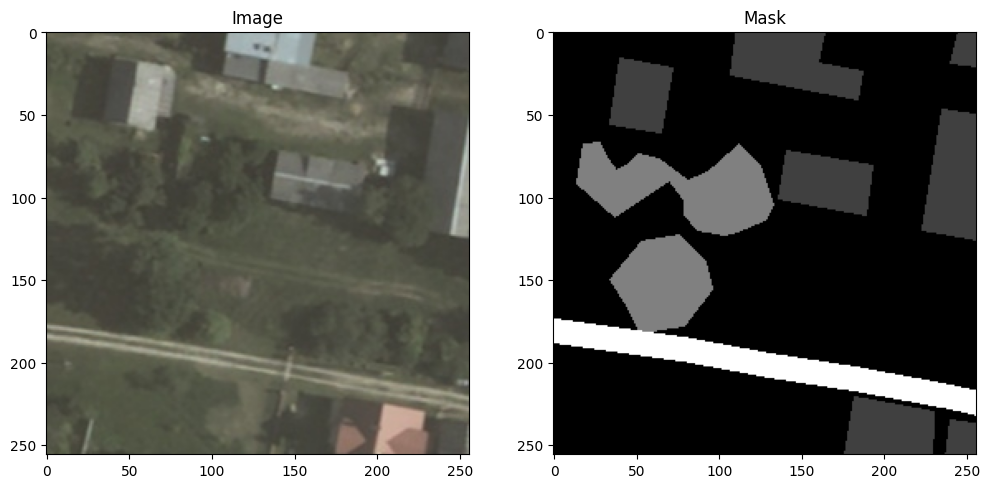

In [38]:
train_img_dir = "./data_for_keras_augmentation/train_images/train/"
train_mask_dir = "./data_for_keras_augmentation/train_masks/train/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))


img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [56]:
from tensorflow import keras

In [59]:
# Define Generator for images and masks so we can read them directly from the drive. 

seed=24
batch_size= 16
n_classes=4

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)
      
    return (img,mask)

In [61]:
#Define the generator.
#We are not doing any rotation or zoom to make sure mask values are not interpolated.
#It is important to keep pixel values in mask as 0, 1, 2, 3, .....
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [143]:
train_img_path = "./data_for_keras_augmentation/train_images/"
train_mask_path = "./data_for_keras_augmentation/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=4)

val_img_path = "./data_for_keras_augmentation/val_images/"
val_mask_path = "./data_for_keras_augmentation/val_masks/"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=4)

In [149]:
#Make sure the generator is working and that images and masks are indeed lined up. 
#Verify generator.... In python 3 next() is renamed as __next__()
try:
    x, y = train_img_gen.__next__()
except: StopIteration
try:
    x_val, y_val = val_img_gen.__next__()
except: StopIteration

NameError: name 'x' is not defined

In [150]:
#Define the model metrcis and load model. 

num_train_imgs = len(os.listdir('./data_for_keras_augmentation/train_images/train/'))
num_val_images = len(os.listdir('./data_for_keras_augmentation/val_images/val/'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size


IMG_HEIGHT = 256
IMG_WIDTH  = 256
IMG_CHANNELS = 3

n_classes=4

#############################################################################
#Use transfer learning using pretrained encoder in the U-Net
#(make sure you uncomment the preprocess_input part in the
# preprocess_data function above)

In [151]:
#Use transfer learning using pretrained encoder in the U-Net
#(make sure you uncomment the preprocess_input part in the
# preprocess_data function above)
################################################################
#Define the model
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet', 
                input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                classes=n_classes, activation='softmax')
model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])

#Other losses to try: categorical_focal_dice_loss, cce_jaccard_loss, cce_dice_loss, categorical_focal_loss

85524480/85521592 [==============================] - 32s 0us/step


In [152]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
print(model.summary())
print(model.input_shape)
#Fit the model
#history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=len(X_train) // 16, validation_steps=len(X_train) // 16, epochs=100)
#Train the model. 
history=model.fit(train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=25,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)

model.save('landcover_25_epochs_RESNET_backbone_batch16.hdf5')


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
_______________________________________________________________________________________

StopIteration: 